## I. Introduction

Name    : Theo Nugraha

Batch   : RMT-021

Link Deployment : 

### I.I. Project Background

The financial industry has a large number of customers with diverse preferences, behaviors, and profiles. To improve service, customer retention and operational efficiency, financial companies need to understand their customers more deeply. One effective approach in achieving such understanding is to use clustering-based customer segmentation techniques.

In this context, financial companies have access to customer data that includes information such as financial transactions, payment history, types of products used, and more. This data has great potential to reveal valuable insights into customer behavior, preferences, and potential risks.

### I.II. About Dataset

[SOURCE DATASET](https://www.kaggle.com/datasets/sidharth178/customer-segmentation)

The sample Dataset summarizes the usage behavior of about nearly 1000 active credit card holders during the last 6 months. The file is at a customer level with 10 behavioral variables.

The following is the Data Dictionary for the Customer Segmentation dataset:

- `Customer Id`: This is typically a unique identifier assigned to each customer or individual in a dataset. It is used to distinguish and track individual customers. In credit analysis, it may not be a directly relevant factor for assessing creditworthiness, but it helps in keeping records and managing customer data.

- `Age`: This refers to the age of the customer or individual. Age can be an important factor in credit analysis because it is often correlated with financial stability and the ability to repay debts. Younger individuals may have less established credit histories, while older individuals may have more stable financial situations.

- `Edu` (Education): This likely represents the education level of the customer. Education can be a factor in assessing credit risk, as individuals with higher education levels may have higher earning potential and financial stability. It may also indicate a level of financial literacy.

- `Years Employed`: This represents the number of years the customer has been employed. Employment history is important in credit analysis because it reflects the stability of a person's income source. Longer periods of employment are generally viewed more favorably.

- `Income`: This is the customer's income, typically expressed as an annual figure. Income is a fundamental factor in credit analysis, as it determines a person's ability to make payments on debts. Higher income levels are generally associated with lower credit risk.

- `Card Debt`: Card debt refers to the amount of debt a customer has accumulated through the use of credit cards. It is a specific type of debt that can impact a person's creditworthiness.

- `Other Deb`: Other debt includes any additional debts or financial obligations that the customer may have, such as loans, mortgages, or personal debts. Total debt obligations are crucial in assessing a person's debt management capacity.

- `Defaulted`: "Defaulted" typically refers to whether the customer has failed to meet their debt obligations, such as missing payments or not repaying loans as agreed. It's a critical indicator of credit risk.

- `Debt-Income Ratio` (Debt-to-Income Ratio): This is a financial metric that measures the proportion of a customer's income that goes toward paying their debts. It is calculated by dividing the total debt (including card debt, other debt, etc.) by the customer's income. A high debt-to-income ratio can be a warning sign of financial stress and potential credit risk.

These variables are often used in credit scoring models and credit risk assessment to determine an individual's creditworthiness and the likelihood of them repaying debts as agreed. The specific importance of each variable may vary depending on the credit analysis model and the lender's criteria.

### I.III. Objective

The goal of this project is to implement a clustering-based customer segmentation technique using machine learning in the financial industry.

## II. Import Library

In [1]:
#Import Library

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import json
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score, davies_bouldin_score
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')

## III. Data Loading

In [2]:
# Data Loading
df = pd.read_csv('customer_segmentation.csv')
df

Unnamed: 0  Customer Id  Age  Edu  Years Employed  Income  Card Debt  \
0             0            1   41    2               6      19      0.124   
1             1            2   47    1              26     100      4.582   
2             2            3   33    2              10      57      6.111   
3             3            4   29    2               4      19      0.681   
4             4            5   47    1              31     253      9.308   
..          ...          ...  ...  ...             ...     ...        ...   
845         845          846   27    1               5      26      0.548   
846         846          847   28    2               7      34      0.359   
847         847          848   25    4               0      18      2.802   
848         848          849   32    1              12      28      0.116   
849         849          850   52    1              16      64      1.866   

     Other Debt  Defaulted  DebtIncomeRatio  
0         1.073        0.0              6.3  
1         8.218        0.0             12.8  
2         5.802        1.0             20.9  
3         0.516        0.0              6.3  
4         8.908        0.0              7.2  
..          ...        ...              ...  
845       1.220        NaN              6.8  
846       2.021        0.0              7.0  
847       3.210        1.0             33.4  
848       0.696        0.0              2.9  
849       3.638        0.0              8.6  

[850 rows x 10 columns]

This dataset has 10 columns or features and 850 rows of data.

In [4]:
# Displays the top 10 data

df.head(10)

Unnamed: 0  Customer Id  Age  Edu  Years Employed  Income  Card Debt  \
0           0            1   41    2               6      19      0.124   
1           1            2   47    1              26     100      4.582   
2           2            3   33    2              10      57      6.111   
3           3            4   29    2               4      19      0.681   
4           4            5   47    1              31     253      9.308   
5           5            6   40    1              23      81      0.998   
6           6            7   38    2               4      56      0.442   
7           7            8   42    3               0      64      0.279   
8           8            9   26    1               5      18      0.575   
9           9           10   47    3              23     115      0.653   

   Other Debt  Defaulted  DebtIncomeRatio  
0       1.073        0.0              6.3  
1       8.218        0.0             12.8  
2       5.802        1.0             20.9  
3       0.516        0.0              6.3  
4       8.908        0.0              7.2  
5       7.831        NaN             10.9  
6       0.454        0.0              1.6  
7       3.945        0.0              6.6  
8       2.215        NaN             15.5  
9       3.947        0.0              4.0

In [5]:
# Display the bottom 10 data

df.tail(10)

Unnamed: 0  Customer Id  Age  Edu  Years Employed  Income  Card Debt  \
840         840          841   38    3              13      25      0.343   
841         841          842   29    3               7      63      0.572   
842         842          843   32    1              14      36      0.273   
843         843          844   32    2               8      45      0.982   
844         844          845   41    1               7      43      0.694   
845         845          846   27    1               5      26      0.548   
846         846          847   28    2               7      34      0.359   
847         847          848   25    4               0      18      2.802   
848         848          849   32    1              12      28      0.116   
849         849          850   52    1              16      64      1.866   

     Other Debt  Defaulted  DebtIncomeRatio  
840       1.082        0.0              5.7  
841       2.893        0.0              5.5  
842       0.591        0.0              2.4  
843       0.683        0.0              3.7  
844       1.198        0.0              4.4  
845       1.220        NaN              6.8  
846       2.021        0.0              7.0  
847       3.210        1.0             33.4  
848       0.696        0.0              2.9  
849       3.638        0.0              8.6

In [6]:
# Duplicate Dataset

data_backup = df.copy()

In [7]:
# Check Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


In this dataset, there are 10 columns with 4 columns of float data type and 6 columns of integer data type.

In [8]:
# Check Missing Value

df.isnull().sum()

Unnamed: 0           0
Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

There are 150 missing values in the `Defaulted` column/feature.

In [9]:
# Duplication Check 

df.duplicated().sum()

0

There in no duplicate value in this dataset.

In [10]:
# Cardinality Check

print('Shape of Dataset : ', df.shape)
print('')

for col in df.columns.tolist():
  print('Col : ', col)
  print('Length Unique Value : ', df[col].nunique())
  print('')

Shape of Dataset :  (850, 10)

Col :  Unnamed: 0
Length Unique Value :  850

Col :  Customer Id
Length Unique Value :  850

Col :  Age
Length Unique Value :  37

Col :  Edu
Length Unique Value :  5

Col :  Years Employed
Length Unique Value :  33

Col :  Income
Length Unique Value :  129

Col :  Card Debt
Length Unique Value :  727

Col :  Other Debt
Length Unique Value :  788

Col :  Defaulted
Length Unique Value :  2

Col :  DebtIncomeRatio
Length Unique Value :  245



In [11]:
# Cardinality Check

print('Shape of Dataset : ', df.shape)
print('')

for col in df.columns.tolist():
  print('Col : ', col)
  print('Length Unique Value : ', df[col].unique())
  print('')

Shape of Dataset :  (850, 10)

Col :  Unnamed: 0
Length Unique Value :  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228

Based on the cardinality check, there is no problems.

## IV. Exploratory Data Analysis (EDA)

### IV.I. Basic Statistic Checking

In [12]:
# Check Basic Statistic

df.describe()

Unnamed: 0  Customer Id         Age         Edu  Years Employed  \
count   850.00000    850.00000  850.000000  850.000000      850.000000   
mean    424.50000    425.50000   35.029412    1.710588        8.565882   
std     245.51816    245.51816    8.041432    0.927784        6.777884   
min       0.00000      1.00000   20.000000    1.000000        0.000000   
25%     212.25000    213.25000   29.000000    1.000000        3.000000   
50%     424.50000    425.50000   34.000000    1.000000        7.000000   
75%     636.75000    637.75000   41.000000    2.000000       13.000000   
max     849.00000    850.00000   56.000000    5.000000       33.000000   

           Income   Card Debt  Other Debt   Defaulted  DebtIncomeRatio  
count  850.000000  850.000000  850.000000  700.000000       850.000000  
mean    46.675294    1.576820    3.078773    0.261429        10.171647  
std     38.543054    2.125843    3.398799    0.439727         6.719441  
min     13.000000    0.012000    0.046000    0.000000         0.100000  
25%     24.000000    0.382500    1.045750    0.000000         5.100000  
50%     35.000000    0.885000    2.003000    0.000000         8.700000  
75%     55.750000    1.898500    3.903250    1.000000        13.800000  
max    446.000000   20.561000   35.197000    1.000000        41.300000

Based on the basic statistics check above, we can know that:
- Based on the distribution, almost all features appear to be fairly symmetrical. This is because the mean and median (50th percentile) values are close together.

### IV.II. Plotting

#### IV.II.I. Education

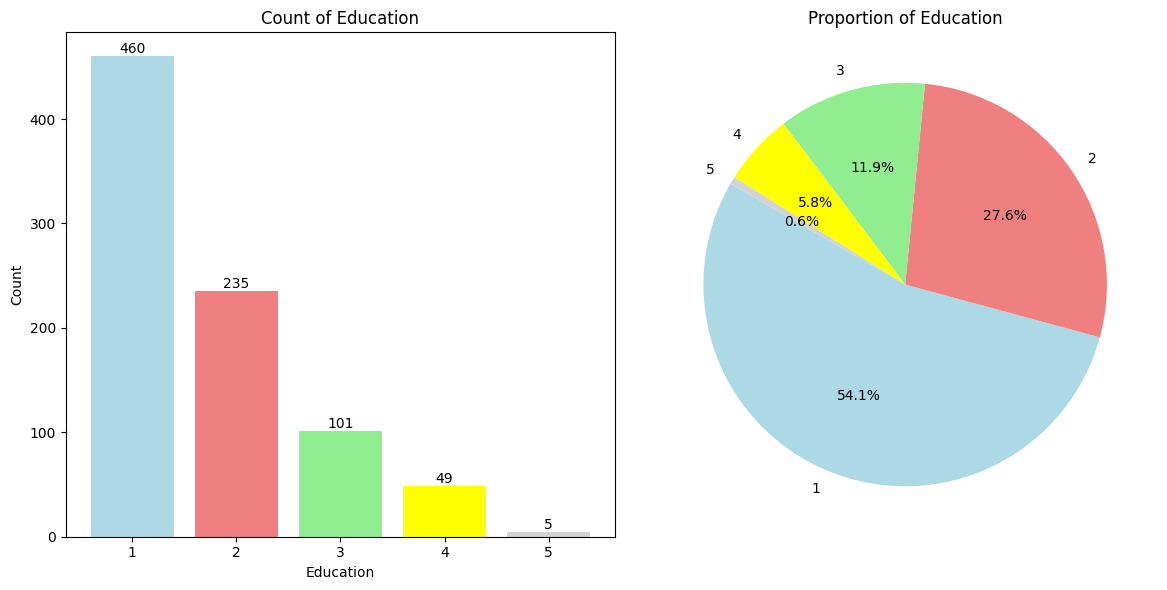

In [121]:
# Data for bar plot
education = df["Edu"].value_counts()

# Data for pie chart
labels = ["1", "2", "3", "4", "5"]
sizes = education.values
colors = ["lightblue", "lightcoral", "lightgreen", "yellow", "lightgrey"]

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.subplot(121)  # First subplot (bar plot)
plt.bar(labels, sizes, color=colors)
# Adding a label to a bar
for i, value in enumerate(education.values):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=10)
plt.xlabel("Education")
plt.ylabel("Count")
plt.title("Count of Education")

# Plot pie chart
plt.subplot(122)  # Second subplot (pie chart)
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=150, colors=colors)
plt.title("Proportion of Education")

plt.tight_layout()  # To ensure subplots do not overlap
plt.show()

Generally, there are five main levels of education that are often recognized internationally. These levels of education are in order from lowest to highest and may vary from country to country, but are generally as follows:

1. **Pre-school education**: This is the initial level of education aimed at young children, usually from 3 to 6 years of age. Pre-school education may take the form of kindergarten or other early education programs designed to help children develop their social, cognitive and motor skills before starting primary education.

2. **Primary Education**: This level covers basic education provided to children in the age group of 6 to 12 years. This is the level of education that includes basic subjects such as language, math, science and social studies. In many countries, primary education is compulsory.

3. **Secondary Education**: Secondary education (or secondary school) is the level of education provided to students in the age group of 12 to 18 years. It is often divided into two stages: first secondary education (junior high school) and second secondary education (senior high school). Students usually take more in-depth subjects at this level and prepare themselves for admission to college or employment.

4. **Higher Education**: Higher education includes various educational programs at colleges and universities. It includes bachelor's degrees (S1), master's degrees (S2), and doctoral degrees (S3). Higher education allows students to gain more in-depth knowledge in a particular field of study and develop the skills necessary for various professions.

5. **Professional and Technical Education**: This is an additional level of education that provides specialized training in certain fields that require practical expertise. It can include technical schools, vocational schools and other professional training programs. Students pursuing professional and technical education usually prepare for a specific career, such as technician, mechanic or nurse.

If we refer to the education levels, here are some insights that can be gained from the plot:

- **Distribution of Education Levels**: This data provides an overview of the distribution of education levels within the observed population or sample. In this case, education level 1 has the highest number (460 individuals), which indicates that most people in the dataset have education level 1. Education level 2 has a lower number (235 individuals), and so on.

- **Majority with Low Education Level**: The majority of individuals in the dataset have lower education levels (1 and 2), while the number of individuals with higher education levels (3, 4, and 5) is decreasing significantly.

- **Education Imbalance**: There is a significant imbalance in education levels in the dataset. This could have implications in further analysis, especially if education level is an important factor in the analysis or modeling.

- **Low Numbers at Higher Education Levels**: Education levels 4 and 5 have very low numbers (49 and 5 individuals, respectively). This suggests that individuals with higher education levels in this dataset may be a minority group.

#### IV.II.II. Defaulted

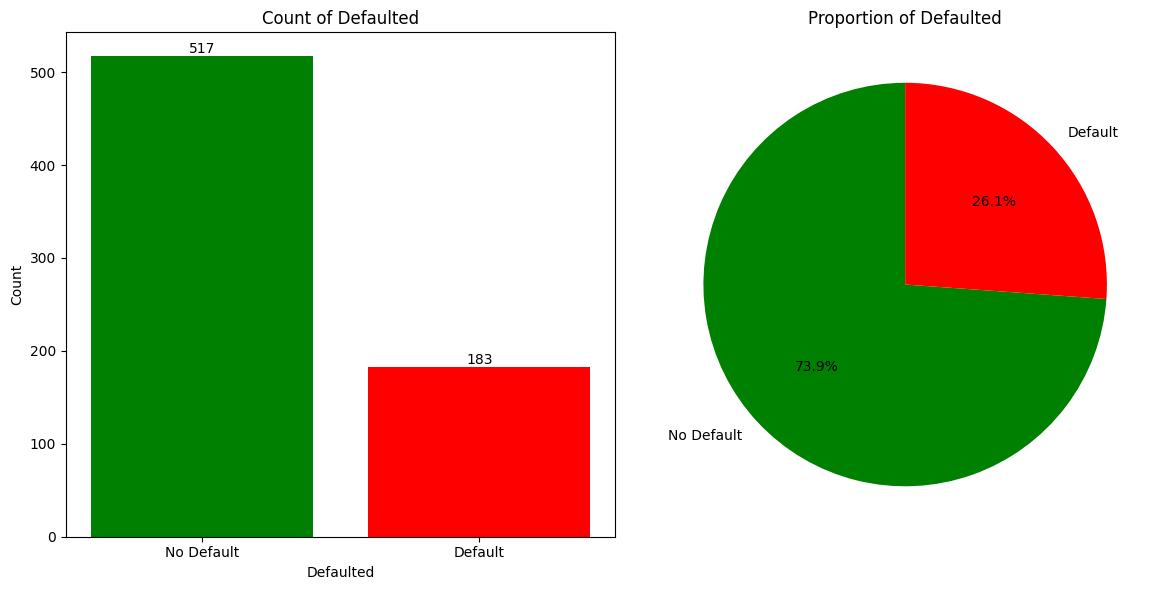

In [126]:
# Data for bar plot
defaulted = df["Defaulted"].value_counts()

# Data for pie chart
labels = ["No Default", "Default"]
sizes = defaulted.values
colors = ["green", "red"]

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.subplot(121)  # First subplot (bar plot)
plt.bar(labels, sizes, color=colors)
# Adding a label to a bar
for i, value in enumerate(defaulted.values):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=10)
plt.xlabel("Defaulted")
plt.ylabel("Count")
plt.title("Count of Defaulted")

# Plot pie chart
plt.subplot(122)  # Second subplot (pie chart)
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90, colors=colors)
plt.title("Proportion of Defaulted")

plt.tight_layout()  # To ensure subplots do not overlap
plt.show()

Based on the results of the above plot, we can know that customers who do not default are more than customers who default. Business-wise, this is very good as the majority of customers do not default or pay their debts smoothly. However, are we just going to stand by and watch 26.1% of our customers default?

Oh of course not, let's analyze it more deeply because we should minimize this as much as possible.

##### IV.II.II.I Defaulted by Education (Status = 1 or Default)

In [201]:
# Filter data to retrieve only observations with Default status = 1
defaulted_data = df[df['Defaulted'] == 1.0]

# Count the number of observations with Default status = 1 for each education level
education_level_counts = defaulted_data['Edu'].value_counts()

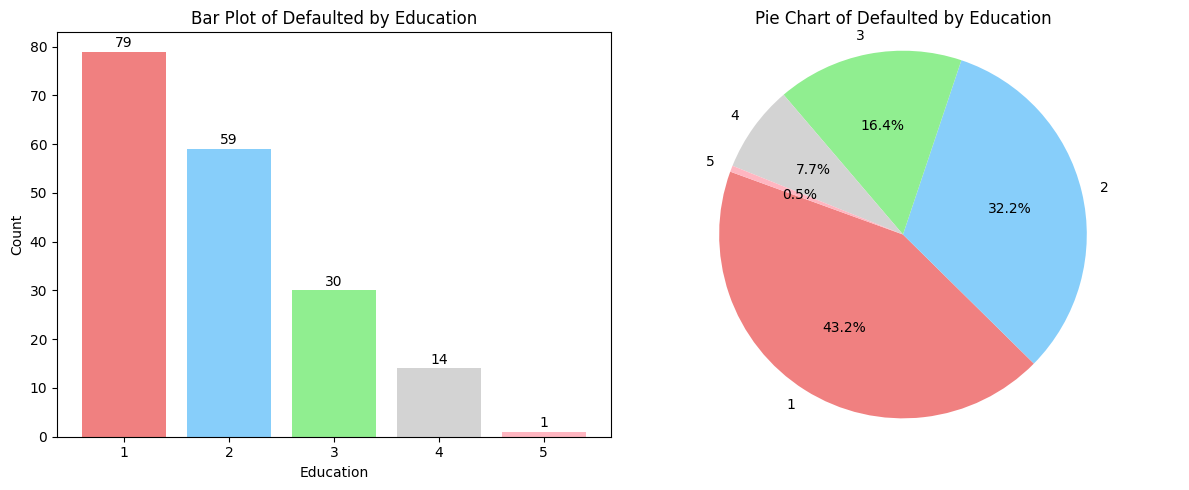

In [203]:
colors=['lightcoral', 'lightskyblue', 'lightgreen', 'lightgrey', 'lightpink']
# Create subplots for bar plot and pie chart
plt.figure(figsize=(12, 5))

# Bar Plot
plt.subplot(121)  # Left subplot
bars = plt.bar(education_level_counts.index, education_level_counts.values, color=colors)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Bar Plot of Defaulted by Education')
# Add labels above each bar
for bar, income in zip(bars, education_level_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, round(income, 2), ha='center')

# Pie Chart
plt.subplot(122)  # Right Subplot
plt.pie(education_level_counts.values, labels=education_level_counts.index, autopct='%1.1f%%', startangle=160, colors=colors)
plt.axis('equal')  # Making a circle into a perfect circle
plt.title('Pie Chart of Defaulted by Education')

# Displaying the plot
plt.tight_layout()
plt.show()

Insights from the results of the number of defaulted customers by education level are as follows:

- **Lower Education Level More Vulnerable**: The number of defaulted customers tends to be higher at lower education levels. Education level "1" (presumably representing primary or lower education) has the highest number of customers with 79 defaults. This suggests that customers with lower education levels may have a higher risk of default.

- **Declining Pattern**: There is a significant decrease in the number of default cases as the education level increases. This suggests that customers with higher education levels may have a lower risk of default. Education level "2" has 59 default cases, which is lower than education level "1", and so on.

- **The Importance of Education in Financial Management**: This data underscores the importance of education in financial management. People with higher education levels may have better knowledge and skills in managing their finances, which can help reduce the risk of default.

#### IV.II.III. Average Income by Education

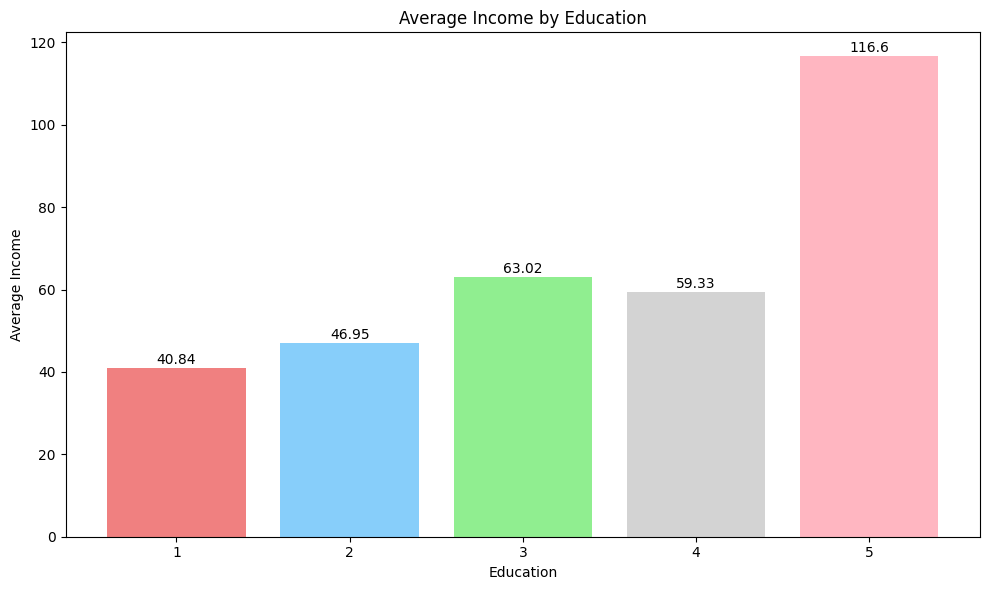

In [204]:
# Group the data by education level and calculate the average income in each group
income_by_education = df.groupby('Edu')['Income'].mean().reset_index()

# Sort data based education
income_by_education = income_by_education.sort_values(by='Edu')

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(income_by_education['Edu'], income_by_education['Income'], color=colors)
plt.xlabel('Education')
plt.ylabel('Average Income')
plt.title('Average Income by Education')

# Add labels above each bar
for bar, income in zip(bars, income_by_education['Income']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, round(income, 2), ha='center')

# Display plot
plt.tight_layout()
plt.show()

The results of average income by education level (Edu) provide some insights:

- **Correlation between Education and Income**:

It can be seen that average income tends to increase with higher levels of education. This is a generally expected pattern, where people with higher levels of education tend to have higher incomes. This could be due to better job opportunities and access to higher paying jobs for those with higher education levels.

- **Higher Income for Education Level 5**:

Education level 5 (presumably an advanced level of education, such as a bachelor's degree or higher) shows a significant average income of around 116,600. This indicates that those with higher education have significantly higher incomes compared to those with lower levels of education. This may also reflect the high demand for higher skills and knowledge in the job market.

- **Significant Differences between Education Levels**:

The difference in average earnings across education levels is significant. This highlights the importance of education in influencing individual earnings.
Education level 1 (presumably primary education or equivalent) has the lowest average income of around 40,837, while education level 5 has the highest average income of around 116,600.

- **The Importance of Education in Economic Wellbeing**:

These results underscore the importance of education in achieving higher economic well-being. Investing in education can open doors to better job opportunities and higher earnings in the future.

- **Impact on Decision-Making**:

These results can help individuals and government policies to make better decisions about education and careers. People can see that higher education can contribute significantly to future earnings, while education and training policies can be designed to increase access to higher levels of education.

Overall, these results show that there is a positive relationship between education and income, and that education can be an important factor in achieving financial stability and higher economic well-being.

#### IV.II.IV. Average Income by Age

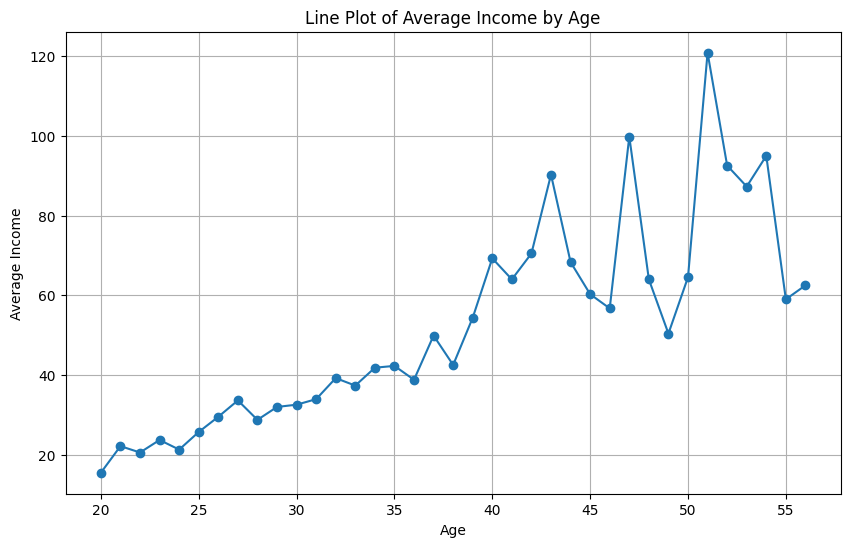

In [172]:
# Group the data by age and calculate the average income
average_income_by_age = df.groupby('Age')['Income'].mean()

plt.figure(figsize=(10, 6))
plt.plot(average_income_by_age.index, average_income_by_age.values, marker='o', linestyle='-')
plt.xlabel('Age')
plt.ylabel('Average Income')
plt.title('Line Plot of Average Income by Age')
plt.grid(True)
plt.show()


In [175]:
# Store to dataframe
average_income_by_age = pd.DataFrame(average_income_by_age)
average_income_by_age

Income
Age            
20    15.500000
21    22.166667
22    20.571429
23    23.714286
24    21.300000
25    25.720000
26    29.533333
27    33.636364
28    28.763158
29    32.000000
30    32.566667
31    33.952381
32    39.233333
33    37.354839
34    41.842105
35    42.300000
36    38.818182
37    49.903226
38    42.533333
39    54.390244
40    69.281250
41    64.000000
42    70.500000
43    90.272727
44    68.333333
45    60.285714
46    56.722222
47    99.818182
48    64.000000
49    50.400000
50    64.545455
51   120.857143
52    92.555556
53    87.285714
54    95.000000
55    59.000000
56    62.500000

Insights that can be obtained from data on average income based on age are as follows:

- **Increase in Income with Increasing Age**:

It can be seen that in this data, average income tends to increase with age. This is consistent with the general expectation that people tend to experience increases in income over time.
This increase may be due to increased work experience, career advancement, and access to better jobs with age.

- **Income Variability**:

Although there is a general trend of increasing income with age, there is significant variation in average income across certain age groups.
It can be seen that some age groups have much higher average incomes than others. For example, at age 51, there is a drastic jump in average income, reaching 120,857. Likewise, at age 43, there is a very high average income (90,273).

- **High Income Outliers**:

There are several age groups that may have outliers in income data. For example, at age 47, the average income reaches 99,818, which may be an outlier.
Outliers in income data can be caused by factors such as a very successful career, investments, or unusual financial situations.

- **Decline in Income After Career Peak**:

After reaching the peak, it appears that there is a decline in average income in some age groups. For example, at age 55, there is a significant decline in average earnings after reaching 59. This could indicate retirement or a decline in earnings after a career peak.

- **Income Differences at Different Stages of Life**:

These data also reflect differences in income across life stages. At a young age, income tends to be low, then increases with age, peaks at a certain age, and then may decline.

#### IV.II.V. Average Card Debt by Age

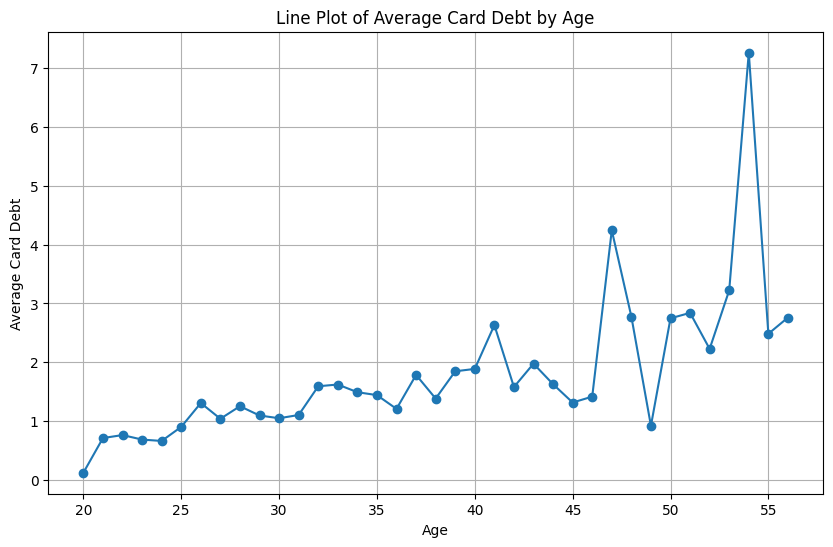

In [177]:
# Group data by age and calculate average card debt
average_card_debt_by_age = df.groupby('Age')['Card Debt'].mean()

plt.figure(figsize=(10, 6))
plt.plot(average_card_debt_by_age.index, average_card_debt_by_age.values, marker='o', linestyle='-')
plt.xlabel('Age')
plt.ylabel('Average Card Debt')
plt.title('Line Plot of Average Card Debt by Age')
plt.grid(True)
plt.show()

In [178]:
# Store to dataframe
average_card_debt_by_age = pd.DataFrame(average_card_debt_by_age)
average_card_debt_by_age

Card Debt
Age           
20    0.122500
21    0.712000
22    0.762571
23    0.685905
24    0.662533
25    0.902000
26    1.307467
27    1.039394
28    1.253132
29    1.095255
30    1.048733
31    1.103643
32    1.592100
33    1.621935
34    1.491289
35    1.441775
36    1.207758
37    1.785258
38    1.383233
39    1.846780
40    1.887344
41    2.631972
42    1.579063
43    1.976318
44    1.627133
45    1.315810
46    1.416056
47    4.243818
48    2.776579
49    0.920800
50    2.747545
51    2.839857
52    2.227556
53    3.223000
54    7.262250
55    2.484000
56    2.760000

From the data on average card debt based on age, there are several insights that can be obtained:

- **Credit Card Debt Increases with Age**:

It appears that credit card debt tends to increase with age initially, peaking at age 54 (with an average of 7,262,250) and then decreasing significantly at age 55 (to 2,484).
This increase may reflect individual financial developments, such as greater use of credit cards for important transactions and purchases at certain ages.

- **Fluctuations in Credit Card Debt**:

At some point, there are fluctuations in credit card debt that may be caused by economic factors or changes in an individual's lifestyle.
For example, between ages 44 and 45 there is a sharp decline in credit card debt, possibly due to more frugal spending or significant debt payments.

- **Significant Peak Credit Card Debt at Age 54**:

Age 54 represents the peak of credit card debt with an average of 7.262250. This could be the point at which a person reaches a financial plateau or has certain financial obligations that impact credit card debt levels.
Outliers at Age 47:

There is a significant outlier at age 47, where the average credit card debt is 4.243818. This could be due to a unique financial situation or a change in financial needs at that age.

- **Correlation with External Factors**:

A significant increase in credit card debt at a certain age may be related to certain life events, such as purchasing a home, children's education, or retirement plans.
An understanding of credit card debt trends by age can assist credit card companies, financial institutions, or individuals in their financial planning and credit card debt management.

#### IV.II.VI. Average Other Debt by Age

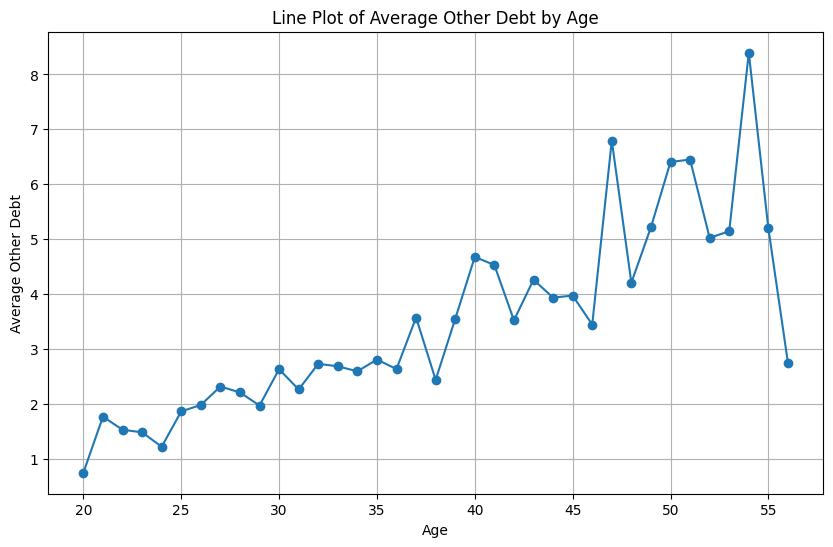

In [181]:
# Group data by age and calculate average other debt
average_other_debt_by_age = df.groupby('Age')['Other Debt'].mean()

plt.figure(figsize=(10, 6))
plt.plot(average_other_debt_by_age.index, average_other_debt_by_age.values, marker='o', linestyle='-')
plt.xlabel('Age')
plt.ylabel('Average Other Debt')
plt.title('Line Plot of Average Other Debt by Age')
plt.grid(True)
plt.show()

In [182]:
# Store to dataframe 
average_other_debt_by_age = pd.DataFrame(average_other_debt_by_age)
average_other_debt_by_age

Other Debt
Age            
20     0.752000
21     1.772083
22     1.533929
23     1.487286
24     1.223967
25     1.868160
26     1.984167
27     2.320697
28     2.212947
29     1.974686
30     2.635900
31     2.266405
32     2.733733
33     2.688581
34     2.596921
35     2.810650
36     2.638576
37     3.576290
38     2.441800
39     3.551146
40     4.679437
41     4.531306
42     3.525250
43     4.264182
44     3.938467
45     3.975333
46     3.448056
47     6.795091
48     4.209105
49     5.217200
50     6.405909
51     6.451000
52     5.025778
53     5.146714
54     8.394250
55     5.200000
56     2.754000

Insights from the average other debt data based on age are as follows:

- **Increasing Debt with Early Age**:

At early age (20-25 years), average other debts tend to increase significantly. This could reflect a period when an individual begins to take on financial responsibilities such as student loans or consumer debt.

- **Stability in Middle Age (25-35 years)**:

Between ages 25 and 35, average other debts remain relatively stable with smaller fluctuations. This may indicate that at this age, people have stabilized their financial situation and other debts tend to remain constant.
Significant Improvement After Age 35:

After age 35, there is a significant increase in average other debts. This increase can be caused by a variety of factors, including financial responsibilities such as mortgages, greater consumer debt, or investments in advanced education.

- **Peak at Age 54**:

Age 54 represents another peak in average debt, with the highest value being around 8,394. This may reflect a period of preparation for retirement, financing children's education, or the accumulation of debt from various sources.

- **Variability at Specific Ages**:

There are some fluctuations at certain ages, such as at ages 37 and 49, that may reflect significant financial events or changes at these points in a person's life.

- **Certain Declines at Ages 55 and 56**:

There appears to be a significant decrease in average other debt at ages 55 and 56, possibly reflecting preparation for retirement and debt reduction.

#### IV.II.VII. Average Debt Income Ratio by Age

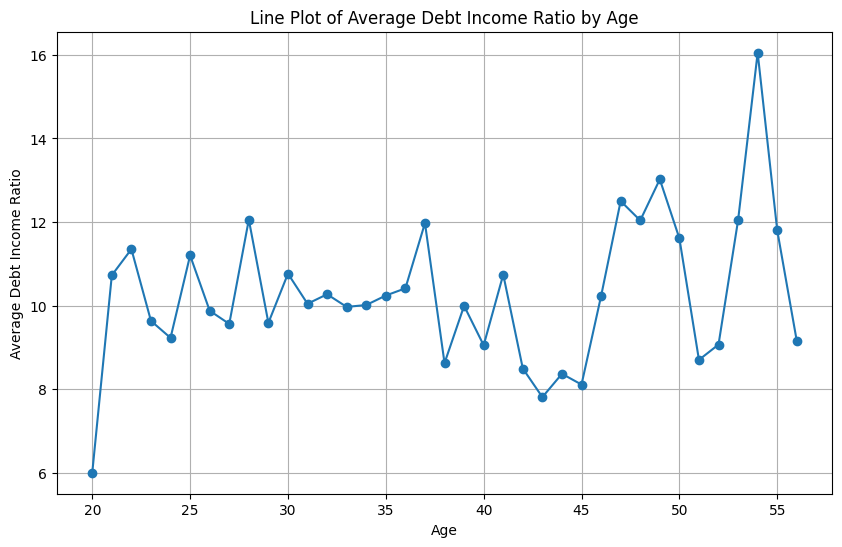

In [184]:
# Group data by age and calculate average Debt Income Ratio
average_DebtIncomeRatio_by_age = df.groupby('Age')['DebtIncomeRatio'].mean()

plt.figure(figsize=(10, 6))
plt.plot(average_DebtIncomeRatio_by_age.index, average_DebtIncomeRatio_by_age.values, marker='o', linestyle='-')
plt.xlabel('Age')
plt.ylabel('Average Debt Income Ratio')
plt.title('Line Plot of Average Debt Income Ratio by Age')
plt.grid(True)
plt.show()

In [185]:
average_DebtIncomeRatio_by_age = pd.DataFrame(average_DebtIncomeRatio_by_age)
average_DebtIncomeRatio_by_age

DebtIncomeRatio
Age                 
20          6.000000
21         10.725000
22         11.350000
23          9.633333
24          9.226667
25         11.200000
26          9.876667
27          9.560606
28         12.055263
29          9.586275
30         10.763333
31         10.042857
32         10.270000
33          9.967742
34         10.013158
35         10.240000
36         10.412121
37         11.974194
38          8.623333
39          9.992683
40          9.050000
41         10.741667
42          8.493750
43          7.809091
44          8.366667
45          8.109524
46         10.227778
47         12.500000
48         12.036842
49         13.020000
50         11.609091
51          8.700000
52          9.066667
53         12.042857
54         16.050000
55         11.800000
56          9.150000

Insights into the average Debt Income Ratio based on age are as follows:

- **Increase in Debt Ratio in Early Age (20-28 years)**:

It can be seen that at an early age, especially between 20 and 28 years, the debt-to-income ratio tends to increase significantly. This could reflect the fact that individuals at this age may be just starting out in a financially independent life, including taking out credit or loans for education or purchasing assets such as a car or house.

- **Declining Trend in Middle Age (29-38 years)**:

Between the ages of 29 and 38, the debt-to-income ratio shows a downward trend. It may reflect a period when individuals were more financially stable, paid their debts and managed their finances better.
Increased Return in Old Age (39-56 years):

After age 38, there is another increase in the debt-to-income ratio, especially after age 39. This could be due to financial responsibilities such as a home mortgage or preparations for retirement.

- **Peak at Age 54**:

Age 54 represents a peak debt-to-income ratio with an average of around 16,050. This could reflect preparation towards retirement or the accumulation of debt for various financial goals.

- **Variability at a Specific Point**:

There are fluctuations in the ratio of debt to income at certain points, such as the age of 47 years who recorded the highest ratio of 12.5. It may indicate significant financial events or changes at this age.

- **The Importance of Debt Management at Early and Late Ages**:

The increase in debt ratios in early and late life highlights the importance of debt management. At an early age, individuals need to understand the risks and responsibilities associated with debt. In later life, wise financial planning and effective debt management can help reduce financial risks in retirement.

- **Trends Correlated with Life Stage**:

These data reflect trends based on life stage. At an early age, individuals may be more inclined to take financial risks for education or purchasing assets. In middle age, financial stability tends to be achieved. At an advanced age, there is preparation for retirement.

- **The Importance of Debt Management Based on Age**:

These results can be used to inform the banking and finance business approach to debt management and product offerings. Companies can provide services that are more tailored to the needs of individuals at certain life stages, such as retirement planning or debt management at a young age.

#### IV.II.VIII. Average Debt Income Ratio by Education

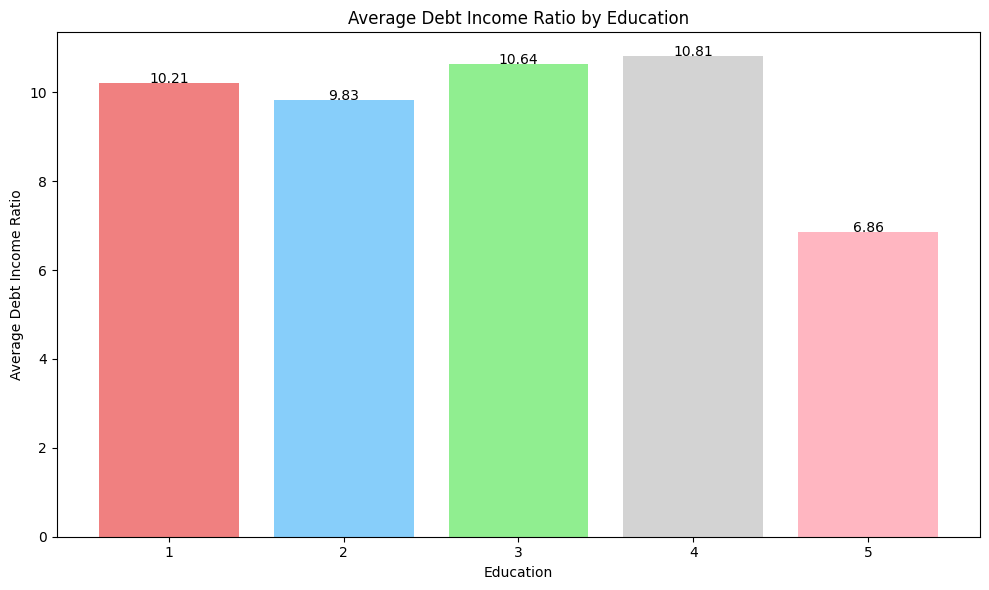

In [206]:
# Group the data by Education and calculate the average Debt Income Ratio
average_DebtIncomeRatio_by_edu = df.groupby('Edu')['DebtIncomeRatio'].mean().reset_index()

# Sort data based education
DebtIncomeRatio_by_edu = average_DebtIncomeRatio_by_edu.sort_values(by='Edu')

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(DebtIncomeRatio_by_edu['Edu'], DebtIncomeRatio_by_edu['DebtIncomeRatio'], color=colors)
plt.xlabel('Education')
plt.ylabel('Average Debt Income Ratio')
plt.title('Average Debt Income Ratio by Education')

# Add labels above each bar
for bar, income in zip(bars, DebtIncomeRatio_by_edu['DebtIncomeRatio']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), round(income, 2), ha='center')

# Display plot
plt.tight_layout()
plt.show()

Insights from the average Debt Income Ratio data based on Education are as follows:

- **Decreasing Debt Ratio with Higher Education**:

It can be seen that the average DebtIncomeRatio tends to decrease with a higher level of education. This suggests that individuals with higher education tend to have lower debt-to-income ratios.

- **Low Debt Ratio at Education Level 5**:

Education level 5 (perhaps representing higher education such as bachelor's degree or higher) has a very low average DebtIncomeRatio, which is around 6,860. This indicates that individuals with higher levels of education have relatively lower debt burdens compared to those with lower education.

- **Effect of Education in Financial Management**:

This data emphasizes the important role of education in financial management. Higher education can equip individuals with the necessary knowledge and skills to better manage their debt.

- **Benefits of Education in Reducing Financial Risk**:

Individuals with higher levels of education tend to have lower debt ratios. This can help them reduce the financial risks associated with high debt and help maintain financial stability.

- **Education as a Debt Control Factor**:

Banking and financial institutions may consider education as a factor in credit risk assessment and debt portfolio management.
It can be used as a criterion for determining interest rates or credit terms.

- **Requires Attention to Low Education**:

Data also shows that low education levels (Education Level 1) have a relatively higher debt ratio. This indicates that individuals with low levels of education may be more vulnerable to high debt burdens.
This can be a target for financial education programs that can help them better manage their debt.

So, the conclusion is that education has a significant impact on the debt-to-income ratio, with higher education levels tending to result in lower debt ratios. This is an indication that education has an important role in financial management and reducing financial risks.

#### IV.II.IX. Features Histogram and Skewness

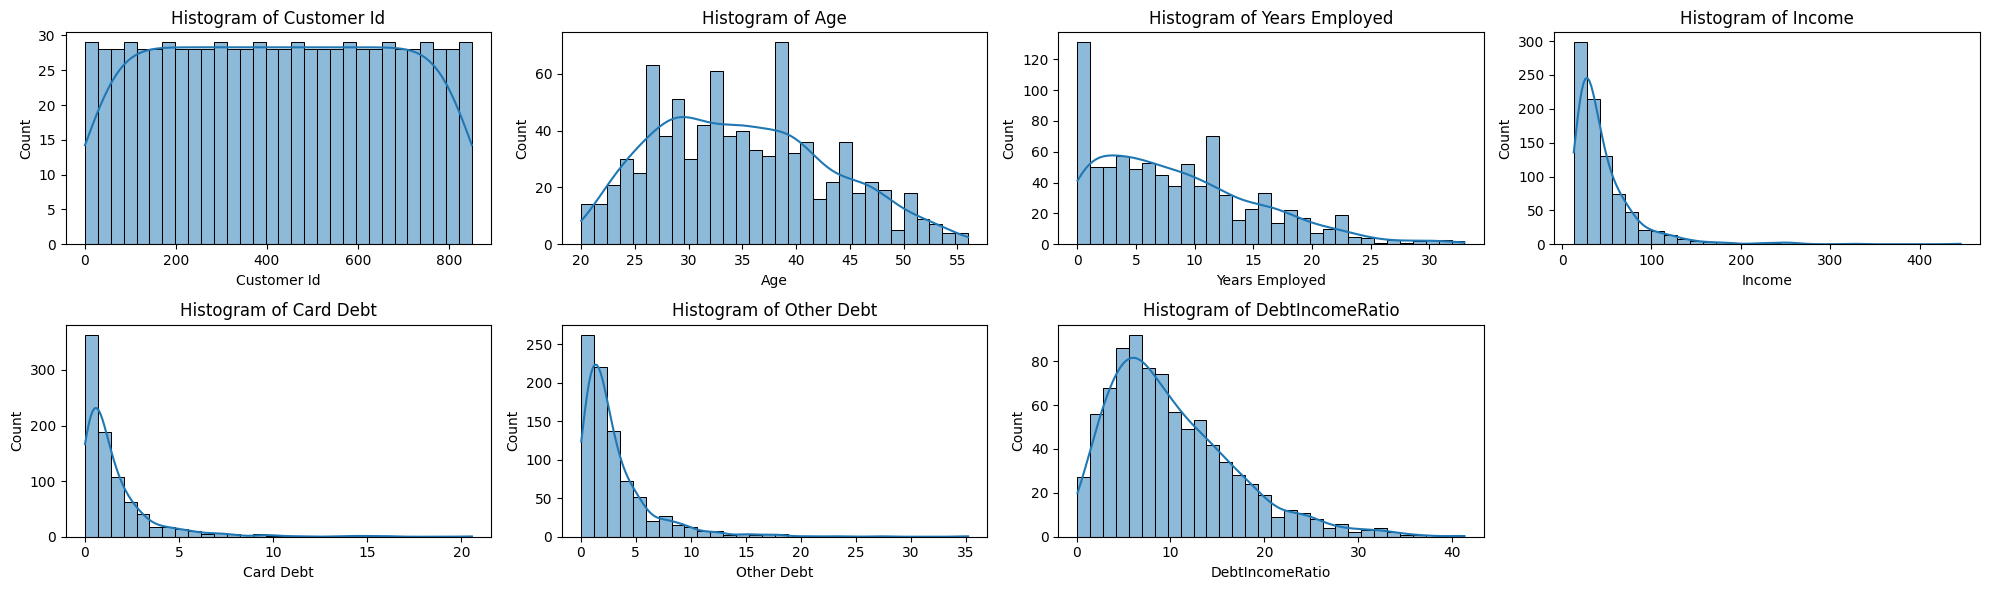

In [22]:
# Create Histogram

plt.figure(figsize=(20,6))

plt.subplot(2,4,1)
sns.histplot(df['Customer Id'], kde=True, bins = 30)
plt.title('Histogram of Customer Id')

plt.subplot(2,4,2)
sns.histplot(df['Age'], kde=True, bins = 30)
plt.title('Histogram of Age')

plt.subplot(2,4,3)
sns.histplot(df['Years Employed'], kde=True, bins = 30)
plt.title('Histogram of Years Employed')

plt.subplot(2,4,4)
sns.histplot(df['Income'], kde=True, bins = 30)
plt.title('Histogram of Income')

plt.subplot(2,4,5)
sns.histplot(df['Card Debt'], kde=True, bins = 30)
plt.title('Histogram of Card Debt')

plt.subplot(2,4,6)
sns.histplot(df['Other Debt'], kde=True, bins = 30)
plt.title('Histogram of Other Debt')

plt.subplot(2,4,7)
sns.histplot(df['DebtIncomeRatio'], kde=True, bins = 30)
plt.title('Histogram of DebtIncomeRatio')

plt.tight_layout()
plt.show;

In [23]:
# Check Skewness 

print('FEATURES SKEWNESS')
print('-----------------')
print('')
print('Skewness Customer Id         : ',df['Customer Id'].skew())
print('Skewness Age                 : ',df['Age'].skew())
print('Skewness Years Employed      : ',df['Years Employed'].skew())
print('Skewness Income              : ',df['Income'].skew())
print('Skewness Card Debt           : ',df['Card Debt'].skew())
print('Skewness Other Debt          : ',df['Other Debt'].skew())
print('Skewness DebtIncomeRatio     : ',df['DebtIncomeRatio'].skew())

FEATURES SKEWNESS
-----------------

Skewness Customer Id         :  0.0
Skewness Age                 :  0.33503660426294773
Skewness Years Employed      :  0.8626629060066772
Skewness Income              :  3.7007612669003658
Skewness Card Debt           :  3.701789963315442
Skewness Other Debt          :  3.2060059726951575
Skewness DebtIncomeRatio     :  1.1249989356474004


Based on the histogram and skewness level, we can tell that :

**Skewness Customer Id: 0.0**
- Skewness around zero indicates that the distribution of Customer Id is almost symmetrical or close to a normal distribution. This is a good thing, because usually Customer Id is a unique identification and should not have a skewed distribution.

**Skewness Age: 0.33503660426294773**
- A positive skewness close to zero indicates that the age distribution tends to be slightly skewed to the right (positive), but still fairly close to a normal distribution. This indicates that most of the age data tends to be centered around the mean value.

**Skewness Years Employed: 0.8626629060066772**
- A higher positive skewness indicates that the distribution of years worked tends to skew more strongly to the right (positive). This could mean there are some people who have very long work experience, while others may have just started their careers.

**Skewness Income: 3.7007612669003658**
- A high positive skewness indicates that the income distribution is highly skewed to the right (positive). This indicates that most people in the dataset may have low incomes, while there are few people with high incomes.

**Skewness Card Debt: 3.701789963315442**
- A high positive skewness also indicates that the distribution of credit card debt is highly skewed to the right (positive). This could mean that most people in the dataset have low credit card debt, while there are some who have high debt.

**Skewness Other Debt: 3.2060059726951575**
- A moderately high positive skewness indicates that the distribution of other debt is also skewed to the right (positive). This suggests that the majority of people in the dataset have low other debt, while there are some who have high debt.

**Skewness Debt-Income Ratio: 1.1249989356474004**
- The lower positive skewness of income, credit card, and other debt indicates that the distribution of the debt-income ratio is slightly skewed to the right (positive), but not as strongly as income, credit card, or other debt. This indicates that the debt-income ratio may be more evenly distributed than the other variables.

In data analysis, understanding skewness can help you identify how your data is distributed and can provide insight into trends in your dataset. Data distributions that are not normal or have significant skewness may require special attention in statistical analysis.

#### IV.II.X. Features Scatter Plot

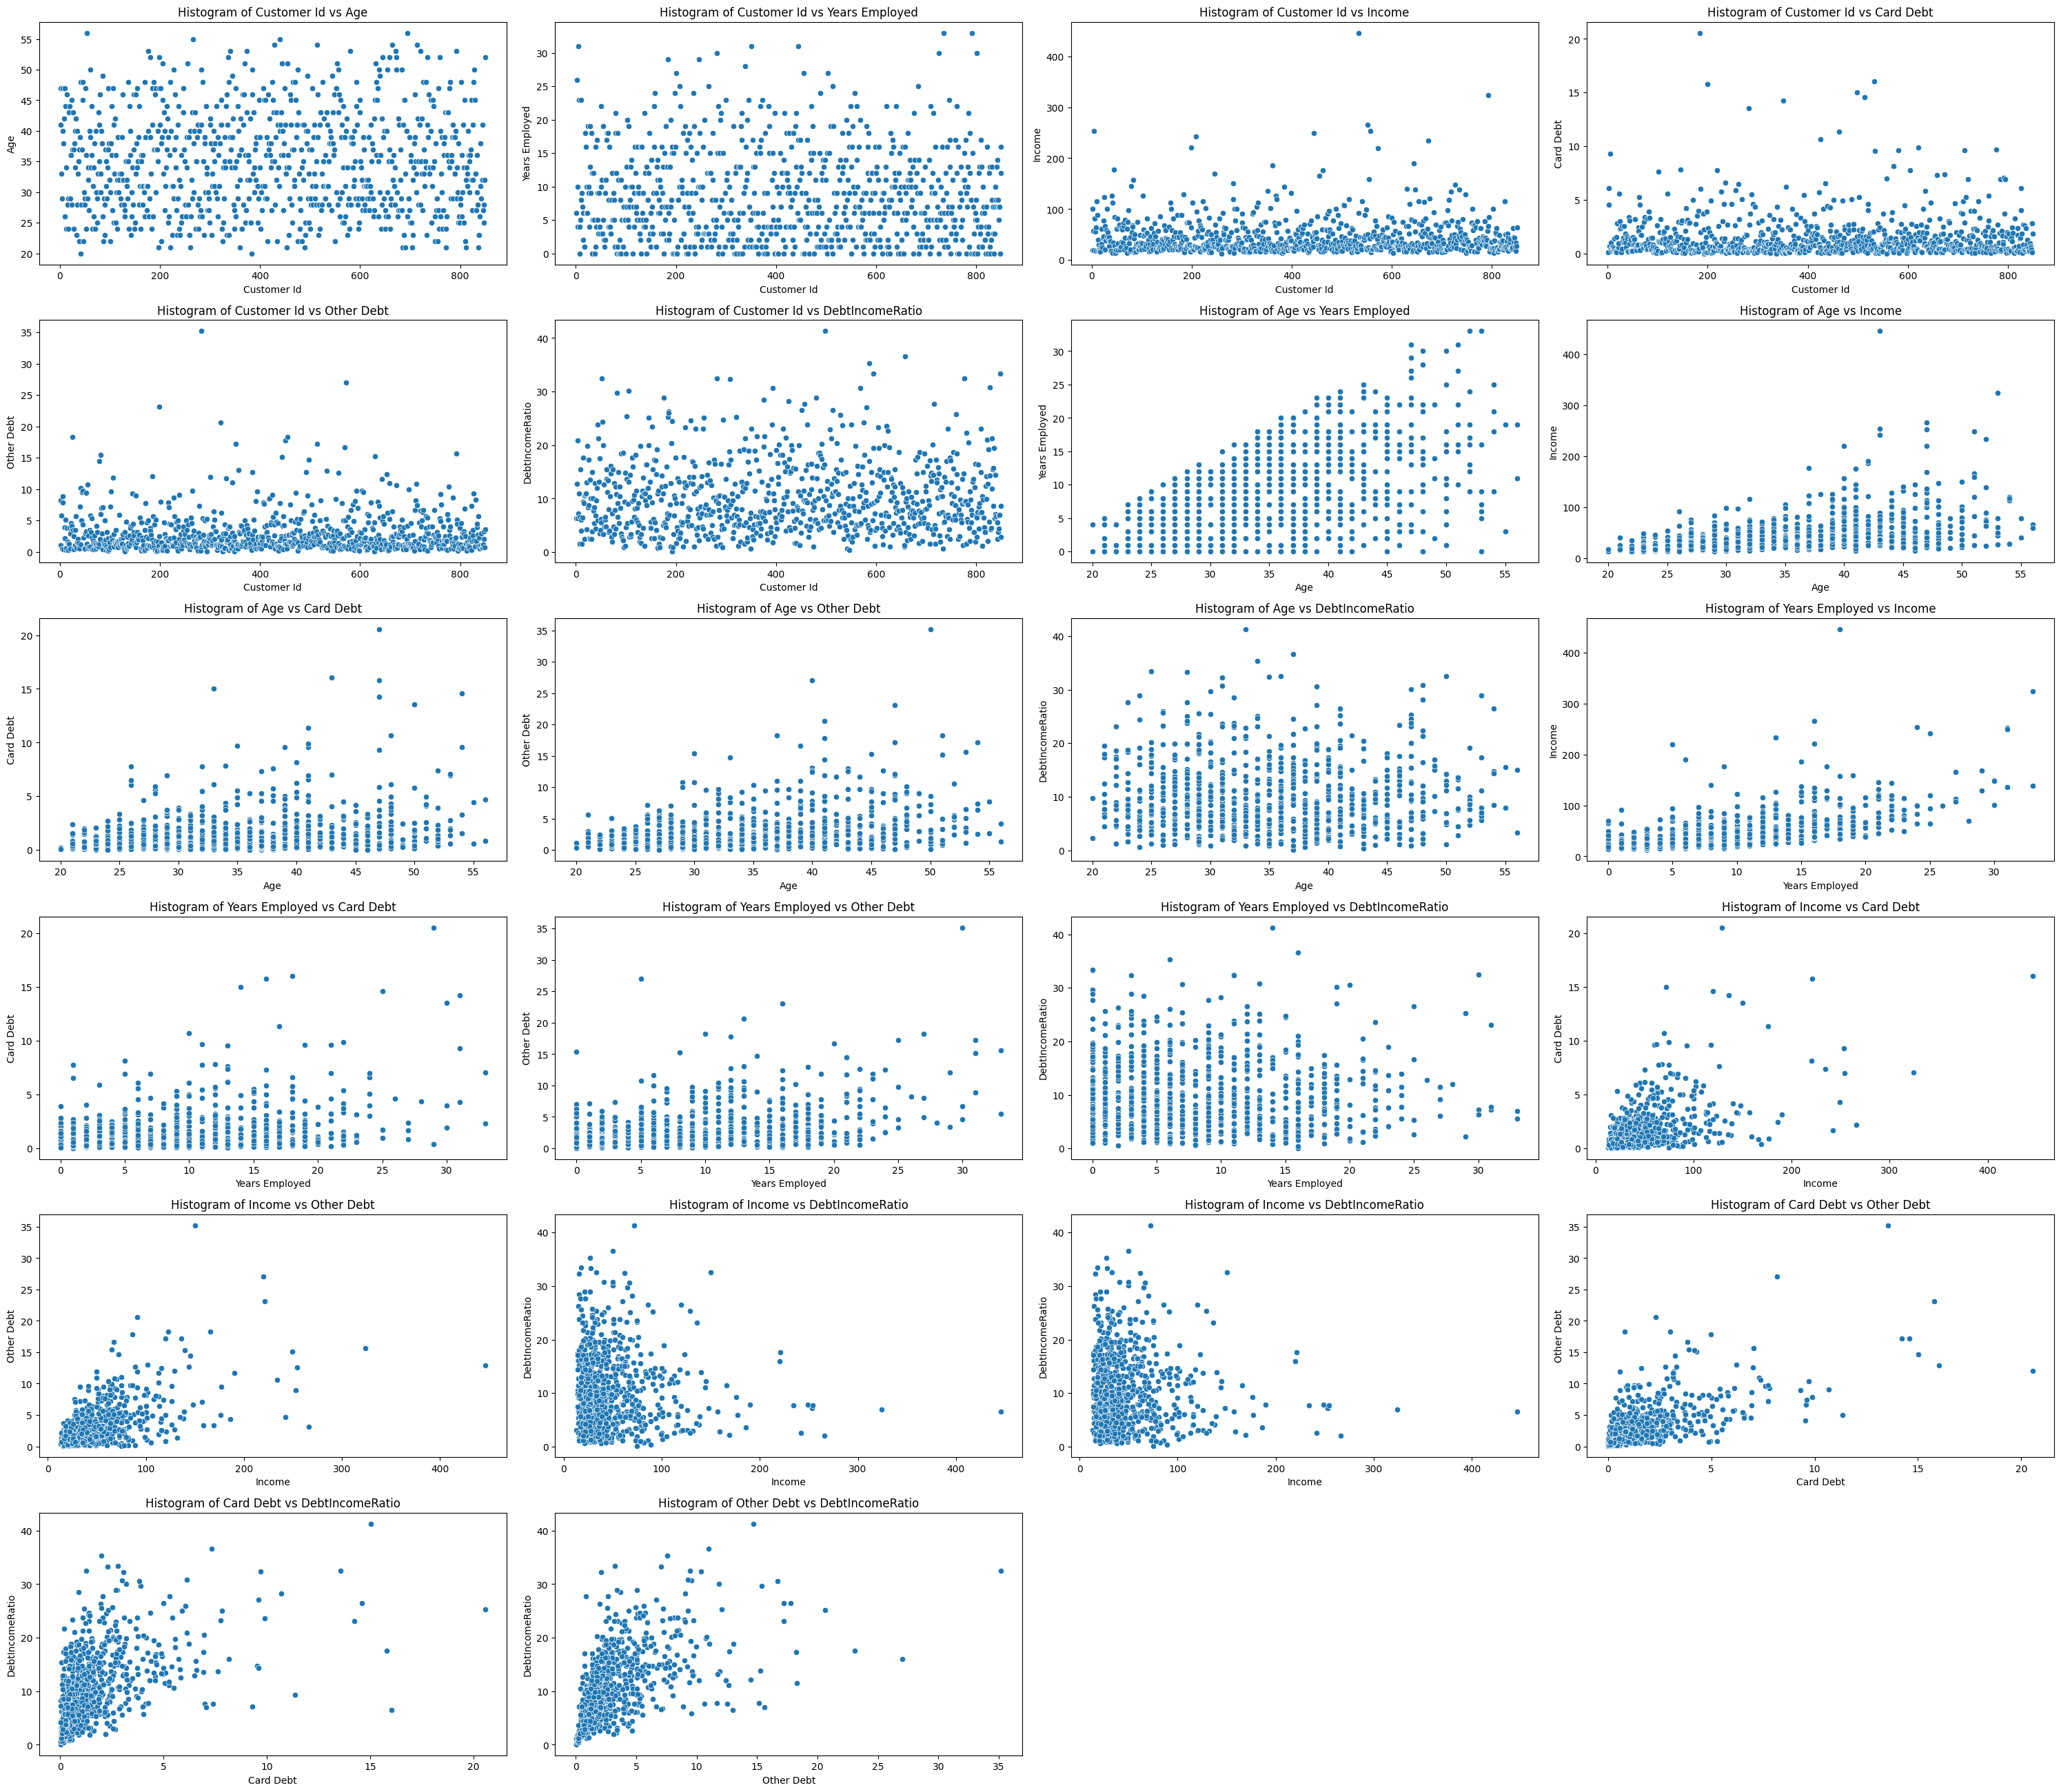

In [113]:
# Create Scatter Plot

plt.figure(figsize=(30,30))

plt.subplot(7,4,1)
sns.scatterplot(data=df, x="Customer Id", y="Age")
plt.title('Histogram of Customer Id vs Age')

plt.subplot(7,4,2)
sns.scatterplot(data=df, x="Customer Id", y="Years Employed")
plt.title('Histogram of Customer Id vs Years Employed')

plt.subplot(7,4,3)
sns.scatterplot(data=df, x="Customer Id", y="Income")
plt.title('Histogram of Customer Id vs Income')

plt.subplot(7,4,4)
sns.scatterplot(data=df, x="Customer Id", y="Card Debt")
plt.title('Histogram of Customer Id vs Card Debt')

plt.subplot(7,4,5)
sns.scatterplot(data=df, x="Customer Id", y="Other Debt")
plt.title('Histogram of Customer Id vs Other Debt')

plt.subplot(7,4,6)
sns.scatterplot(data=df, x="Customer Id", y="DebtIncomeRatio")
plt.title('Histogram of Customer Id vs DebtIncomeRatio')

plt.subplot(7,4,7)
sns.scatterplot(data=df, x="Age", y="Years Employed")
plt.title('Histogram of Age vs Years Employed')

plt.subplot(7,4,8)
sns.scatterplot(data=df, x="Age", y="Income")
plt.title('Histogram of Age vs Income')

plt.subplot(7,4,9)
sns.scatterplot(data=df, x="Age", y="Card Debt")
plt.title('Histogram of Age vs Card Debt')

plt.subplot(7,4,10)
sns.scatterplot(data=df, x="Age", y="Other Debt")
plt.title('Histogram of Age vs Other Debt')

plt.subplot(7,4,11)
sns.scatterplot(data=df, x="Age", y="DebtIncomeRatio")
plt.title('Histogram of Age vs DebtIncomeRatio')

plt.subplot(7,4,12)
sns.scatterplot(data=df, x="Years Employed", y="Income")
plt.title('Histogram of Years Employed vs Income')

plt.subplot(7,4,13)
sns.scatterplot(data=df, x="Years Employed", y="Card Debt")
plt.title('Histogram of Years Employed vs Card Debt')

plt.subplot(7,4,14)
sns.scatterplot(data=df, x="Years Employed", y="Other Debt")
plt.title('Histogram of Years Employed vs Other Debt')

plt.subplot(7,4,15)
sns.scatterplot(data=df, x="Years Employed", y="DebtIncomeRatio")
plt.title('Histogram of Years Employed vs DebtIncomeRatio')

plt.subplot(7,4,16)
sns.scatterplot(data=df, x="Income", y="Card Debt")
plt.title('Histogram of Income vs Card Debt')

plt.subplot(7,4,17)
sns.scatterplot(data=df, x="Income", y="Other Debt")
plt.title('Histogram of Income vs Other Debt')

plt.subplot(7,4,18)
sns.scatterplot(data=df, x="Income", y="DebtIncomeRatio")
plt.title('Histogram of Income vs DebtIncomeRatio')

plt.subplot(7,4,19)
sns.scatterplot(data=df, x="Income", y="DebtIncomeRatio")
plt.title('Histogram of Income vs DebtIncomeRatio')

plt.subplot(7,4,20)
sns.scatterplot(data=df, x="Card Debt", y="Other Debt")
plt.title('Histogram of Card Debt vs Other Debt')

plt.subplot(7,4,21)
sns.scatterplot(data=df, x="Card Debt", y="DebtIncomeRatio")
plt.title('Histogram of Card Debt vs DebtIncomeRatio')

plt.subplot(7,4,22)
sns.scatterplot(data=df, x="Other Debt", y="DebtIncomeRatio")
plt.title('Histogram of Other Debt vs DebtIncomeRatio')

plt.tight_layout()
plt.show;

Based on the scatter plot above, we can see that :
- There is an outlier for every feature in this dataset.
- The dots are randomly scattered with no clear pattern, so there may not be a strong relationship between the two variables. If the dots are more spread out, this also indicates greater variation in the data. We can see this in `Histogram of Customer Id vs Age`, `Histogram of Customer Id vs Years Employed` and `Histogram of Customer Id vs DebtIncomeRatio`.
- In almost all features, the data is not normally distributed.

### IV.IV. Correlation Test

After this I will perform a correlation test. What is a correlation test? Why do we need to do a correlation test?

**A correlation test** is a statistical tool used to measure and identify the relationship between two or more variables in data. The main functions of a correlation test are as follows:

- **Measuring Relationships**: A correlation test is used to measure the strength and direction of the relationship between the variables. In other words, correlation tests provide information about whether there is a positive, negative, or no relationship between the variables.

- **Identifying Statistical Correlations**: Correlation tests produce correlation coefficients that measure the degree of correlation between variables. The Pearson correlation coefficient, for example, measures the linear correlation between two numerical variables. Positive values close to 1 indicate a positive correlation, negative values close to -1 indicate a negative correlation, and values close to 0 indicate no correlation.

- **Hypothesis Validation**: Correlation tests can be used to test statistical hypotheses about whether there is a significant relationship between certain variables. For example, you can test whether there is a significant correlation between advertising expenditure and product sales.

- **Selection of Important Variables**: In multivariate analysis, the correlation test helps in the selection of the most relevant and significant variables for inclusion in the statistical model. This helps avoid overfitting and maintains a simpler and more interpretative model.

- **Understanding Data**: Correlation tests help us understand the data better. It helps us identify variables that might influence each other and contribute to the observed phenomenon.

We need to use correlation tests because it helps us answer important questions about the relationship between variables in the data. In statistical analysis, understanding the relationships between variables is key to making accurate predictions, making data-driven decisions, and developing a deep understanding of the phenomena we are studying.

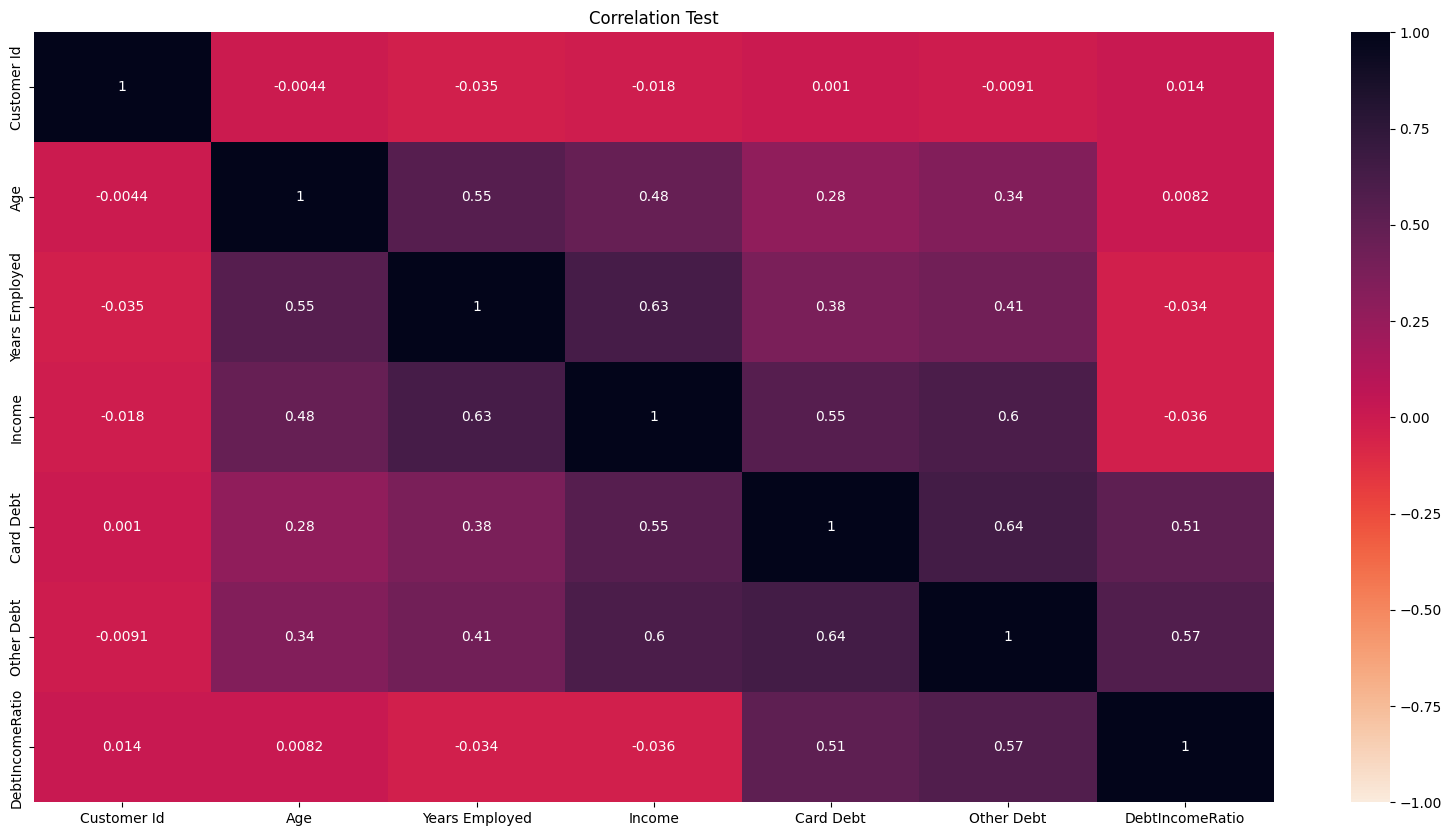

In [114]:
# Correlation Test
df_corr = df[['Customer Id', 'Age', 'Years Employed', 'Income', 'Card Debt', 'Other Debt', 'DebtIncomeRatio']]

# Plotting to simplify the process of analyzing the correlation between parameters.
fig,ax = plt.subplots(figsize=[20,10])
plt.title('Correlation Test')
sns.heatmap(df_corr.corr(), vmin=-1, vmax=1,
annot=True, cmap="rocket_r")
plt.show()

Based on the correlation test between all features, we can know that :

- The greater the `Age`, the greater the `Years Employed`, `Income`, `Card Debt`, and `Other Debt`. This shows that there is a positive correlation between `Age` and other features.

- The greater the `Years Employed`, the greater the `Age`, `Income`, `Card Debt` and `Other Debt`. This shows that there is a positive correlation between `Years Employed` and other features.

- The greater the `Income`, the greater the `Age`, `Years Employed`, `Card Debt` and `Other Debt`. This shows that there is a positive correlation between `Income` and other features.

- The greater the `Card Debt`, the greater the `Age`, `Years Employed`, `Income`, `Other Debt` and `DebtIncomeRatio`. This shows that there is a positive correlation between `Card Debt` and other features.

- The greater the `Other Debt`, the greater the `Age`, `Years Employed`, `Income`, `Card Debt` and `DebtIncomeRatio`. This shows that there is a positive correlation between `Other Debt` and other features.

- The greater the `DebtIncomeRatio`, the greater the `Card Debt` and `Other Debt`. This shows that there is a positive correlation between `DebtIncomeRatio` and these two features.

## V. Feature Engineering

### V.I. Change all column to be X (Features)

In [44]:
# Change all column to be X (Features)
X = df.copy()
X.head(3)

Unnamed: 0  Customer Id  Age  Edu  Years Employed  Income  Card Debt  \
0           0            1   41    2               6      19      0.124   
1           1            2   47    1              26     100      4.582   
2           2            3   33    2              10      57      6.111   

   Other Debt  Defaulted  DebtIncomeRatio  
0       1.073        0.0              6.3  
1       8.218        0.0             12.8  
2       5.802        1.0             20.9

In [45]:
# Show shape on X
print(X.shape)

(850, 10)


### V.II. Feature Selection

In this feature selection stage, I use features that are strongly correlated between their features. Also, the reason I used these features is because of the limited features in this dataset. The features that I used include `Age`, `Years Employed`, `Income`, `Card Debt`, `Other Debt` and `DebtIncomeRatio`. I did not use `Edu` and `Defaulted` features because these two features are categorical features that are not suitable if processed using the K-Means Clustering algorithm.

In [46]:
# Remove feature 

X.drop(['Unnamed: 0', 'Customer Id', 'Edu', 'Defaulted'], axis=1, inplace=True)
X

Age  Years Employed  Income  Card Debt  Other Debt  DebtIncomeRatio
0     41               6      19      0.124       1.073              6.3
1     47              26     100      4.582       8.218             12.8
2     33              10      57      6.111       5.802             20.9
3     29               4      19      0.681       0.516              6.3
4     47              31     253      9.308       8.908              7.2
..   ...             ...     ...        ...         ...              ...
845   27               5      26      0.548       1.220              6.8
846   28               7      34      0.359       2.021              7.0
847   25               0      18      2.802       3.210             33.4
848   32              12      28      0.116       0.696              2.9
849   52              16      64      1.866       3.638              8.6

[850 rows x 6 columns]

### V.III. Handling Missing Value

In [47]:
# Missing Value Checking
X.isna().sum()

Age                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
DebtIncomeRatio    0
dtype: int64

Because there is no missing value, let's continue to next step

### V.IV. Handling Outlier

In this section, we will check for outliers in the numeric features/columns.

In [48]:
# Make function to show histogram & boxplot

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable],kde=True, bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

#### V.V.I. Check Feature Scewness & Outlier on X using Histogram & Boxplot

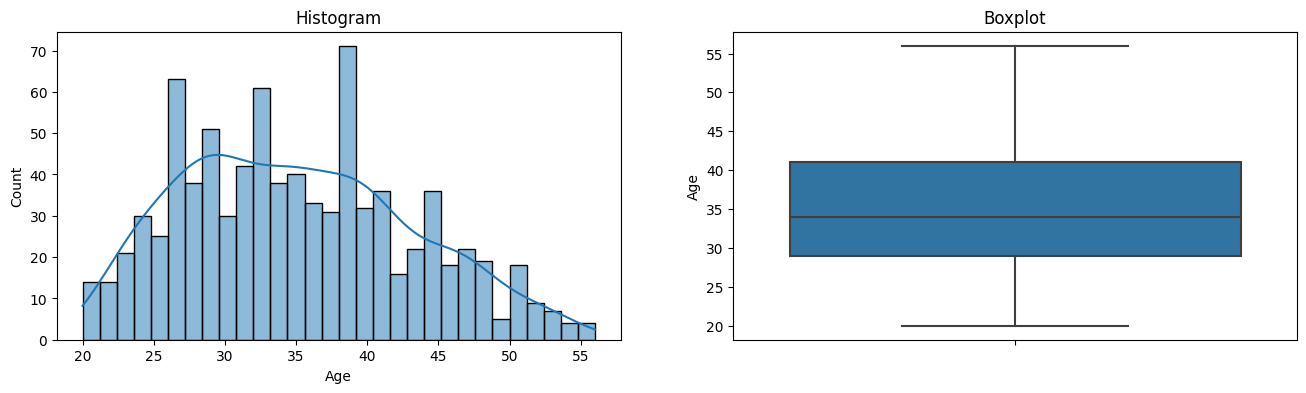


Skewness Value :  0.33503660426294773


In [51]:
# Set value histogram & boxplot and show skewness from feature `Age`

diagnostic_plots(X, 'Age')
print('\nSkewness Value : ', X['Age'].skew())

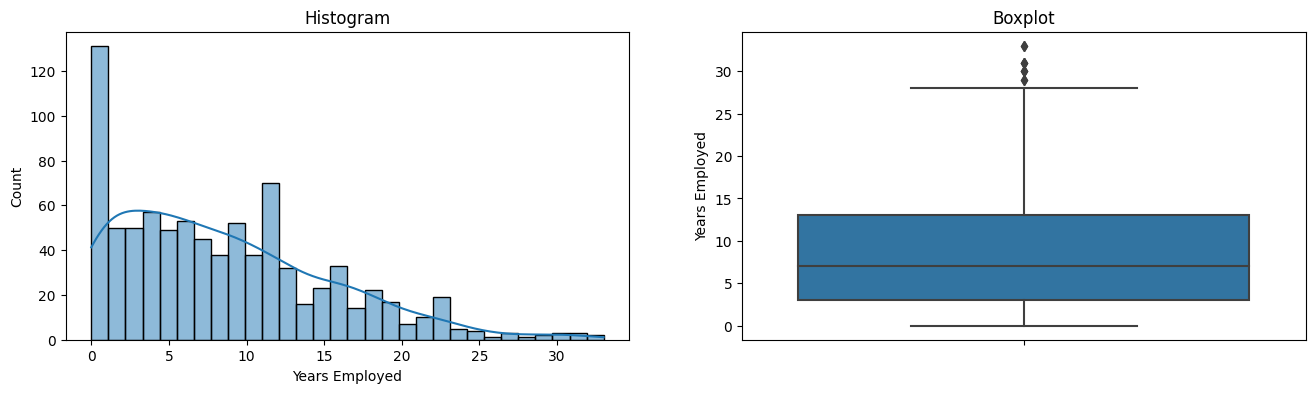


Skewness Value :  0.8626629060066772


In [52]:
# Set value histogram & boxplot and show skewness from feature `Years Employed`

diagnostic_plots(X, 'Years Employed')
print('\nSkewness Value : ', X['Years Employed'].skew())

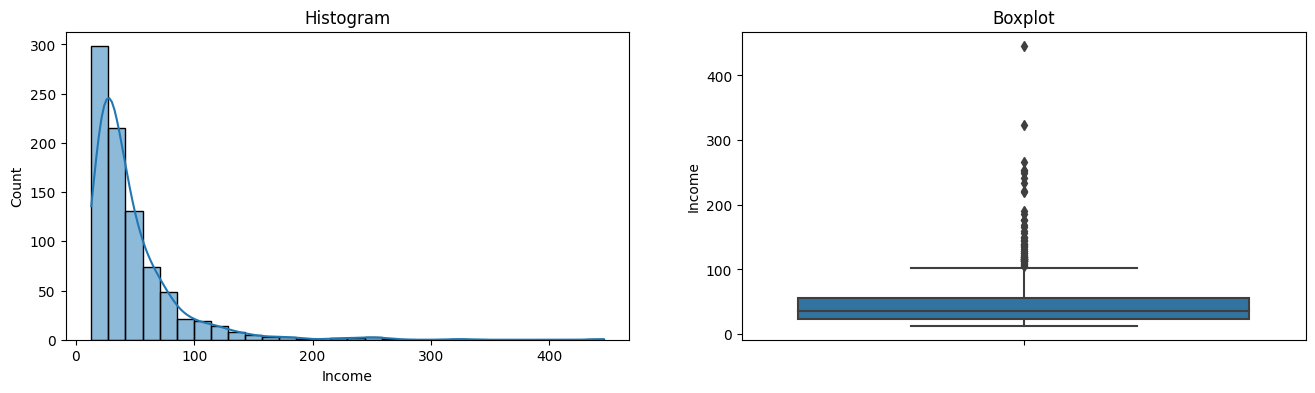


Skewness Value :  3.7007612669003658


In [53]:
# Set value histogram & boxplot and show skewness from feature `Income`

diagnostic_plots(X, 'Income')
print('\nSkewness Value : ', X['Income'].skew())

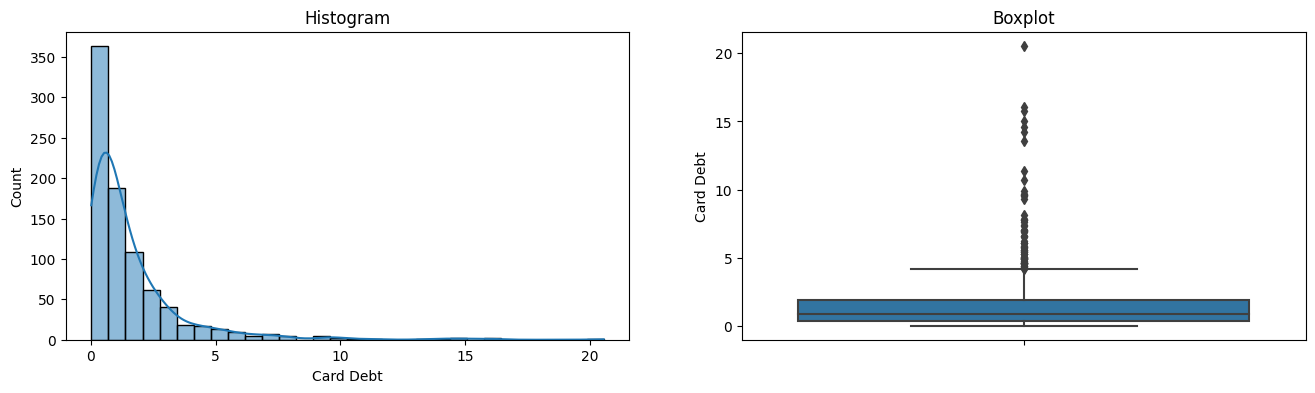


Skewness Value :  3.701789963315442


In [55]:
# Set value histogram & boxplot and show skewness from feature `Card Debt`

diagnostic_plots(X, 'Card Debt')
print('\nSkewness Value : ', X['Card Debt'].skew())

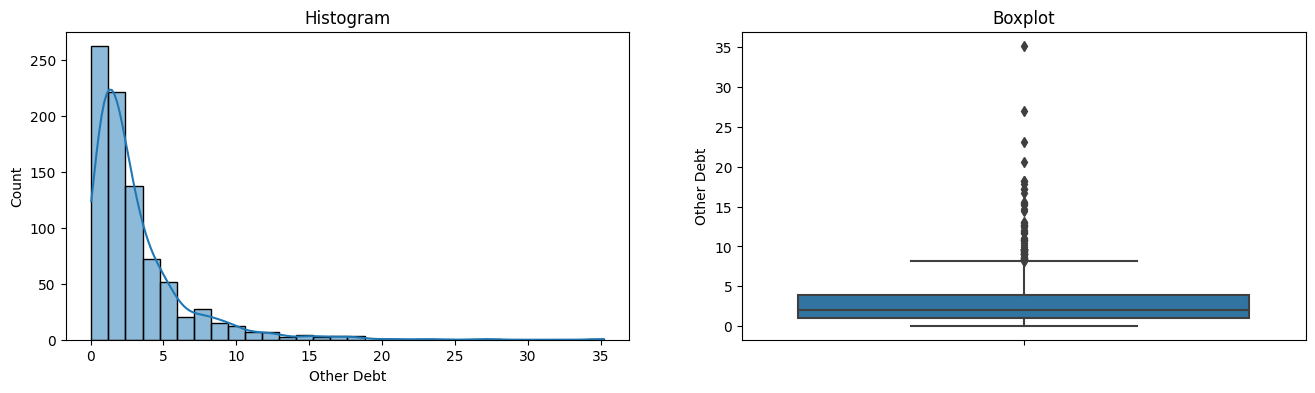


Skewness Value :  3.2060059726951575


In [56]:
# Set value histogram & boxplot and show skewness from feature `Other Debt`

diagnostic_plots(X, 'Other Debt')
print('\nSkewness Value : ', X['Other Debt'].skew())

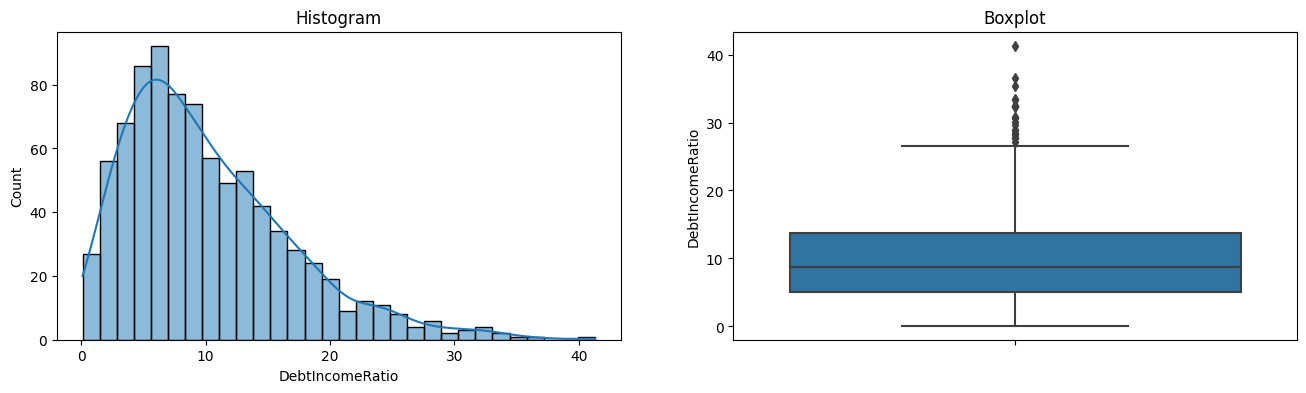


Skewness Value :  1.1249989356474004


In [57]:
# Set value histogram & boxplot and show skewness from feature `DebtIncomeRatio`

diagnostic_plots(X, 'DebtIncomeRatio')
print('\nSkewness Value : ', X['DebtIncomeRatio'].skew())

Based on the diagram above, we can see that there are outliers in almost all features except in the `Age` feature/column.

#### V.V.II. Outlier Detection

In this step, I will handle the outliers using the LOF method.

In [58]:
#Setting up the model. K is set by passing the n_neighbors parameter with integer. 20 is often considered good already to detect an outlier. By default the distance metric is Euclidean distance.
lof = LocalOutlierFactor(n_neighbors = 20,contamination=0.05)
#Training the model, I drop few columns that was not a continuous variable
X['lof_label'] = lof.fit_predict(X)
X

Age  Years Employed  Income  Card Debt  Other Debt  DebtIncomeRatio  \
0     41               6      19      0.124       1.073              6.3   
1     47              26     100      4.582       8.218             12.8   
2     33              10      57      6.111       5.802             20.9   
3     29               4      19      0.681       0.516              6.3   
4     47              31     253      9.308       8.908              7.2   
..   ...             ...     ...        ...         ...              ...   
845   27               5      26      0.548       1.220              6.8   
846   28               7      34      0.359       2.021              7.0   
847   25               0      18      2.802       3.210             33.4   
848   32              12      28      0.116       0.696              2.9   
849   52              16      64      1.866       3.638              8.6   

     lof_label  
0            1  
1            1  
2            1  
3            1  
4           -1  
..         ...  
845          1  
846          1  
847         -1  
848          1  
849          1  

[850 rows x 7 columns]

In [59]:
# Outliers checking
X.lof_label.value_counts()

 1    807
-1     43
Name: lof_label, dtype: int64

Based on the search for outliers using the LOF method, we can find out that there are 43 outliers. In the next step, I will use the clean data, which is 807 data.

In [60]:
# Store data clean to X_clean
X_clean = X[X['lof_label']!= -1]
X_clean

Age  Years Employed  Income  Card Debt  Other Debt  DebtIncomeRatio  \
0     41               6      19      0.124       1.073              6.3   
1     47              26     100      4.582       8.218             12.8   
2     33              10      57      6.111       5.802             20.9   
3     29               4      19      0.681       0.516              6.3   
5     40              23      81      0.998       7.831             10.9   
..   ...             ...     ...        ...         ...              ...   
844   41               7      43      0.694       1.198              4.4   
845   27               5      26      0.548       1.220              6.8   
846   28               7      34      0.359       2.021              7.0   
848   32              12      28      0.116       0.696              2.9   
849   52              16      64      1.866       3.638              8.6   

     lof_label  
0            1  
1            1  
2            1  
3            1  
5            1  
..         ...  
844          1  
845          1  
846          1  
848          1  
849          1  

[807 rows x 7 columns]

In [61]:
# Drop column `lof_label`
X_clean.drop('lof_label',axis=1,inplace=True)
X.drop('lof_label',axis=1,inplace=True)

In [62]:
# Show X_clean
X_clean

Age  Years Employed  Income  Card Debt  Other Debt  DebtIncomeRatio
0     41               6      19      0.124       1.073              6.3
1     47              26     100      4.582       8.218             12.8
2     33              10      57      6.111       5.802             20.9
3     29               4      19      0.681       0.516              6.3
5     40              23      81      0.998       7.831             10.9
..   ...             ...     ...        ...         ...              ...
844   41               7      43      0.694       1.198              4.4
845   27               5      26      0.548       1.220              6.8
846   28               7      34      0.359       2.021              7.0
848   32              12      28      0.116       0.696              2.9
849   52              16      64      1.866       3.638              8.6

[807 rows x 6 columns]

In [63]:
# Take the index of X_clean that has been cleared of outliers.
X_index = X_clean.index.values.tolist()

# Equalize index.
X_clean = X_clean.loc[X_index]

X.drop(X.index.difference(X_clean.index), inplace=True)

# Check the shape between X_clean and X.

print(X_clean.shape)
print(X.shape)

(807, 6)
(807, 6)


### V.V. Feature Scaling

In this step, I will use the MinMaxScaler because the average data distribution is not normal. This is evidenced by the distance between the mean and median values.

In [64]:
# Show basic statistic

X.describe()

Age  Years Employed      Income   Card Debt  Other Debt  \
count  807.000000      807.000000  807.000000  807.000000  807.000000   
mean    34.617100        8.272615   42.563817    1.355753    2.712466   
std      7.810145        6.414935   26.247781    1.517955    2.572186   
min     20.000000        0.000000   13.000000    0.012000    0.046000   
25%     29.000000        3.000000   24.000000    0.370500    1.011000   
50%     34.000000        7.000000   34.000000    0.849000    1.897000   
75%     40.000000       12.000000   53.000000    1.737000    3.470000   
max     56.000000       33.000000  159.000000    9.877000   18.257000   

       DebtIncomeRatio  
count       807.000000  
mean          9.735812  
std           6.062740  
min           0.100000  
25%           5.000000  
50%           8.600000  
75%          13.400000  
max          33.300000

In [65]:
# Get numeric columns
num_columns = X[['Age', 'Years Employed', 'Income', 'Card Debt', 'Other Debt', 'DebtIncomeRatio']].columns.tolist()

X_col = X[num_columns]

In [66]:
# Feature Scaling using MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_col)
X_scaled = scaler.transform(X_col)
X_scaled = pd.DataFrame(X_scaled, columns = [num_columns])

### V.VI. PCA for Dimension Reduction

After scaling the features we use, we will perform Dimentional Reduction using PCA (Principal Component Analysis).
PCA (Principal Component Analysis) is a statistical and mathematical method used to reduce the dimensionality of data by projecting data from a high-dimensional space to a lower-dimensional space. PCA focuses on finding patterns of variability in high-dimensional data and representing them in a lower-dimensional form with the most significant variability placed in the principal components.

There are 2 main reasons why we use PCA in this case, namely:

- **Dimensionality Reduction**: PCA allows us to reduce the number of features or variables in a high-dimensional dataset. This is beneficial when we have very complex data and want to reduce its complexity, making it easier to analyze and understand the data. 

- **Data Visualization**: PCA is also used as a data visualization tool. By reducing the dimensionality of the data to two or three principal components, we can easily visualize the data in the form of two- or three-dimensional plots.

So, let's do it:

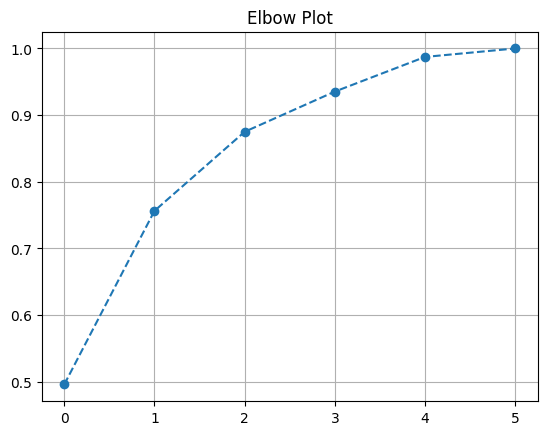

In [67]:
# Setting PCA
pca = PCA()
pca.fit(X_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)

# Show plot PCA to find Elbow
plt.figure()
plt.title('Elbow Plot')
plt.plot(cumsum,'o--')
plt.grid(True)
plt.show()

In [68]:
# Show variance ratio from PCA
pca.explained_variance_ratio_

array([0.49601255, 0.26037766, 0.11863414, 0.06031186, 0.05197867,
       0.01268512])

In this context:

- **0.49601255** is the proportion of variability explained by the first principal component.
- **0.26037766** is the proportion of variability explained by the second principal component.
- **0.11863414** is the proportion of variability explained by the third principal component.
- **0.06031186** is the proportion of variability explained by the fourth principal component.
- **0.05197867** is the proportion of variability explained by the fifth principal component.
- **0.01268512** is the proportion of variability explained by the sixth principal component.

This proportion of variability measures how much information is retained by each principal component. Thus, we can use this information to decide how many principal components we need to keep in the PCA analysis. Usually, we will retain a number of principal components that are able to explain most of the variability in your data. In this case, the first (0.496) and second (0.260) principal components alone have explained about 75.6% of the total variability in this data.

In [69]:
# Determining the amount of information we will use from the PCA results
X_pca = PCA(n_components=0.90).fit_transform(X_scaled)

In [70]:
# Store X_pca to dataframe
X_pca_df = pd.DataFrame(X_pca)
X_pca_df.shape

(807, 4)

Based on the results of dimension reduction using PCA with 90% information, we can simply use 4 dimensions out of the 6 dimensions.

In the next process, we will define the model algorithm that we will use. In this case, we will use the K-Means algorithm for the clustering process.

## VI. Model Definition

In [92]:
# Training using KMeans

kmeans = KMeans(n_clusters=2,random_state=50)

## VII. Model Training

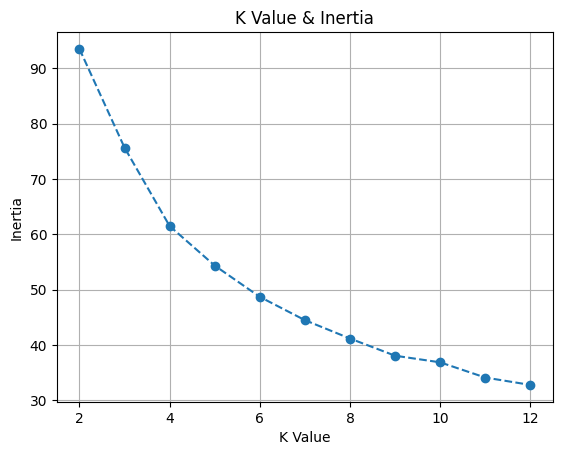

In [71]:
# Make plot for K Value & Inertia
K=[2,3,4,5,6,7,8,9,10,11,12]
inertia = [KMeans(n_clusters=i,n_init='auto').fit(X_pca).inertia_ for i in K]
plt.title('K Value & Inertia')
plt.plot(K,inertia,'o--')
plt.xlabel('K Value')
plt.ylabel('Inertia')
plt.grid()
plt.show()

Based on the plot diagram above, we can know that the more clusters (K-Value), the closer the inertia is or it can be said that the points in the cluster with the center (centroid) are closer.

## VIII. Model Evaluation

In [90]:
# Function for evaluate metrics
def evaluate_metrics(df, min_clust=2, max_clust=12, rand_state=50):
    inertias = []
    silhouette = []
    ch_score = []
    db_score = []
    for n_clust in range(min_clust, max_clust):
        kmeans = KMeans(n_clusters=n_clust, random_state=rand_state)
        y_label = kmeans.fit_predict(X_pca)
        inertias.append(kmeans.inertia_)
        silhouette.append(silhouette_score(X_pca, y_label))
        ch_score.append(calinski_harabasz_score(X_pca, y_label))
        db_score.append(davies_bouldin_score(X_pca, y_label))        

    fig, ax = plt.subplots(2, 2, figsize=(20, 10))
    ax[0][0].plot(range(min_clust, max_clust), inertias, 'o--', linewidth=2)
    ax[0][0].grid()
    ax[0][0].set_xlabel('No. of clusters')
    ax[0][0].set_ylabel('Inertia')
    
    ax[0][1].plot(range(min_clust, max_clust), silhouette, 'o--', linewidth=2)
    ax[0][1].grid()
    ax[0][1].set_xlabel('No. of clusters')
    ax[0][1].set_ylabel('Silhouette Score')
    
    ax[1][0].plot(range(min_clust, max_clust), ch_score, 'o--', linewidth=2)
    ax[1][0].grid()
    ax[1][0].set_xlabel('No. of clusters')
    ax[1][0].set_ylabel('Calinski Harabasz Score')
    
    ax[1][1].plot(range(min_clust, max_clust), db_score, 'o--', linewidth=2)
    ax[1][1].grid()
    ax[1][1].set_xlabel('No. of clusters')
    ax[1][1].set_ylabel('Davies Bouldin Score')
    fig.suptitle('Metrics to evaluate the number of clusters')
    plt.show()

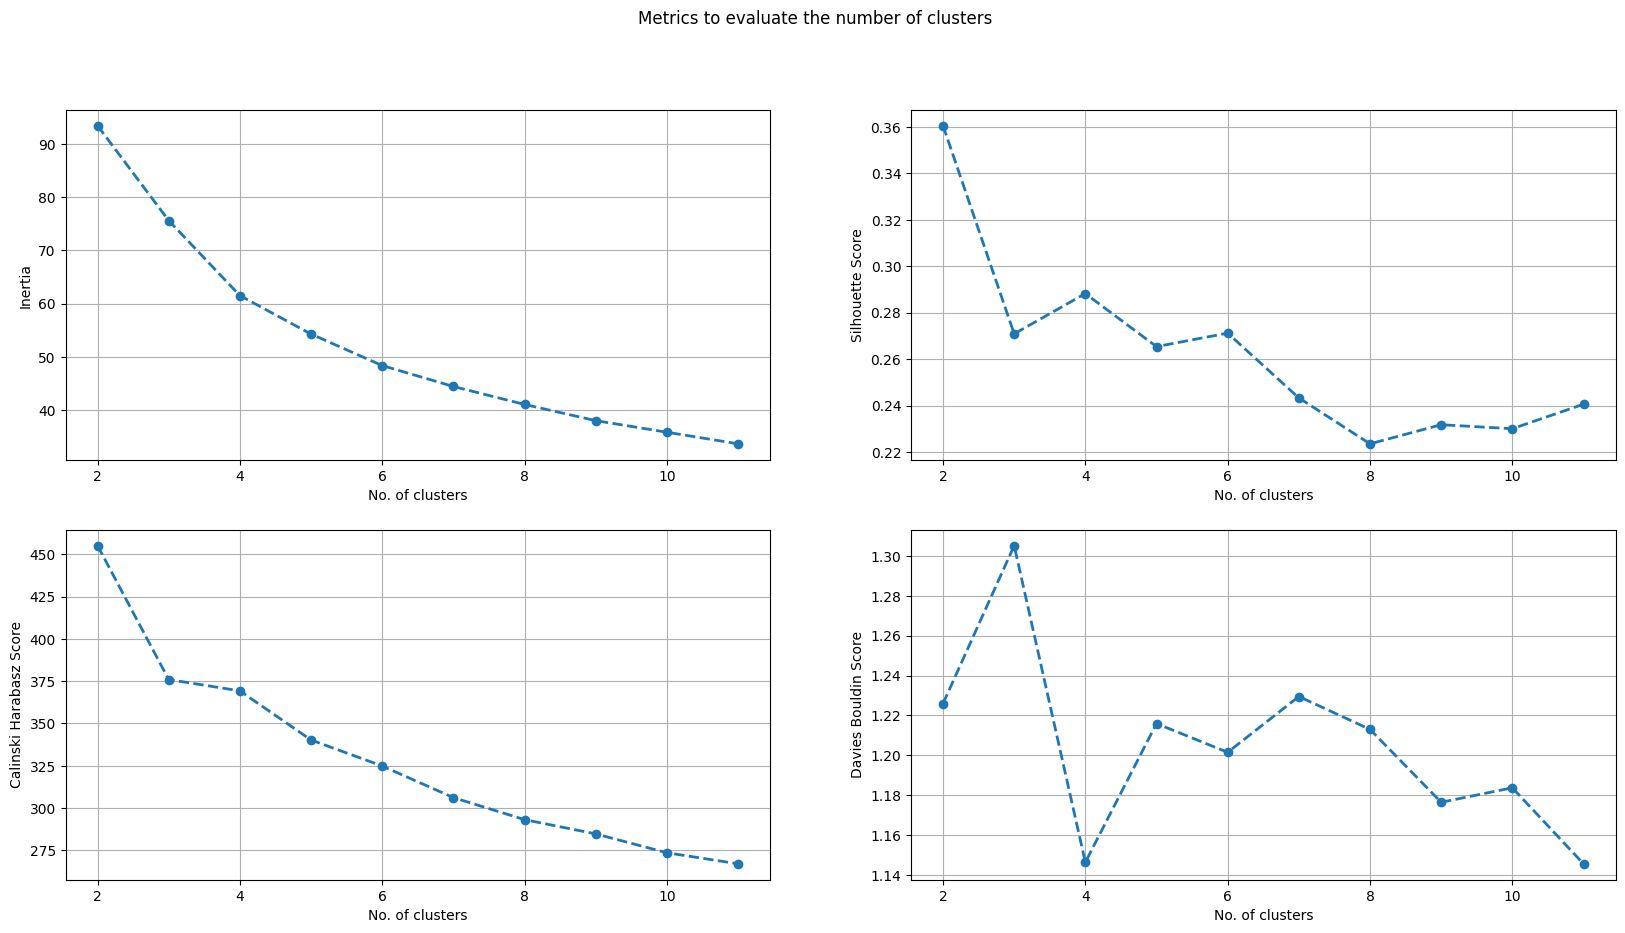

In [91]:
# Plot evaluate metrics
evaluate_metrics(X_pca, min_clust=2, max_clust=12, rand_state=50)

Based on the diagram above, by choosing 2 clusters, we can know that:

- **Inertia is highest**: This indicates that the data in the two clusters are highly dispersed or evenly distributed from the cluster center. High inertia usually indicates that the clusters have high variance.

- **Highest Silhouette Score**: This indicates that the data in cluster 2 has good separation from each other and also from other clusters. A high Silhouette Score value is an indicator that cluster 2 is a good grouping.

- The highest **Calinski-Harabasz Score**: This indicates that cluster 2 has good separation between its clusters. A high Calinski-Harabasz Score also indicates that the variance between clusters is higher than the variance within clusters.

- The **Davies-Bouldin Score is neither the highest nor the lowest**: This indicates that the separation between its clusters in the number of clusters of 2 is not the best, but also not the worst. Davies-Bouldin Score values that are not extreme indicate that the separation between the clusters is fairly good, but there may be room for improvement.

For n_clusters = 2 The average silhouette_score is : 0.36049770361130246
For n_clusters = 3 The average silhouette_score is : 0.27303027365053834
For n_clusters = 4 The average silhouette_score is : 0.28800830924187687
For n_clusters = 5 The average silhouette_score is : 0.25674714363795215
For n_clusters = 6 The average silhouette_score is : 0.26636534910093473
For n_clusters = 7 The average silhouette_score is : 0.25818394399728356
For n_clusters = 8 The average silhouette_score is : 0.24473687528442797
For n_clusters = 9 The average silhouette_score is : 0.2321457801142363
For n_clusters = 10 The average silhouette_score is : 0.23130856017717505
For n_clusters = 11 The average silhouette_score is : 0.2399214569542731
For n_clusters = 12 The average silhouette_score is : 0.2339721119061091


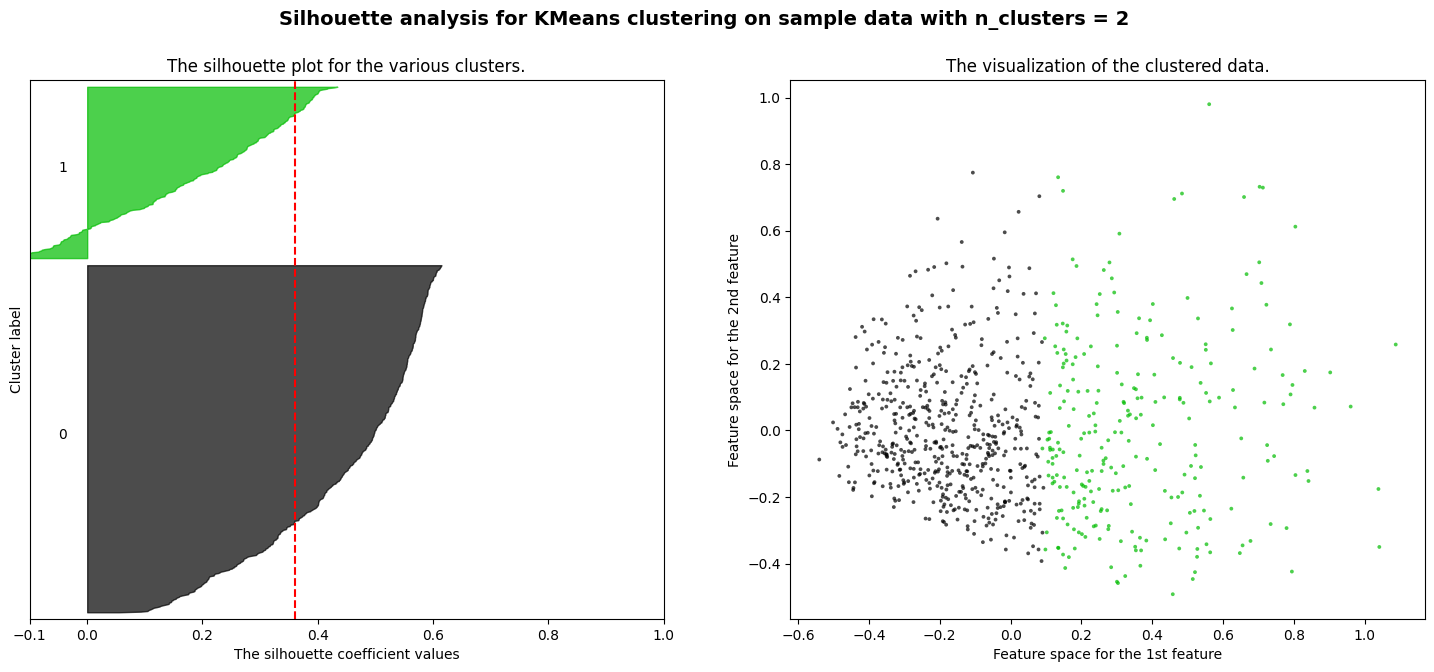

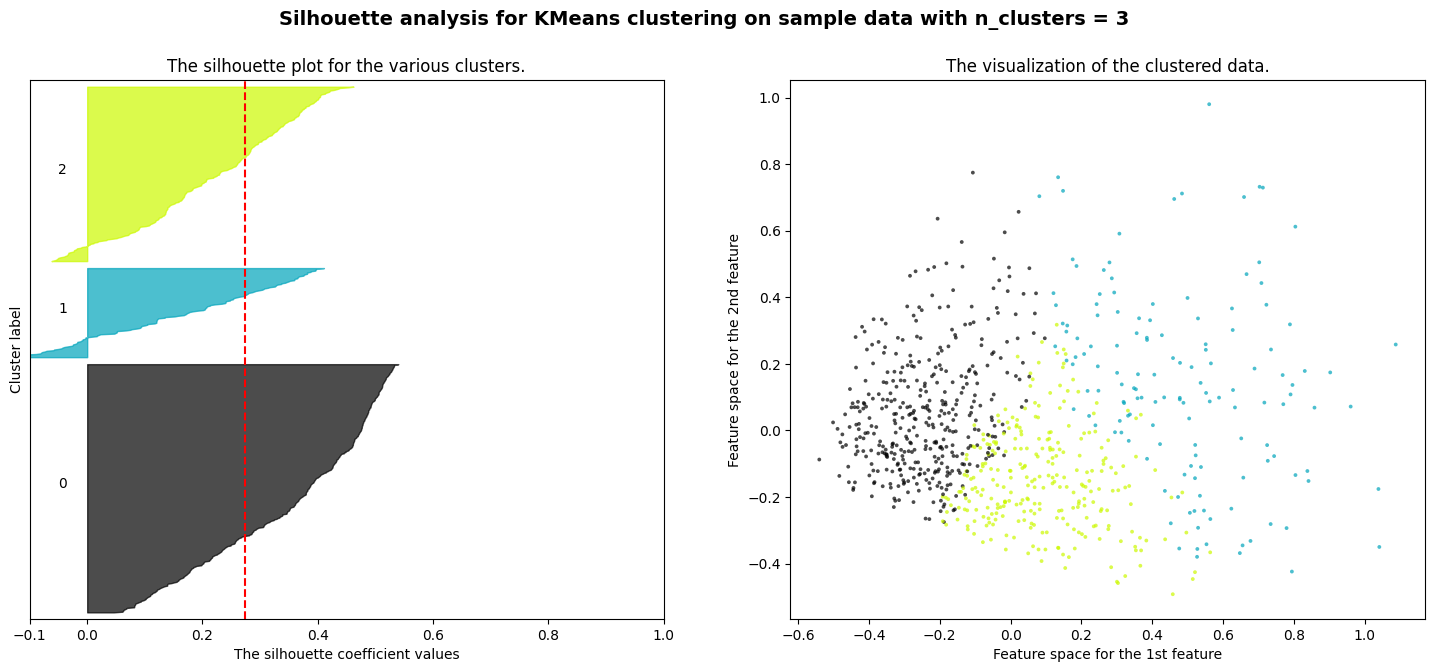

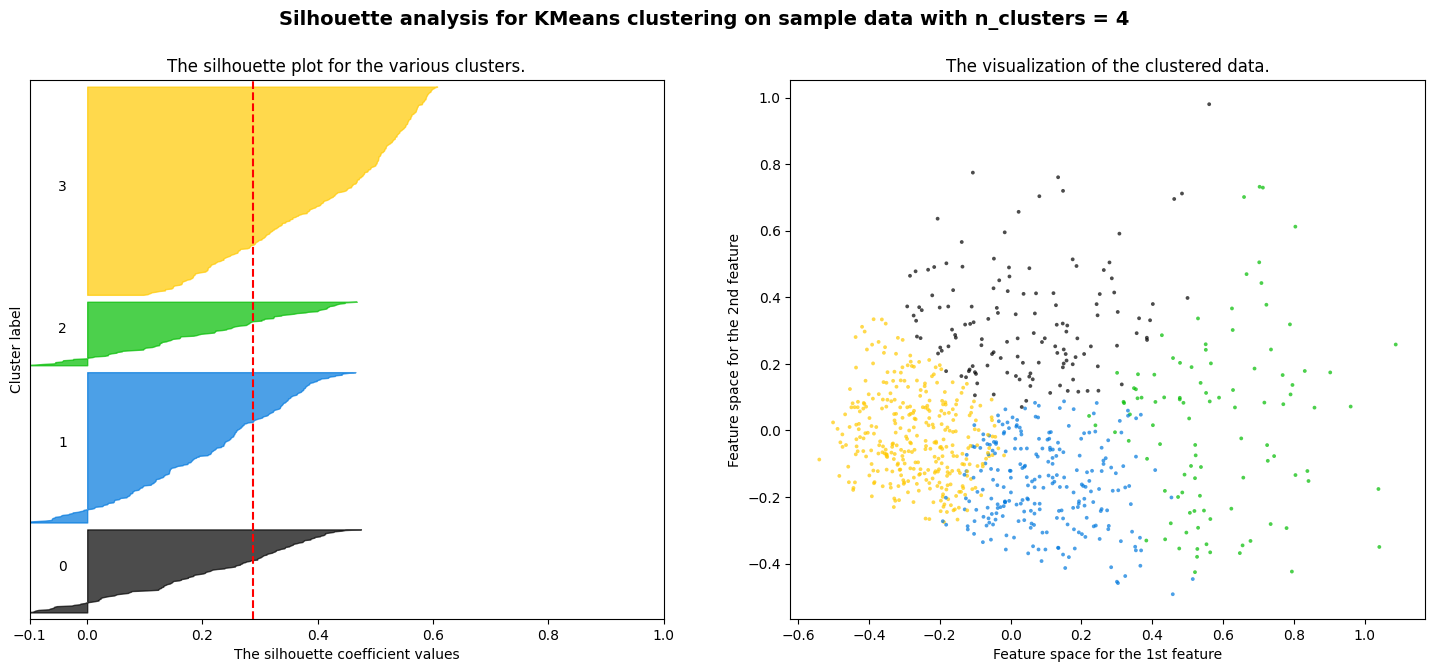

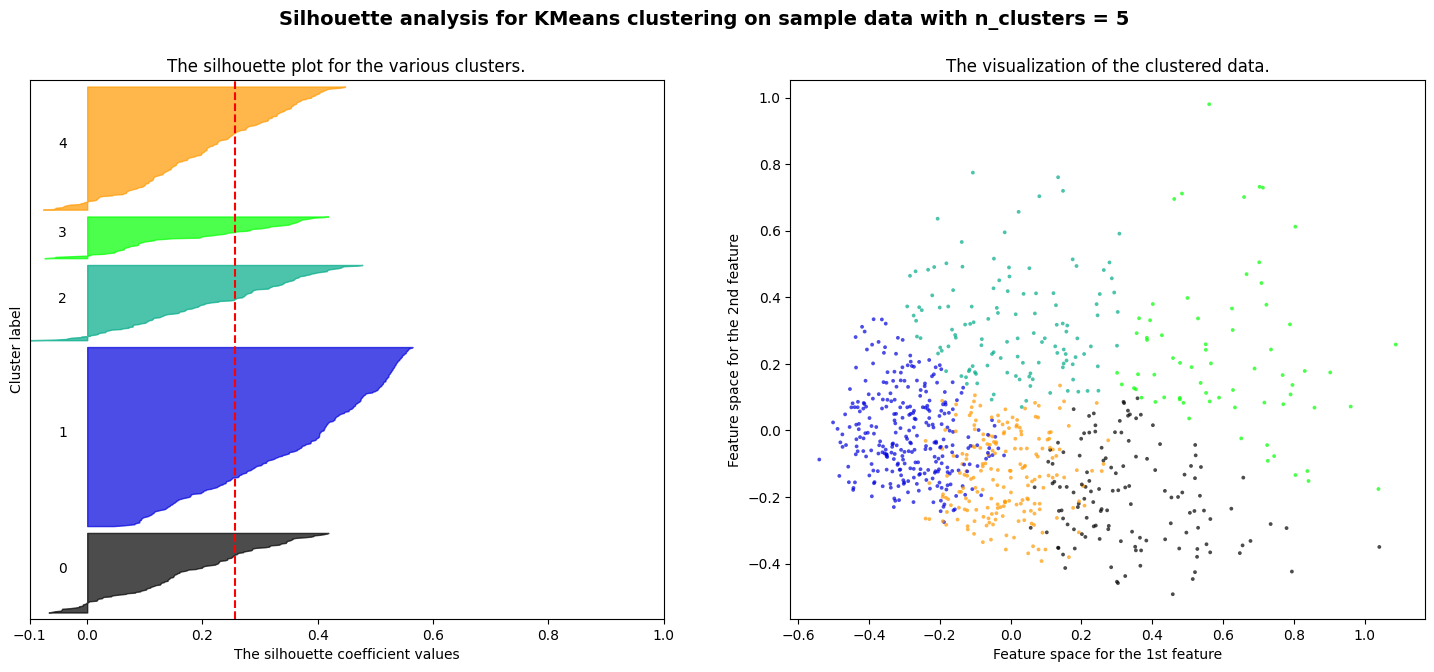

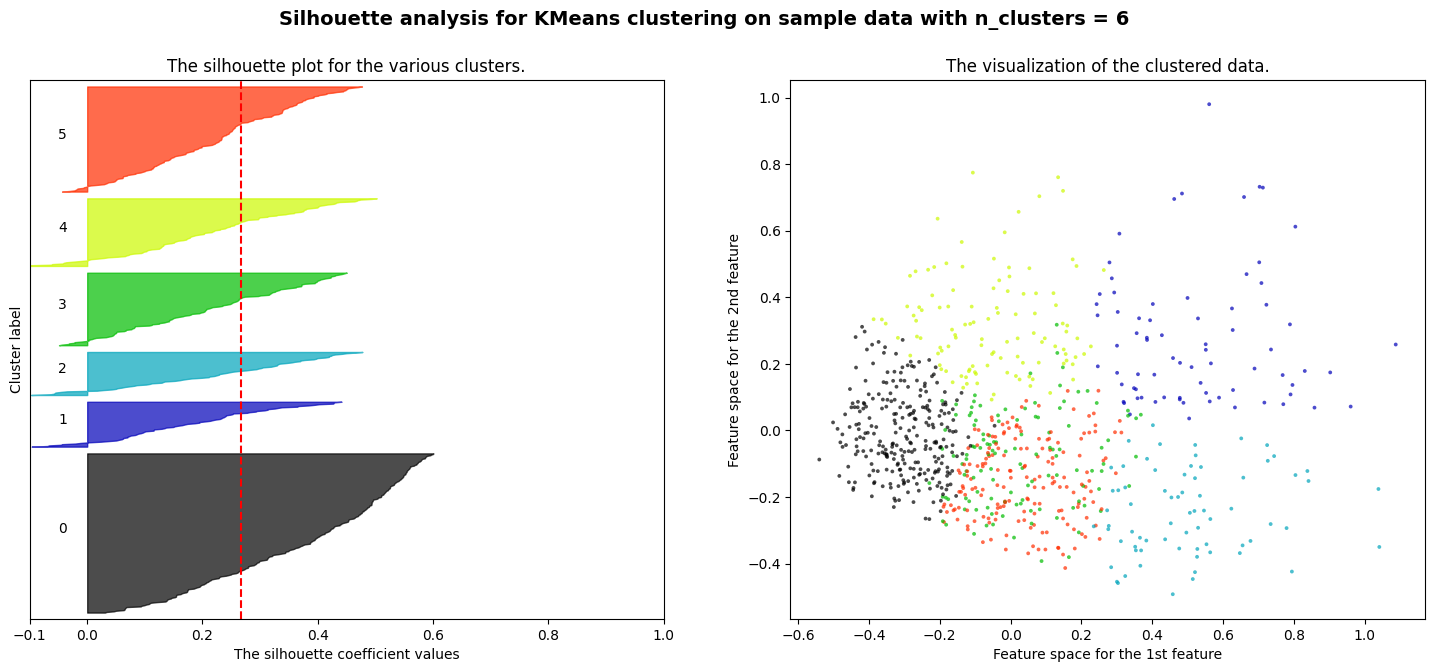

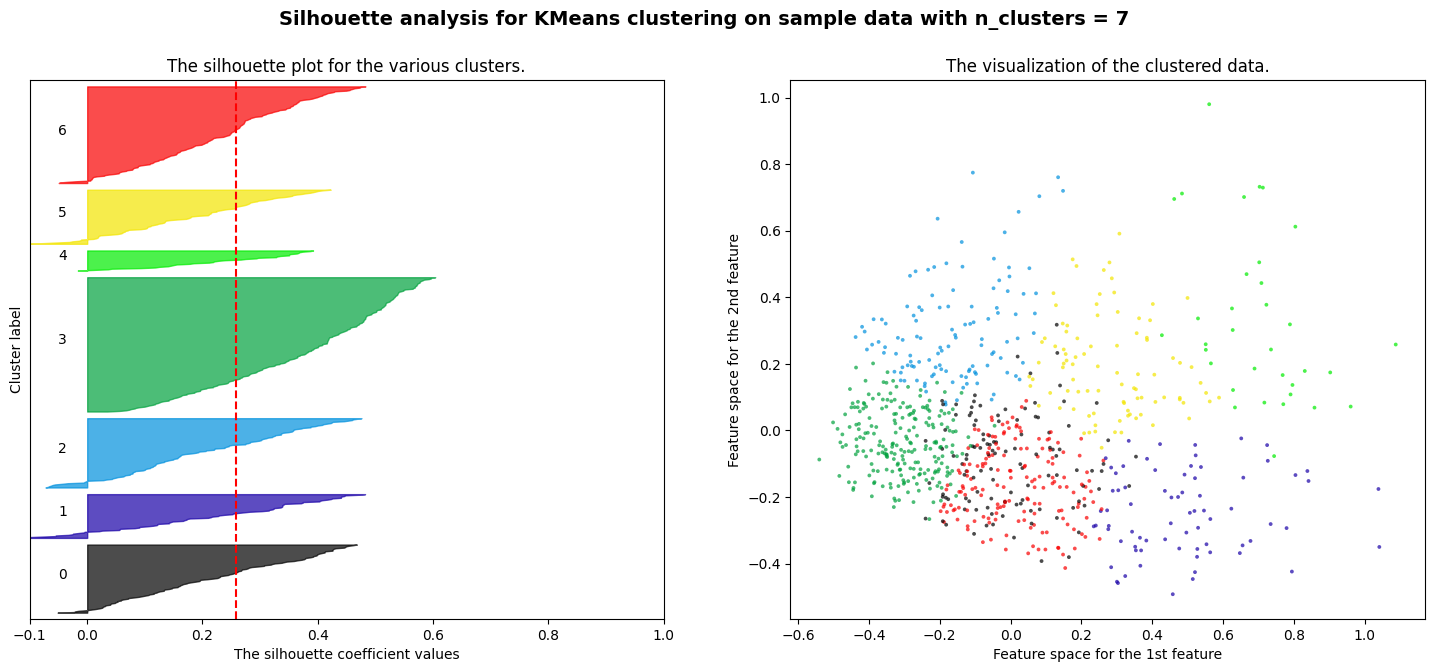

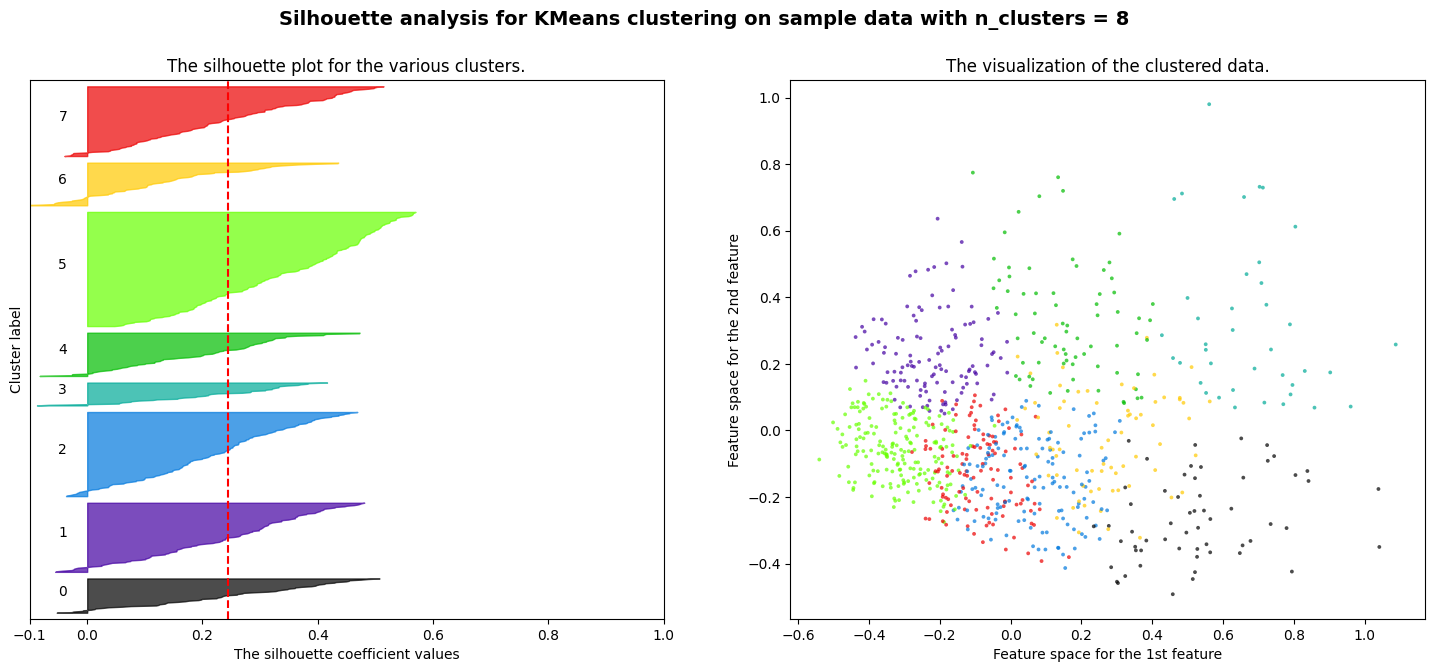

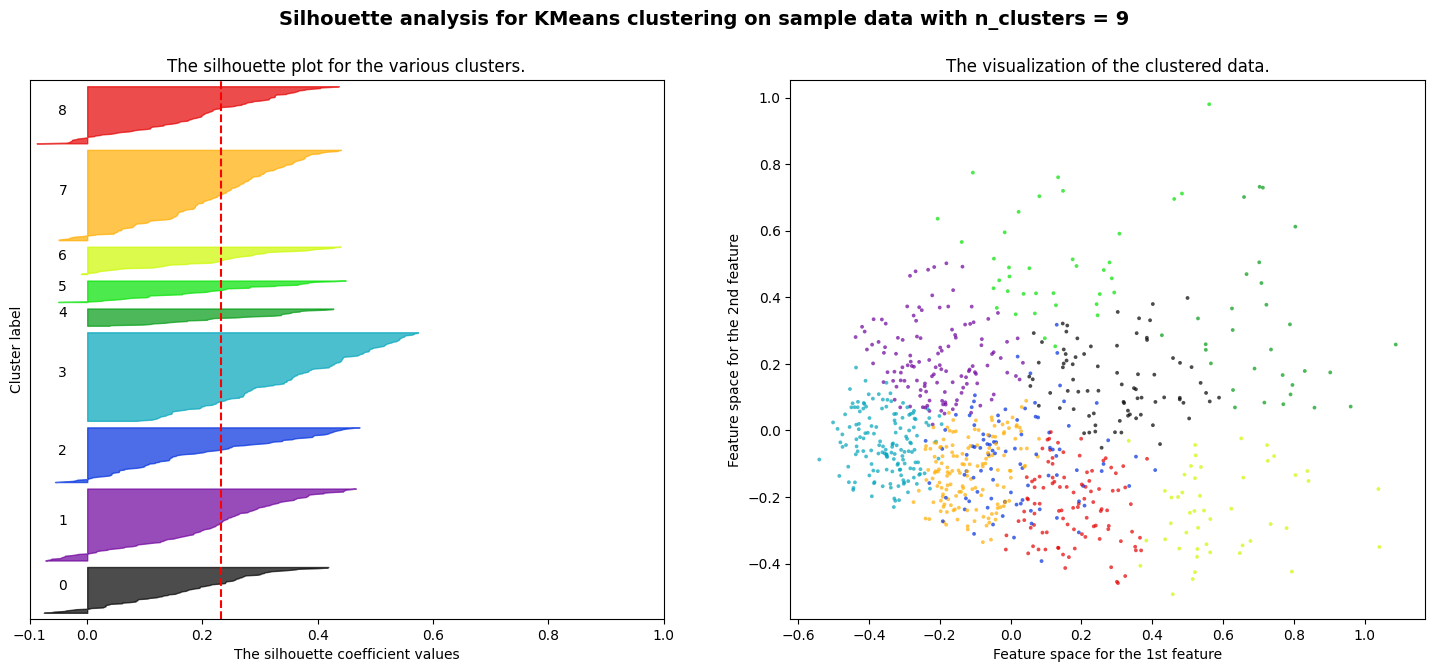

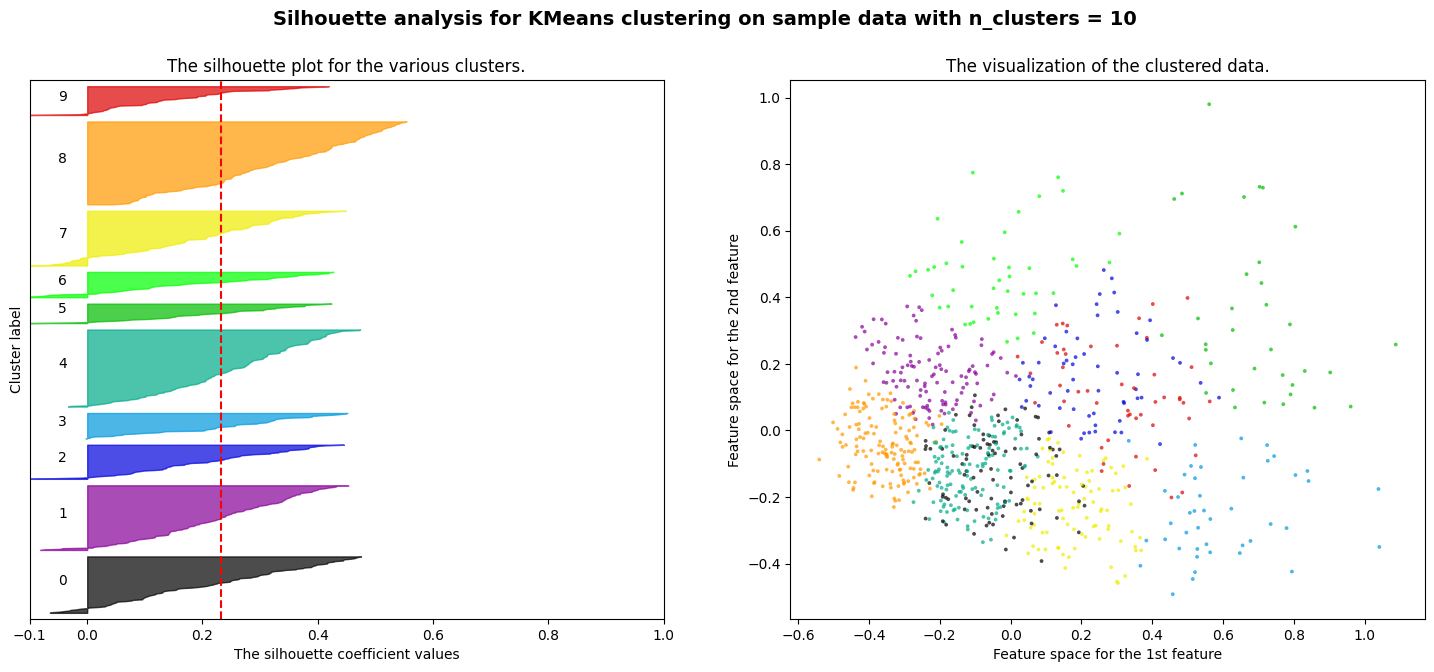

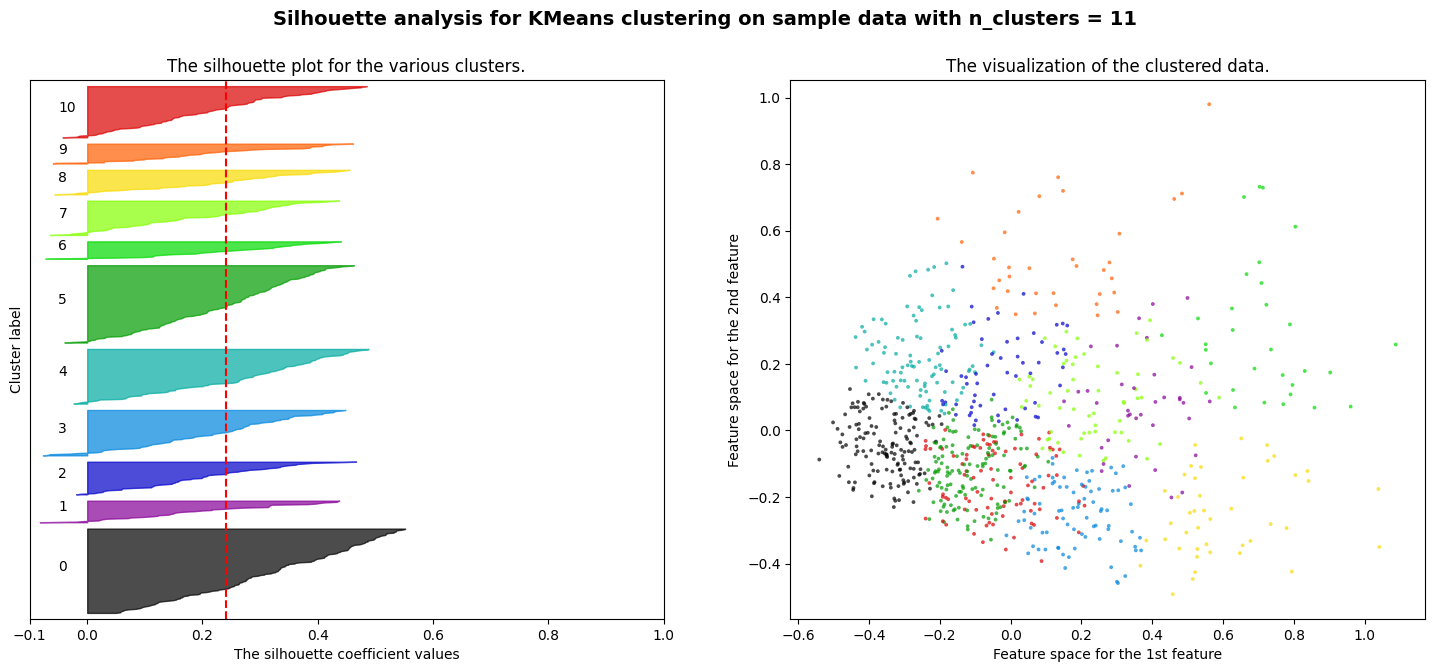

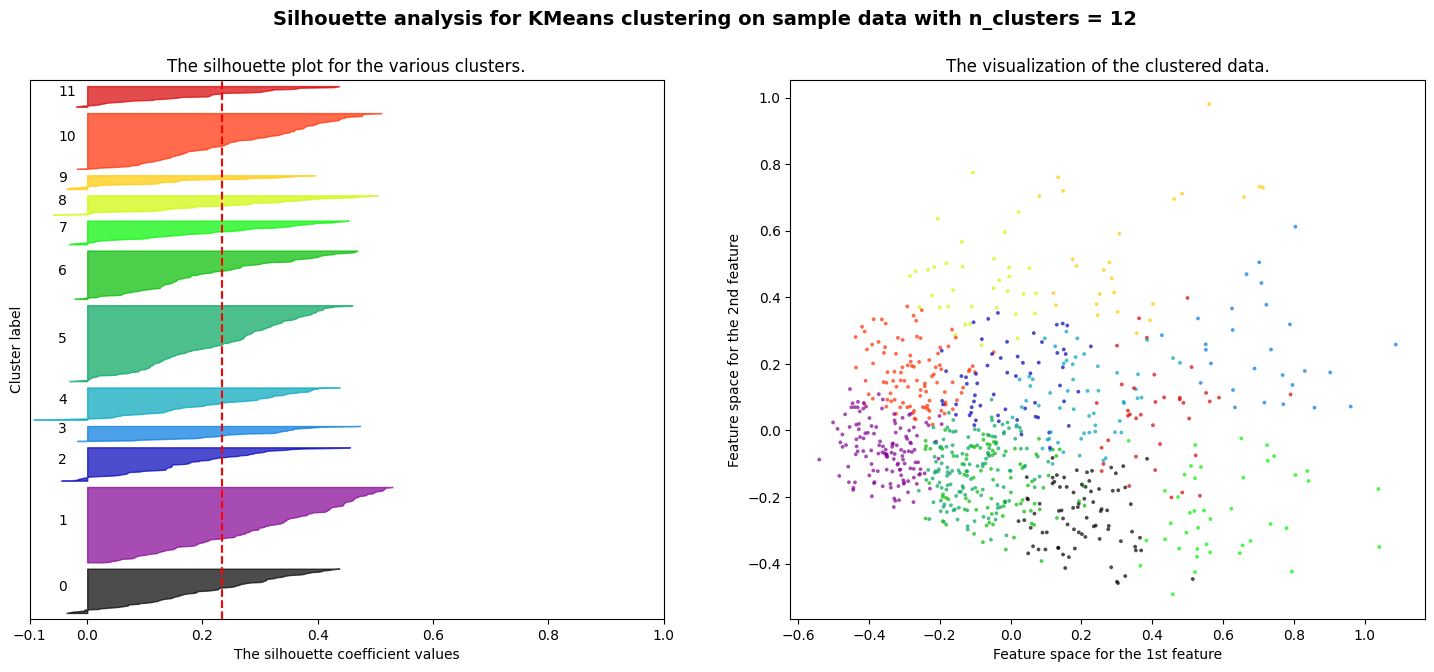

In [76]:
# Plot Silhouette Function
def plot_silhouette(model,range_n_clusters,X,model_name):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = model(n_clusters=n_clusters)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
            "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                            0, ith_cluster_silhouette_values,
                            facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')


        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle((f"Silhouette analysis for {model_name} clustering on sample data "
                    "with n_clusters = %d" % n_clusters),
                    fontsize=14, fontweight='bold')

plot_silhouette(KMeans,K,X_pca_df.values,'KMeans')

Based on the Silhouette Score, we can see that the best number of clusters is 2 with an average Silhouette Score of 0.3605. However, if we choose 2 clusters then the consequence is that there are data in class 1 whose separation is much greater than the cohesion. This could indicate that the points may have been mixed in the wrong cluster.

In [93]:
# Add clustering result column
np.random.seed(20)
km = kmeans.fit(X_scaled)
X_clean['K-Means'] = km.labels_

In [94]:
# Show X_clean
X_clean

Age  Years Employed  Income  Card Debt  Other Debt  DebtIncomeRatio  \
0     41               6      19      0.124       1.073              6.3   
1     47              26     100      4.582       8.218             12.8   
2     33              10      57      6.111       5.802             20.9   
3     29               4      19      0.681       0.516              6.3   
5     40              23      81      0.998       7.831             10.9   
..   ...             ...     ...        ...         ...              ...   
844   41               7      43      0.694       1.198              4.4   
845   27               5      26      0.548       1.220              6.8   
846   28               7      34      0.359       2.021              7.0   
848   32              12      28      0.116       0.696              2.9   
849   52              16      64      1.866       3.638              8.6   

     K-Means  
0          0  
1          1  
2          1  
3          0  
5          1  
..       ...  
844        0  
845        0  
846        0  
848        0  
849        1  

[807 rows x 7 columns]

## IX. Model Analysis

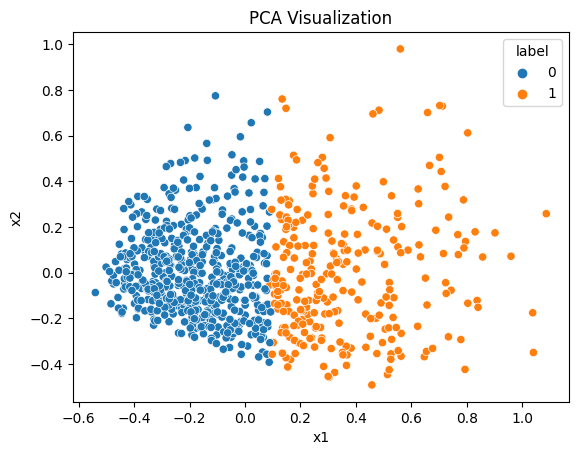

In [208]:
# Make plot clustering using PCA
data = pd.DataFrame(X_pca,columns=['x1','x2','x3','x4'])
data['label'] = km.labels_
sns.scatterplot(data=data,x='x1',y='x2',hue='label')
plt.title('PCA Visualization');

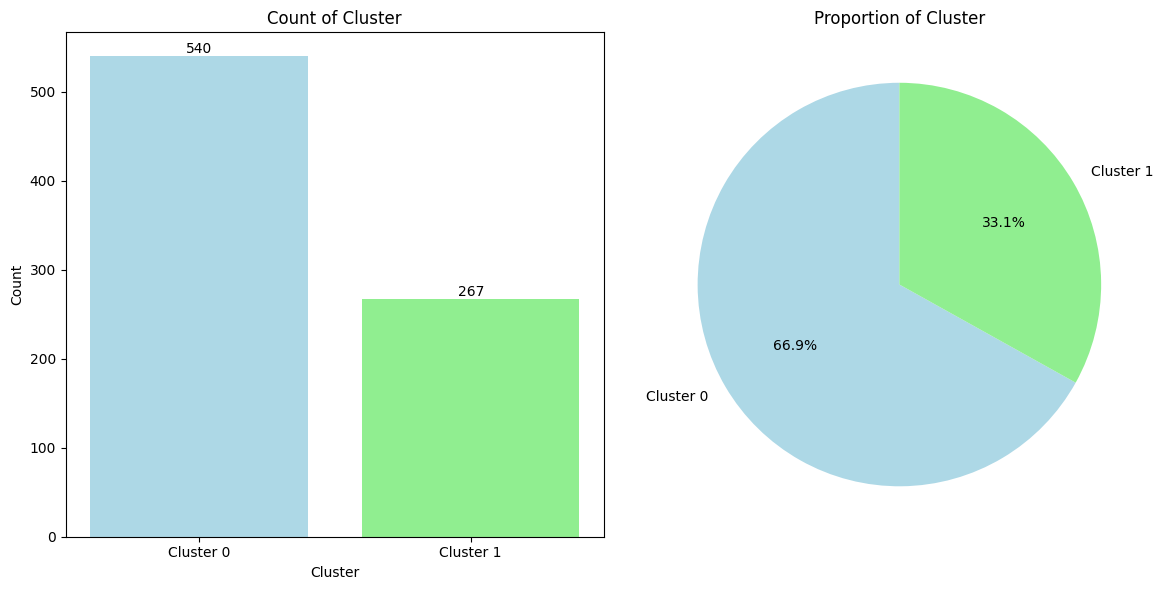

In [104]:
# Data for bar plot
cluster = X_clean['K-Means'].value_counts()

# Data for pie chart
labels = ["Cluster 0", "Cluster 1"]
sizes = cluster.values
colors = ["lightblue", "lightgreen"]

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.subplot(121)  # First subplot (bar plot)
plt.bar(labels, sizes, color=colors)

# Adding a label to a bar
for i, value in enumerate(cluster.values):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=10)
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.title("Count of Cluster")

# Plot pie chart
plt.subplot(122)  # Second subplot (pie chart)
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90, colors=colors)
plt.title("Proportion of Cluster")

plt.tight_layout()  # To ensure subplots do not overlap
plt.show()


Based on the clustering results using K-Means and the diagram above, we can see that :

- **Cluster 0** is the largest cluster with a percentage proportion of 66.9% with a total of 540.
- **Cluster 1** is the second cluster with a percentage proportion of 33.1% with a total of 267.

In [101]:
# Scaled mean all data based on cluster using MinMaxScaler
X_kmeans = X_clean.groupby('K-Means').mean().iloc[:,:]
scaler_mm = MinMaxScaler()
sclr = scaler.fit_transform(X_kmeans)
scaled_means = pd.DataFrame(sclr,X_kmeans.index,X_kmeans.columns)

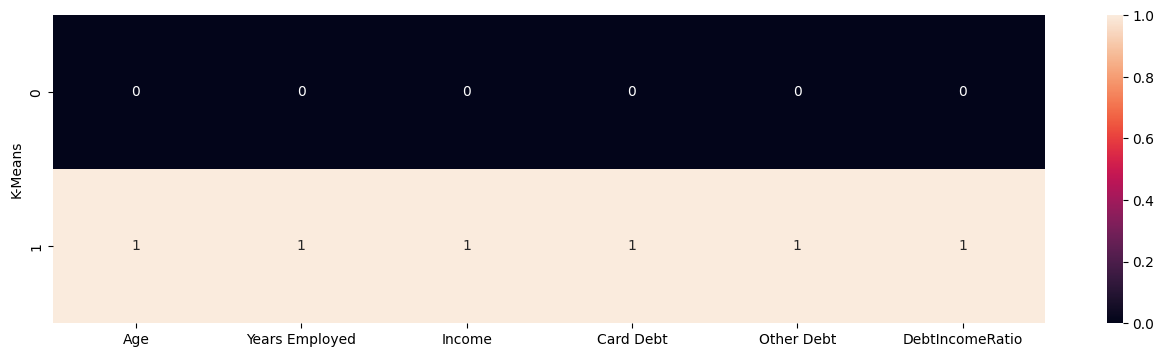

In [102]:
# Heat Map Plot
plt.figure(figsize=(16, 4))
sns.heatmap(scaled_means.iloc[:,:],annot=True);

Based on the clustering results using K-Means and the heatmap plot above, we can find out that the criteria on:

1. Cluster 0 is a cluster with low on `Age`, `Years Employed`, `Income`, `Card Debt`, `Other Debt` and `DebtIncomeRatio`.
2. Cluster 1 is a cluster with high criteria on `Age`, `Years Employed`, `Income`, `Card Debt`, `Other Debt` and `DebtIncomeRatio`.

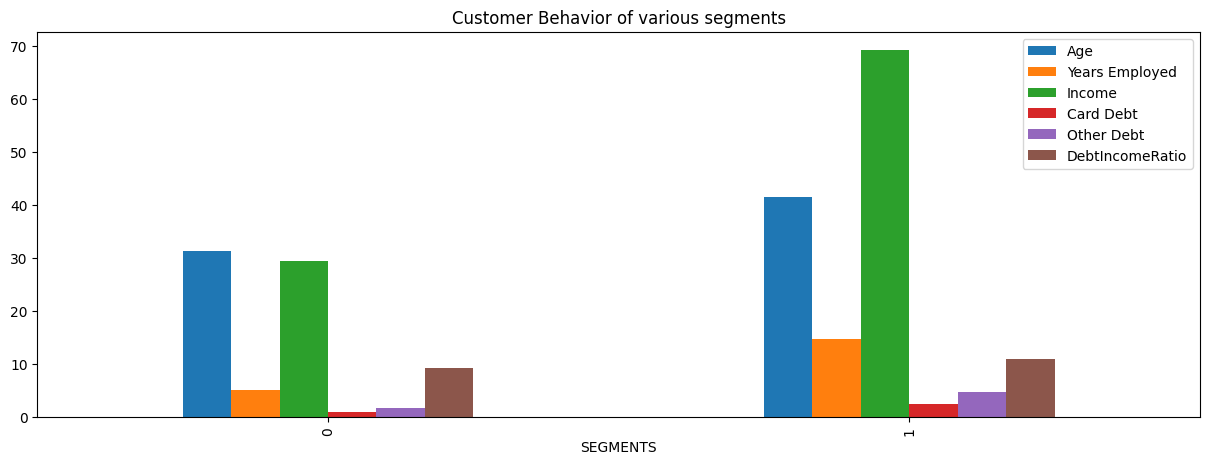

In [209]:
# Plot Customer Behaviour
(X_clean[['Age', 'Years Employed', 'Income', 'Card Debt', 'Other Debt', 'DebtIncomeRatio', 'K-Means']].groupby('K-Means').mean().plot.bar(figsize=(15, 5)))
plt.title('Customer Behavior of various segments')
plt.xlabel('SEGMENTS');

Based on the diagram above, we can know that :
- Cluster 0 is a cluster with segmentation: `Age` is low, `Years Employed` is low, `Income` is low, `Card Debt` is low,  `Other Debt` is low and `DebtIncomeRatio` is low.
- Cluster 1 is a cluster with segmentation: `Age` is high, `Years Employed` is high, `Income` is high, `Card Debt` is high,  `Other Debt` is high and `DebtIncomeRatio` is high.

## X. Model Saving

In [210]:
# Save the files

with open('list_num_cols.txt', 'w') as file_1:
  json.dump(num_columns, file_1)
  
with open('model_scaler.pkl', 'wb') as file_2:
  pickle.dump(scaler, file_2)
  
with open('model_pca.pkl', 'wb') as file_3:
  pickle.dump(pca, file_3)

with open('model_kmeans.pkl', 'wb') as file_4:
  pickle.dump(kmeans, file_4)
  

## XI. Model Inference

This step can be seen in : FP_Inference_Theo.ipynb

## XII. EDA for Business Purpose based on Cluster

### XII.I. Setting data for EDA needed

In [245]:
# Store df to data_inf
data_inf = df

# Split between numerical columns and categorical columns
data_inf_num = data_inf[num_columns]

# Feature scaling

data_inf_num_scaled  = scaler.transform(data_inf_num)
data_inf_final = data_inf_num_scaled

# PCA

data_inf_num_pca  = pca.transform(data_inf_final)
data_inf_final_pca = data_inf_num_pca

# Predict using K-Means Clustering Model

prediction_cluster = pd.DataFrame(kmeans.predict(data_inf_final_pca))

# Rename the prediction_cluster column to "K-Means"
prediction_cluster.columns = ['K-Means']

# Merge data_inf with prediction_cluster horizontally
data = pd.concat([data_inf, prediction_cluster], axis=1)
data = pd.DataFrame(data)

# Drop unused column
data.drop(['Unnamed: 0'], axis=1, inplace=True)

# Filter data to retrieve only observations with cluster 0 & 1
cluster_0 = data[data['K-Means'] == 0]
cluster_1 = data[data['K-Means'] == 1]


### XII.II. EDA for Business Purposed based on Customer Age

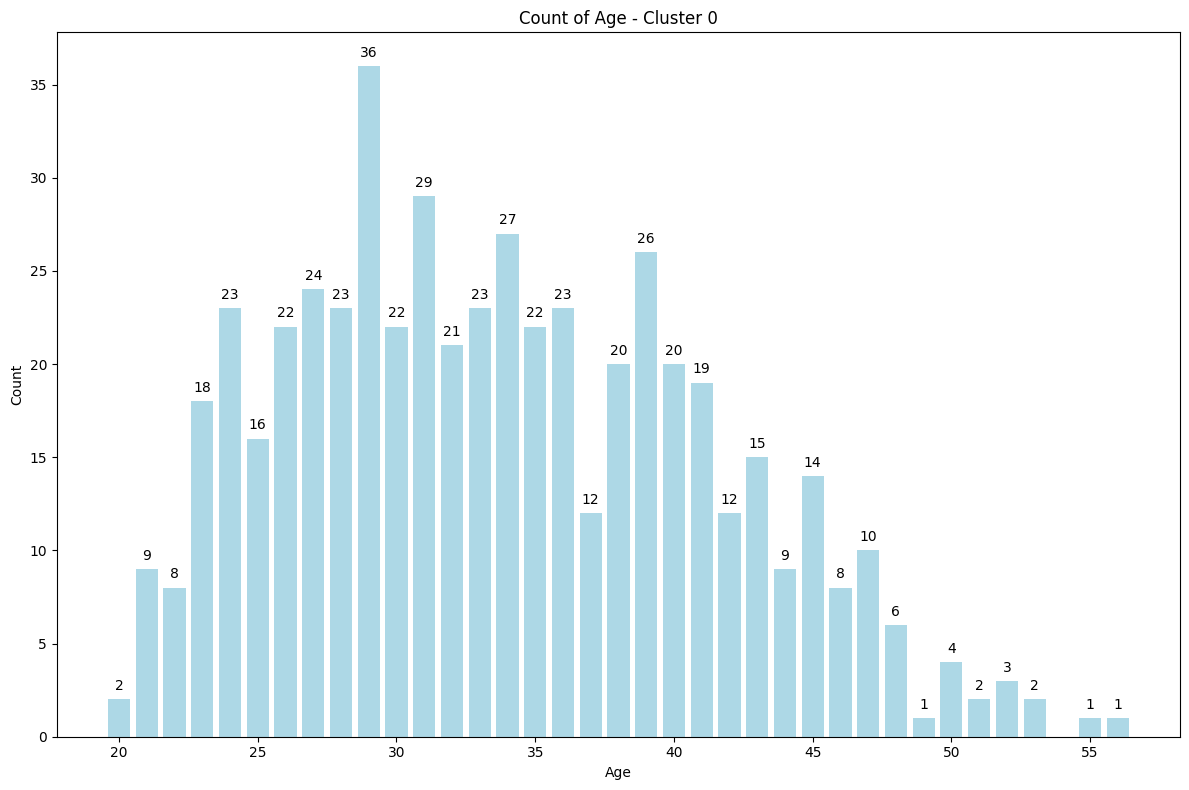

In [271]:
# Data for bar plot
age_c0 = cluster_0["Age"].value_counts()

# Extract labels (usia) dan sizes (jumlah)
labels = age_c0.index
sizes = age_c0.values

# Plot bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(labels, sizes, color="lightblue")
# Adding a label to each bar
for bar, size in zip(bars, sizes):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, round(size, 2), ha='center')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Count of Age - Cluster 0")

plt.tight_layout()  # To ensure subplots do not overlap
plt.show()

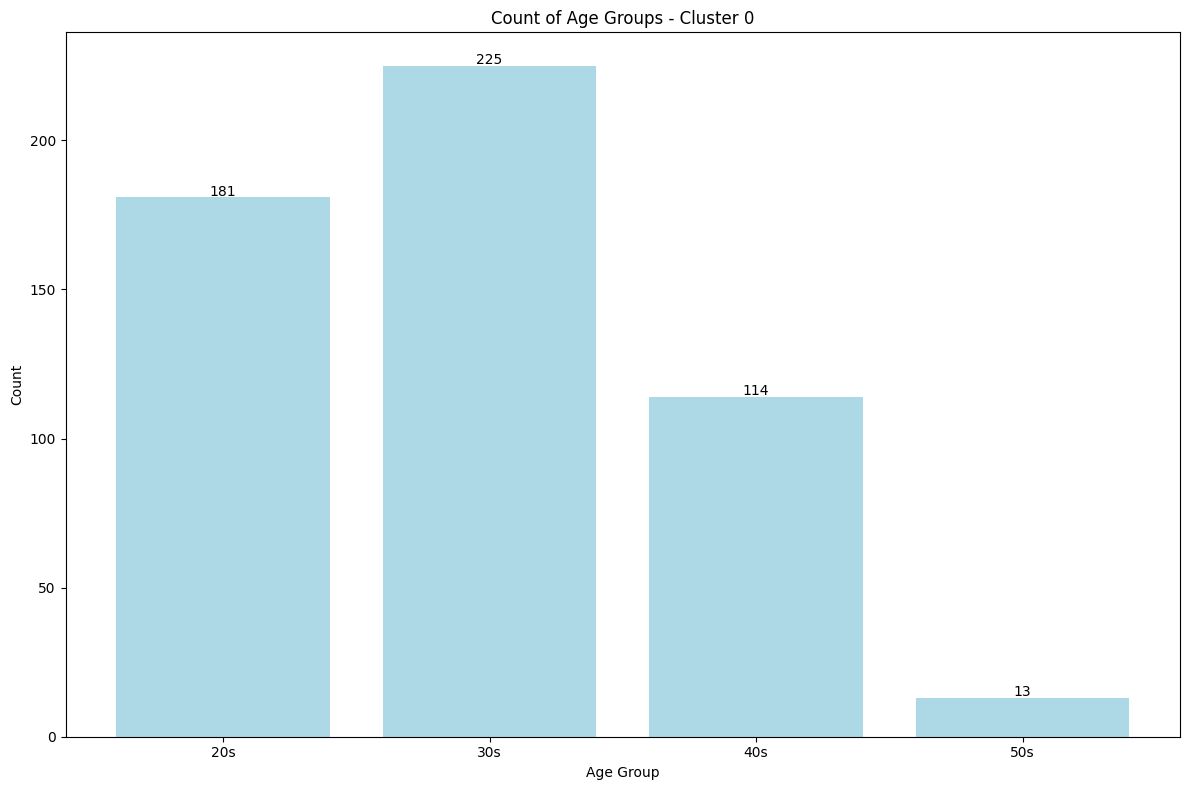

In [277]:
# Data for bar plot
age_c0 = cluster_0["Age"].value_counts()

# Extract labels (usia) dan sizes (jumlah)
labels = age_c0.index
sizes = age_c0.values

# Create a DataFrame from the data
age_df = pd.DataFrame({'Age': labels, 'Count': sizes})

# Group ages into bins (20s, 30s, 40s, 50s)
bins = [20, 30, 40, 50, 100]  # Define the age bins
labels = ['20s', '30s', '40s', '50s']  # Labels for the bins
age_df['Age Group'] = pd.cut(age_df['Age'], bins=bins, labels=labels, right=False)

# Group by age group and sum the counts
grouped_age_0 = age_df.groupby('Age Group')['Count'].sum().reset_index()

# Plot bar chart for age groups
plt.figure(figsize=(12, 8))
bars = plt.bar(grouped_age_0['Age Group'], grouped_age_0['Count'], color="lightblue")
# Adding a label to each bar
for bar, count in zip(bars, grouped_age_0['Count']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, count, ha='center')
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Count of Age Groups - Cluster 0")

plt.tight_layout()  # To ensure subplots do not overlap
plt.show()


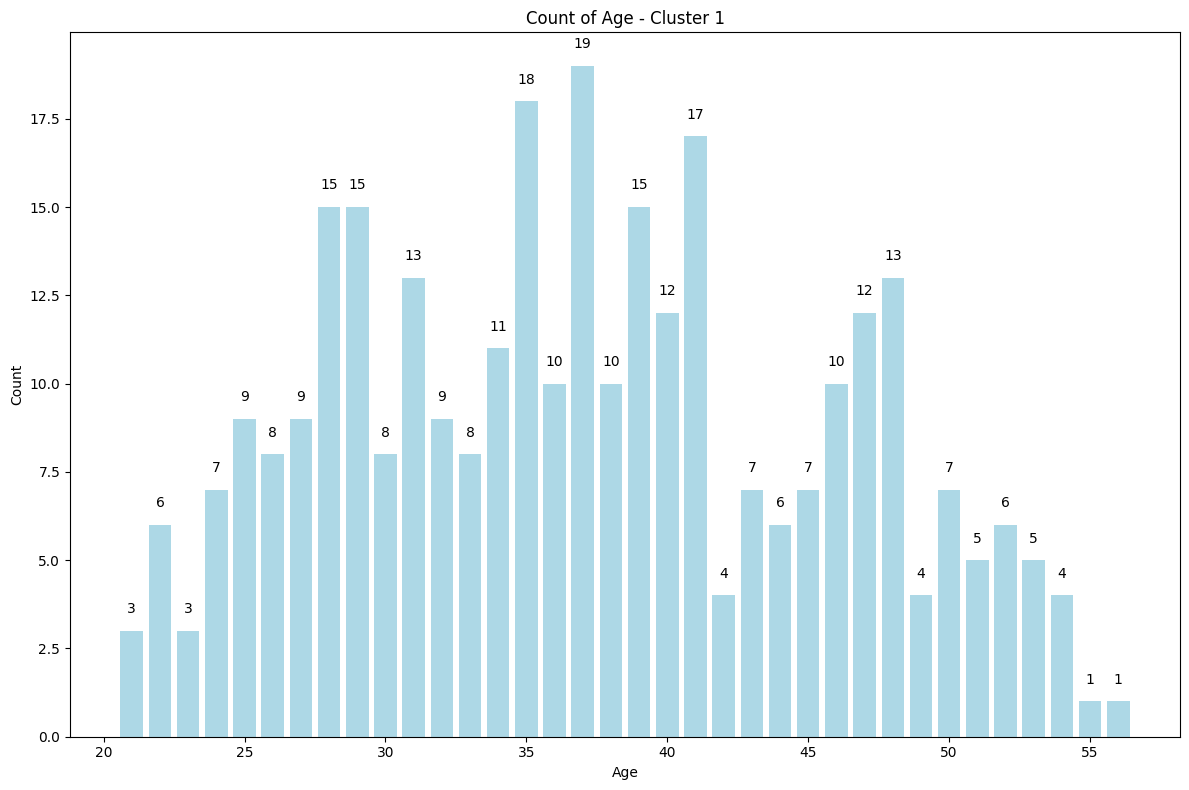

In [275]:
# Data for bar plot
age_c1 = cluster_1["Age"].value_counts()

# Extract labels (Age) dan sizes (Count)
labels = age_c1.index
sizes = age_c1.values

# Plot bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(labels, sizes, color="lightblue")
# Adding a label to each bar
for bar, size in zip(bars, sizes):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, round(size, 2), ha='center')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Count of Age - Cluster 1")

plt.tight_layout()  # To ensure subplots do not overlap
plt.show()

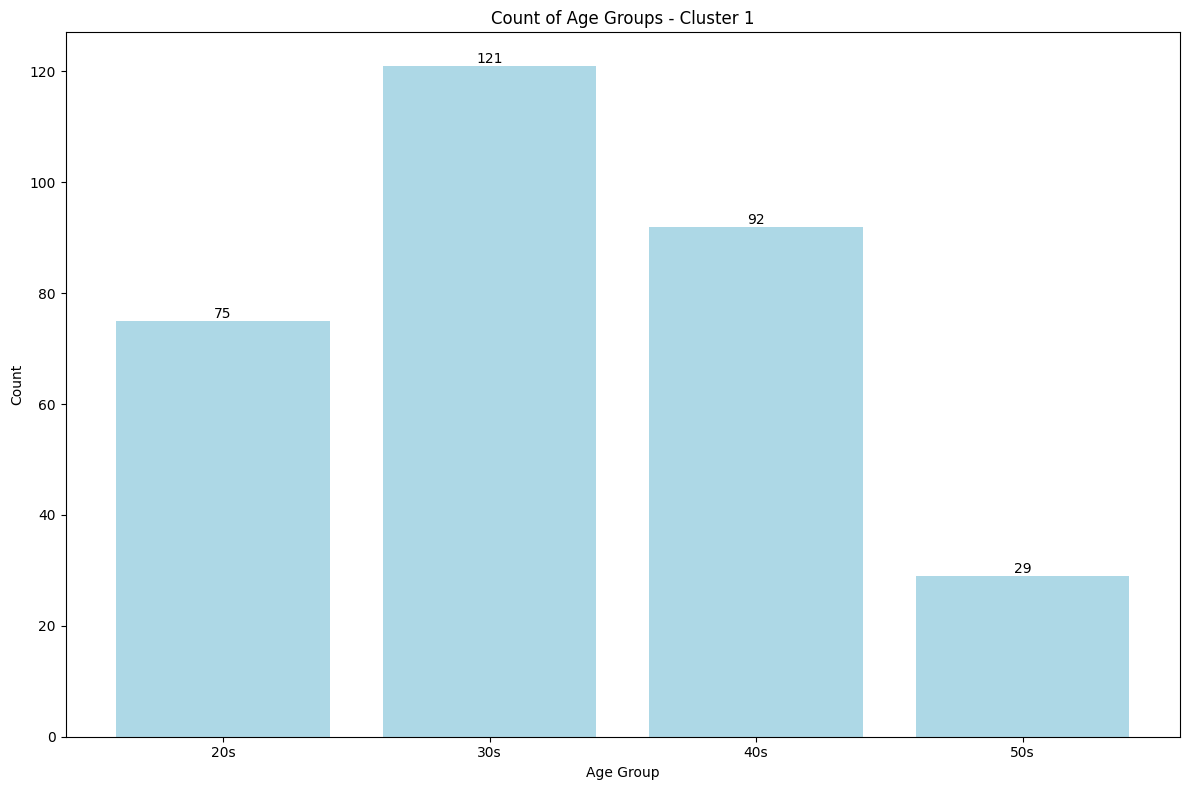

In [278]:
# Data for bar plot
age_c1 = cluster_1["Age"].value_counts()

# Extract labels (Age) dan sizes (Count)
labels = age_c1.index
sizes = age_c1.values

# Create a DataFrame from the data
age_df = pd.DataFrame({'Age': labels, 'Count': sizes})

# Group ages into bins (20s, 30s, 40s, 50s)
bins = [20, 30, 40, 50, 100]  # Define the age bins
labels = ['20s', '30s', '40s', '50s']  # Labels for the bins
age_df['Age Group'] = pd.cut(age_df['Age'], bins=bins, labels=labels, right=False)

# Group by age group and sum the counts
grouped_age_1 = age_df.groupby('Age Group')['Count'].sum().reset_index()

# Plot bar chart for age groups
plt.figure(figsize=(12, 8))
bars = plt.bar(grouped_age_1['Age Group'], grouped_age_1['Count'], color="lightblue")
# Adding a label to each bar
for bar, count in zip(bars, grouped_age_1['Count']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, count, ha='center')
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Count of Age Groups - Cluster 1")

plt.tight_layout()  # To ensure subplots do not overlap
plt.show()


Berdasarkan data hasil cluster, terlihat bahwa ada dua kelompok umur yang signifikan dalam populasi pelanggan Anda: 20-an dan 30-an. Untuk memberikan insight dan rekomendasi produk perbankan atau produk finansial, kita dapat mempertimbangkan preferensi dan kebutuhan berdasarkan kelompok usia ini.

**Cluster 0**:

Kelompok usia 20-an dan 30-an memiliki jumlah yang signifikan. Ini adalah kelompok yang mungkin baru memulai karir mereka dan mungkin memiliki kebutuhan finansial yang berbeda dari kelompok usia yang lebih tua.

Rekomendasi produk perbankan atau finansial untuk Cluster 0:

- **Rekening Tabungan Pemula**: Tawarkan rekening tabungan dengan biaya rendah atau tanpa biaya administrasi untuk menarik pelanggan muda. Berikan fitur digital yang memudahkan mereka untuk mengelola uang mereka secara online.

- **Kartu Kredit Belanja**: Kartu kredit dengan limit yang rendah dan insentif seperti cashback atau diskon di toko-toko populer dapat menarik perhatian mereka yang sering berbelanja online.

- **Investasi Pemula**: Tawarkan opsi investasi dengan risiko rendah, seperti reksa dana atau produk investasi berbasis robo-advisor, untuk membantu mereka memulai perjalanan investasi mereka.

**Cluster 1**:

Kelompok usia 20-an, 30-an, dan 40-an terdapat dalam jumlah yang cukup seimbang di cluster ini. Ini adalah kelompok yang mungkin sudah memiliki lebih banyak pengalaman finansial dan lebih stabil secara ekonomi dibandingkan dengan Cluster 0.

Rekomendasi produk perbankan atau finansial untuk Cluster 1:

- **Rekening Giro dengan Bunga**: Tawarkan rekening giro yang menghasilkan bunga agar pelanggan dapat memaksimalkan penghasilan mereka dari saldo giro mereka.

- **Kartu Kredit dengan Manfaat Tambahan**: Berikan kartu kredit dengan manfaat seperti poin reward, akses lounge bandara, atau asuransi perjalanan, sesuai dengan kebutuhan dan minat kelompok usia ini.

- **Investasi Diversifikasi**: Sarankan produk investasi yang lebih beragam, seperti saham, obligasi, dan properti, untuk membantu mereka mencapai tujuan finansial jangka panjang.

- **Asuransi Jiwa dan Kesehatan**: Mengingat kelompok usia ini mungkin memiliki tanggungan finansial, ajukan produk asuransi jiwa dan asuransi kesehatan yang sesuai untuk melindungi diri mereka dan keluarga mereka.

- **Perencanaan Keuangan Pribadi**: Tawarkan layanan perencanaan keuangan pribadi atau konsultasi finansial agar mereka dapat merencanakan keuangan mereka dengan lebih baik.

### XII.III. EDA for Business Purposed based on Average Income by Age

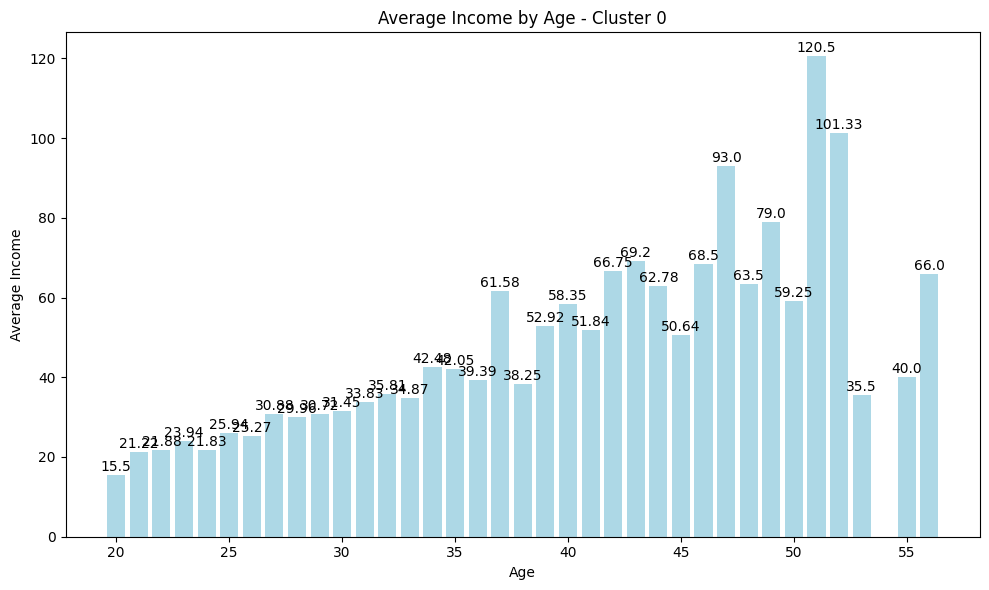

In [286]:
# Group the data by age and calculate the average income in each group
income_by_age_c0 = cluster_0.groupby('Age')['Income'].mean().reset_index()

# Sort data based age
income_by_age_c0 = income_by_age_c0.sort_values(by='Age')

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(income_by_age_c0['Age'], income_by_age_c0['Income'], color=colors)
plt.xlabel('Age')
plt.ylabel('Average Income')
plt.title('Average Income by Age - Cluster 0')

# Add labels above each bar
for bar, income in zip(bars, income_by_age_c0['Income']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, round(income, 2), ha='center')

# Display plot
plt.tight_layout()
plt.show()

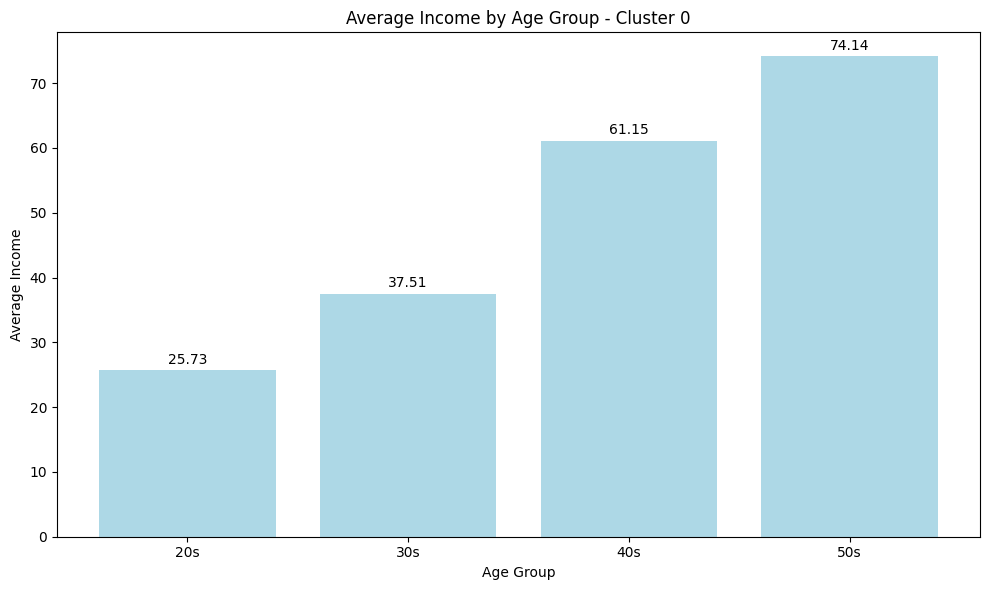

In [288]:
# Define the age groups
age_bins = [20, 29, 39, 49, 100]  # Define the age boundaries
age_labels = ['20s', '30s', '40s', '50s']  # Define labels for age groups

# Group the data by age groups and calculate the average income in each group
cluster_0['Age_Group'] = pd.cut(cluster_0['Age'], bins=age_bins, labels=age_labels, right=False)
income_by_age_group_c0 = cluster_0.groupby('Age_Group')['Income'].mean().reset_index()

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(income_by_age_group_c0['Age_Group'], income_by_age_group_c0['Income'], color=colors)
plt.xlabel('Age Group')
plt.ylabel('Average Income')
plt.title('Average Income by Age Group - Cluster 0')

# Add labels above each bar
for bar, income in zip(bars, income_by_age_group_c0['Income']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, round(income, 2), ha='center')

# Display plot
plt.tight_layout()
plt.show()


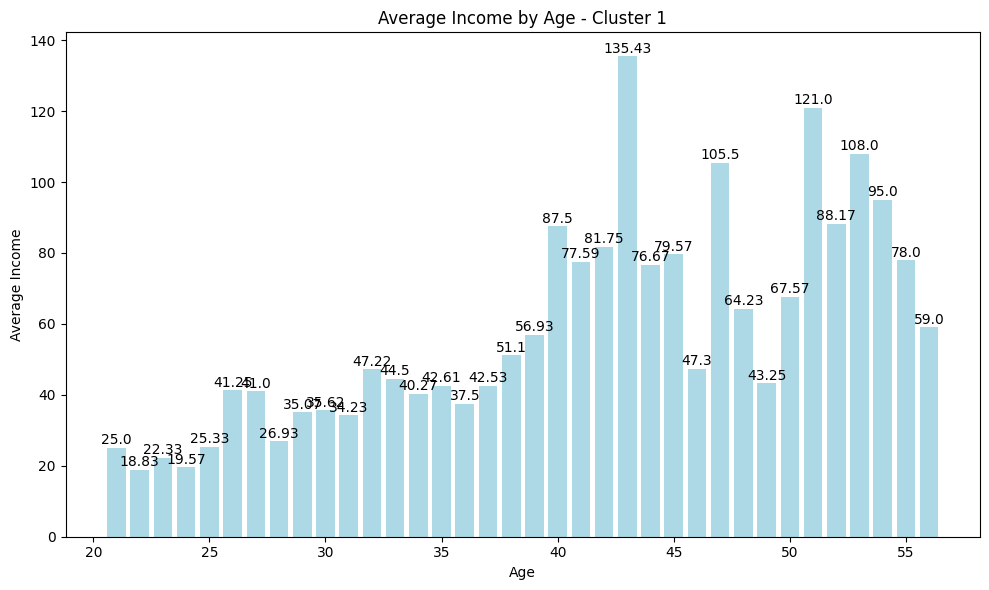

In [287]:
# Group the data by age and calculate the average income in each group
income_by_age_c1 = cluster_1.groupby('Age')['Income'].mean().reset_index()

# Sort data based age
income_by_age_c1 = income_by_age_c1.sort_values(by='Age')

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(income_by_age_c1['Age'], income_by_age_c1['Income'], color=colors)
plt.xlabel('Age')
plt.ylabel('Average Income')
plt.title('Average Income by Age - Cluster 1')

# Add labels above each bar
for bar, income in zip(bars, income_by_age_c1['Income']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, round(income, 2), ha='center')

# Display plot
plt.tight_layout()
plt.show()

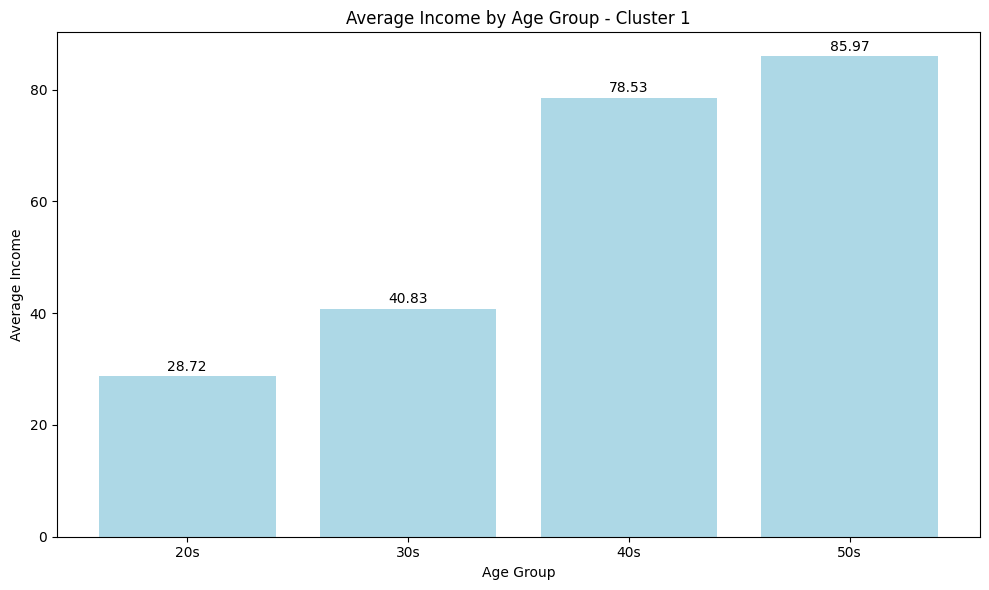

In [289]:
# Define the age groups
age_bins = [20, 29, 39, 49, 100]  # Define the age boundaries
age_labels = ['20s', '30s', '40s', '50s']  # Define labels for age groups

# Group the data by age groups and calculate the average income in each group
cluster_1['Age_Group'] = pd.cut(cluster_1['Age'], bins=age_bins, labels=age_labels, right=False)
income_by_age_group_c1 = cluster_1.groupby('Age_Group')['Income'].mean().reset_index()

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(income_by_age_group_c1['Age_Group'], income_by_age_group_c1['Income'], color=colors)
plt.xlabel('Age Group')
plt.ylabel('Average Income')
plt.title('Average Income by Age Group - Cluster 1')

# Add labels above each bar
for bar, income in zip(bars, income_by_age_group_c1['Income']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, round(income, 2), ha='center')

# Display plot
plt.tight_layout()
plt.show()


Berdasarkan data hasil cluster, terlihat bahwa ada perbedaan pendapatan antara kelompok usia yang berbeda. Untuk memberikan insight dan rekomendasi produk perbankan atau produk finansial, kita dapat mempertimbangkan preferensi dan kebutuhan berdasarkan kelompok usia dan tingkat pendapatan mereka.

**Cluster 0**:

Kelompok usia 20-an hingga 50-an cenderung memiliki tingkat pendapatan yang lebih rendah dibandingkan dengan Cluster 1. Ini menunjukkan bahwa mereka mungkin memiliki prioritas dan kebutuhan finansial yang berbeda.

Rekomendasi produk perbankan atau finansial untuk Cluster 0:

- **Rekening Tabungan Unggulan**: Tawarkan rekening tabungan dengan bunga yang kompetitif untuk membantu mereka mengoptimalkan pendapatan mereka dari tabungan mereka.

- **Kredit Konsumen Terjangkau**: Produk kredit pribadi dengan suku bunga yang rendah dan jangka waktu yang fleksibel dapat membantu mereka mengatasi kebutuhan finansial sehari-hari.

- **Program Pendidikan Keuangan**: Sediakan program edukasi keuangan yang membantu mereka meningkatkan pemahaman mereka tentang pengelolaan uang dan investasi yang cerdas.

**Cluster 1**:

Kelompok usia 20-an hingga 50-an dalam Cluster 1 memiliki tingkat pendapatan yang lebih tinggi. Ini menunjukkan bahwa mereka mungkin memiliki kemampuan finansial yang lebih besar untuk berinvestasi dan mengelola keuangan mereka dengan cara yang lebih kompleks.

Rekomendasi produk perbankan atau finansial untuk Cluster 1:

- **Portofolio Investasi Diversifikasi**: Sarankan produk investasi yang lebih beragam, seperti saham, obligasi, reksa dana, dan investasi real estat, untuk membantu mereka mencapai tujuan finansial jangka panjang.

- **Manajemen Kekayaan Pribadi**: Tawarkan layanan manajemen kekayaan pribadi yang mencakup perencanaan pajak, pengelolaan portofolio investasi, dan perencanaan warisan.

- **Kartu Kredit Premium**: Berikan kartu kredit premium dengan manfaat tambahan seperti akses ke lounge bandara, insuransi perjalanan, dan poin reward yang dapat ditebus.

- **Produk Asuransi yang Komprehensif**: Sarankan produk asuransi yang mencakup asuransi jiwa, asuransi kesehatan, dan perlindungan aset untuk melindungi kekayaan mereka.

- **Konsultasi Keuangan Pribadi**: Sediakan layanan konsultasi keuangan pribadi untuk membantu mereka merencanakan investasi dan strategi keuangan yang lebih kompleks.

### XII.IV. EDA for Business Purposed based on Average Card Debt by Age

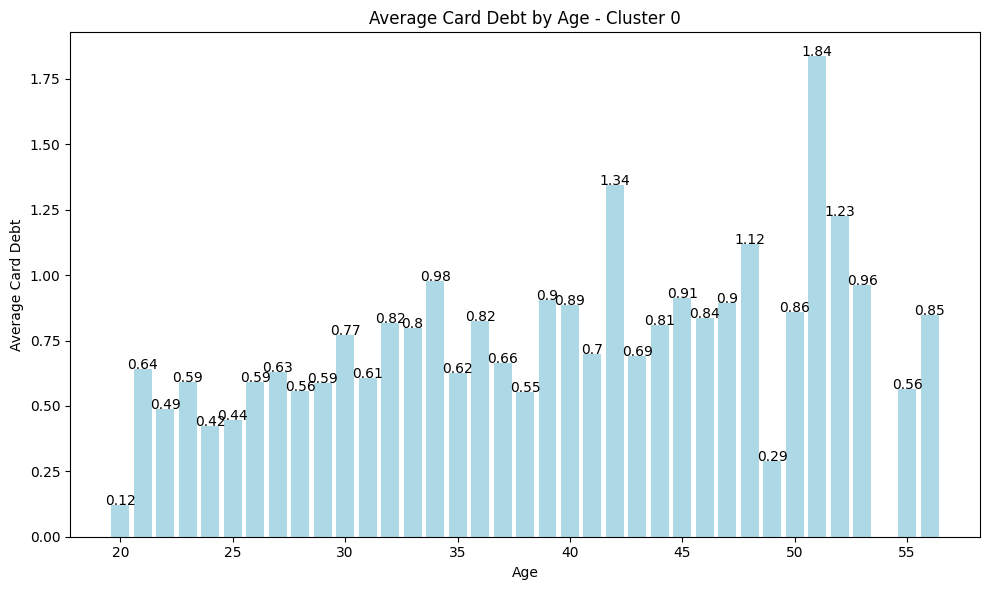

In [294]:
# Group the data by age and calculate the average Card Debt in each group
carddebt_by_age_c0 = cluster_0.groupby('Age')['Card Debt'].mean().reset_index()

# Sort data based age
carddebt_by_age_c0 = carddebt_by_age_c0.sort_values(by='Age')

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(carddebt_by_age_c0['Age'], carddebt_by_age_c0['Card Debt'], color=colors)
plt.xlabel('Age')
plt.ylabel('Average Card Debt')
plt.title('Average Card Debt by Age - Cluster 0')

# Add labels above each bar
for bar, carddebt in zip(bars, carddebt_by_age_c0['Card Debt']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), round(carddebt, 2), ha='center')

# Display plot
plt.tight_layout()
plt.show()

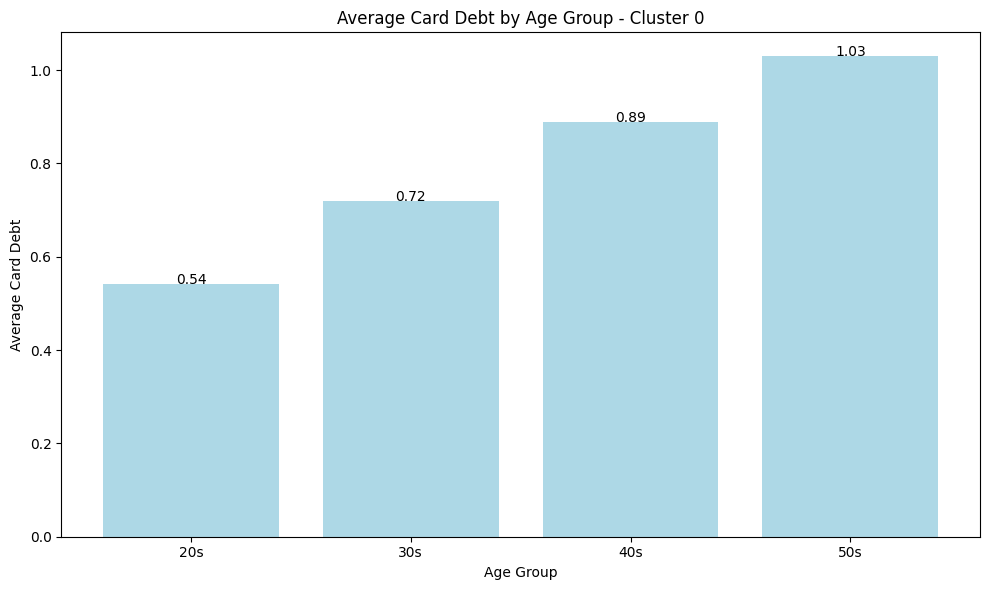

In [295]:
# Define the age groups
age_bins = [20, 29, 39, 49, 100]  # Define the age boundaries
age_labels = ['20s', '30s', '40s', '50s']  # Define labels for age groups

# Group the data by age groups and calculate the average card debt in each group
cluster_0['Age_Group'] = pd.cut(cluster_0['Age'], bins=age_bins, labels=age_labels, right=False)
carddebt_by_age_group_c0 = cluster_0.groupby('Age_Group')['Card Debt'].mean().reset_index()

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(carddebt_by_age_group_c0['Age_Group'], carddebt_by_age_group_c0['Card Debt'], color=colors)
plt.xlabel('Age Group')
plt.ylabel('Average Card Debt')
plt.title('Average Card Debt by Age Group - Cluster 0')

# Add labels above each bar
for bar, carddebt in zip(bars, carddebt_by_age_group_c0['Card Debt']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), round(carddebt, 2), ha='center')

# Display plot
plt.tight_layout()
plt.show()


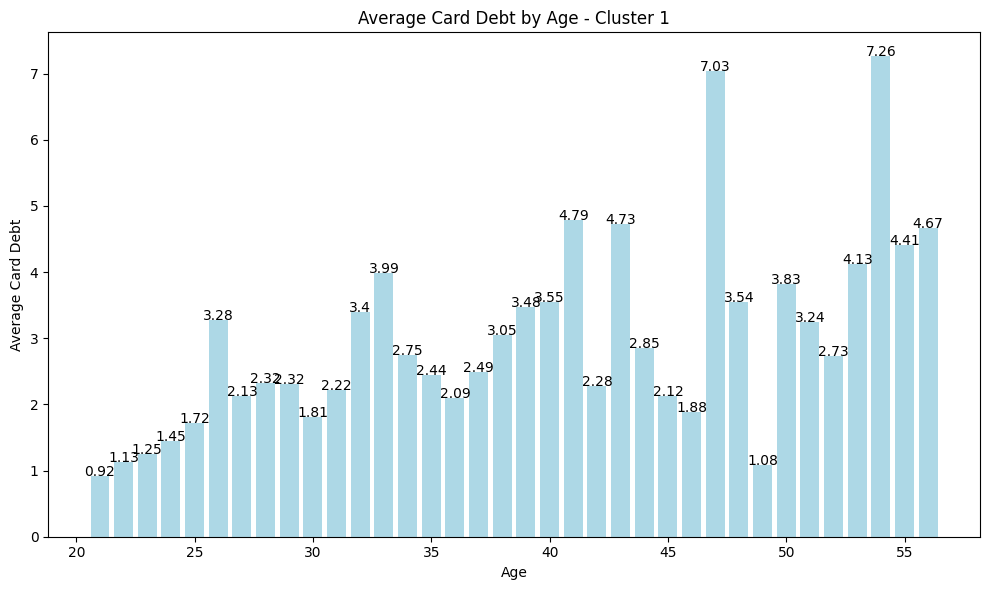

In [296]:
# Group the data by age and calculate the average Card Debt in each group
carddebt_by_age_c1 = cluster_1.groupby('Age')['Card Debt'].mean().reset_index()

# Sort data based age
carddebt_by_age_c1 = carddebt_by_age_c1.sort_values(by='Age')

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(carddebt_by_age_c1['Age'], carddebt_by_age_c1['Card Debt'], color=colors)
plt.xlabel('Age')
plt.ylabel('Average Card Debt')
plt.title('Average Card Debt by Age - Cluster 1')

# Add labels above each bar
for bar, carddebt in zip(bars, carddebt_by_age_c1['Card Debt']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), round(carddebt, 2), ha='center')

# Display plot
plt.tight_layout()
plt.show()

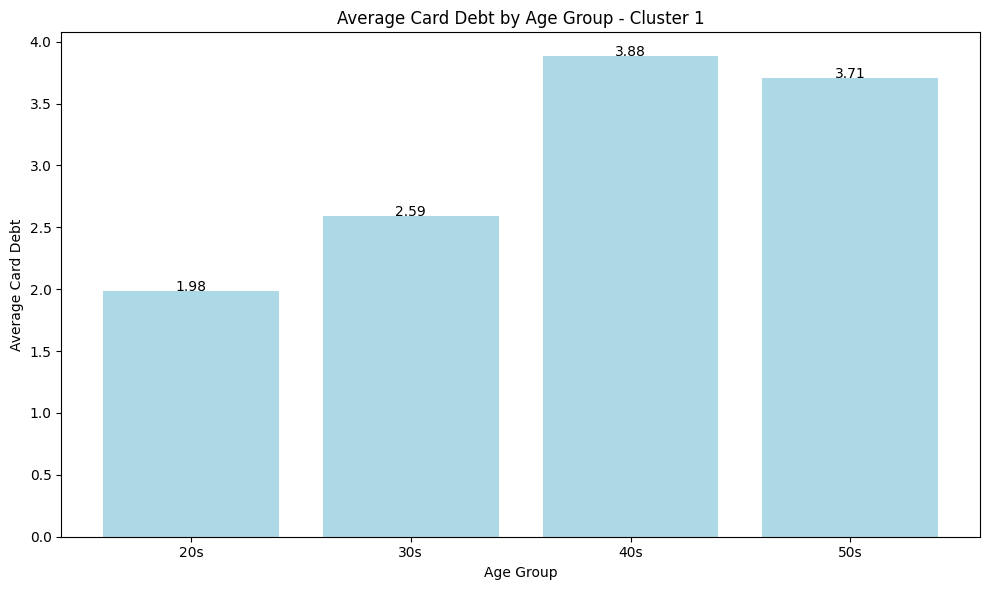

In [297]:
# Define the age groups
age_bins = [20, 29, 39, 49, 100]  # Define the age boundaries
age_labels = ['20s', '30s', '40s', '50s']  # Define labels for age groups

# Group the data by age groups and calculate the average card debt in each group
cluster_1['Age_Group'] = pd.cut(cluster_1['Age'], bins=age_bins, labels=age_labels, right=False)
carddebt_by_age_group_c1 = cluster_1.groupby('Age_Group')['Card Debt'].mean().reset_index()

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(carddebt_by_age_group_c1['Age_Group'], carddebt_by_age_group_c1['Card Debt'], color=colors)
plt.xlabel('Age Group')
plt.ylabel('Average Card Debt')
plt.title('Average Card Debt by Age Group - Cluster 1')

# Add labels above each bar
for bar, carddebt in zip(bars, carddebt_by_age_group_c1['Card Debt']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), round(carddebt, 2), ha='center')

# Display plot
plt.tight_layout()
plt.show()


Berdasarkan data hasil cluster, terdapat perbedaan yang signifikan dalam rata-rata utang kartu kredit antara Cluster 0 dan Cluster 1, terutama dengan pertimbangan kelompok usia. Untuk memberikan insight dan rekomendasi produk perbankan atau produk finansial, kita akan mempertimbangkan perbedaan ini:

**Cluster 0**:

Kelompok usia 20-an hingga 50-an dalam Cluster 0 memiliki rata-rata utang kartu kredit yang lebih rendah dibandingkan dengan Cluster 1.
Ini menunjukkan bahwa anggota dalam cluster ini cenderung memiliki tanggungan kartu kredit yang lebih rendah dan mungkin lebih berhati-hati dalam mengelola utang kartu kredit mereka.

Rekomendasi produk perbankan atau finansial untuk Cluster 0:

- **Kartu Kredit dengan Batas Rendah**: Tawarkan kartu kredit dengan limit yang rendah atau batas kredit yang lebih terkontrol untuk memungkinkan mereka mengelola utang dengan lebih baik.

- **Program Pengurangan Utang**: Sediakan program atau produk yang membantu mereka mengurangi utang kartu kredit dengan lebih efektif, seperti pinjaman konsolidasi atau transfer saldo dengan suku bunga rendah.

- **Program Edukasi Keuangan**: Lakukan program edukasi keuangan yang membantu mereka memahami cara mengelola kartu kredit dengan bijak dan menghindari jebakan utang yang tinggi.

**Cluster 1**:

Kelompok usia 20-an hingga 50-an dalam Cluster 1 memiliki rata-rata utang kartu kredit yang lebih tinggi dibandingkan dengan Cluster 0.
Ini menunjukkan bahwa anggota dalam cluster ini mungkin memiliki tanggungan kartu kredit yang lebih besar dan mungkin perlu solusi yang berbeda untuk mengelola utang mereka.

Rekomendasi produk perbankan atau finansial untuk Cluster 1:

- **Kredit Kartu dengan Manfaat Rewards**: Tawarkan kartu kredit dengan manfaat rewards seperti poin atau cashback untuk memberikan insentif kepada mereka yang memiliki utang kartu kredit yang lebih besar.

- **Layanan Konsultasi Keuangan**: Sediakan layanan konsultasi keuangan pribadi untuk membantu mereka merencanakan strategi pengurangan utang yang efektif.

- **Pinjaman Konsolidasi Utang**: Tawarkan produk pinjaman konsolidasi utang dengan suku bunga yang kompetitif untuk membantu mereka menggabungkan utang kartu kredit mereka menjadi satu pinjaman yang lebih mudah dikelola.

- **Program Pengelolaan Utang**: Sediakan alat dan program pengelolaan utang yang membantu mereka melacak dan mengatur utang mereka dengan lebih efisien.

Penting untuk selalu memahami tingkat utang dan preferensi individu dalam mengelola keuangan mereka. Selain itu, memberikan edukasi keuangan yang relevan dan layanan konsultasi dapat membantu anggota dari kedua cluster mengelola utang kartu kredit mereka dengan lebih baik dan mencapai kebebasan finansial.

### XII.V. EDA for Business Purposed based on Average Other Debt by Age

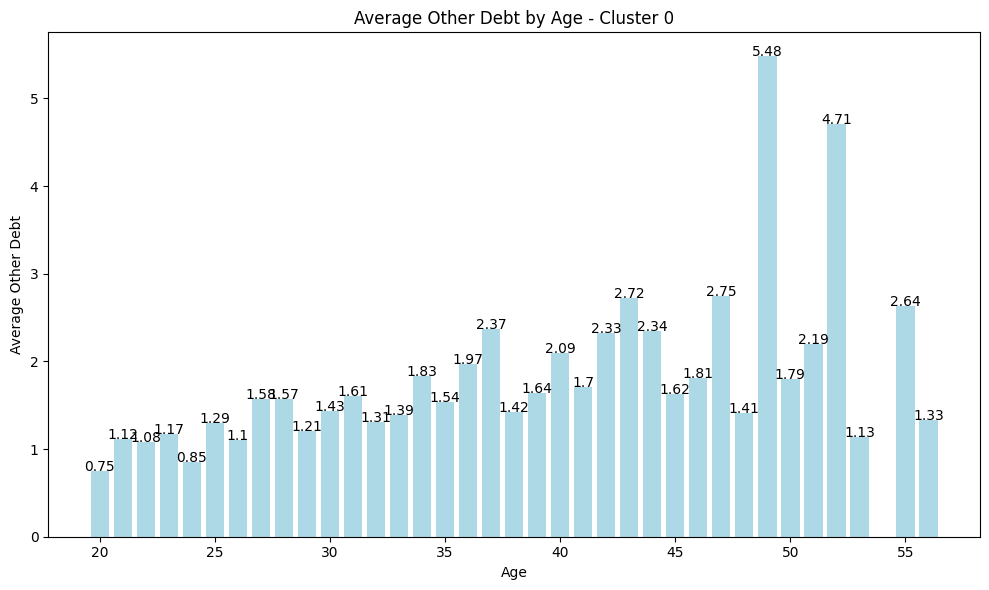

In [299]:
# Group the data by age and calculate the average Other Debt in each group
otherdebt_by_age_c0 = cluster_0.groupby('Age')['Other Debt'].mean().reset_index()

# Sort data based age
otherdebt_by_age_c0 = otherdebt_by_age_c0.sort_values(by='Age')

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(otherdebt_by_age_c0['Age'], otherdebt_by_age_c0['Other Debt'], color=colors)
plt.xlabel('Age')
plt.ylabel('Average Other Debt')
plt.title('Average Other Debt by Age - Cluster 0')

# Add labels above each bar
for bar, otherdebt in zip(bars, otherdebt_by_age_c0['Other Debt']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), round(otherdebt, 2), ha='center')

# Display plot
plt.tight_layout()
plt.show()

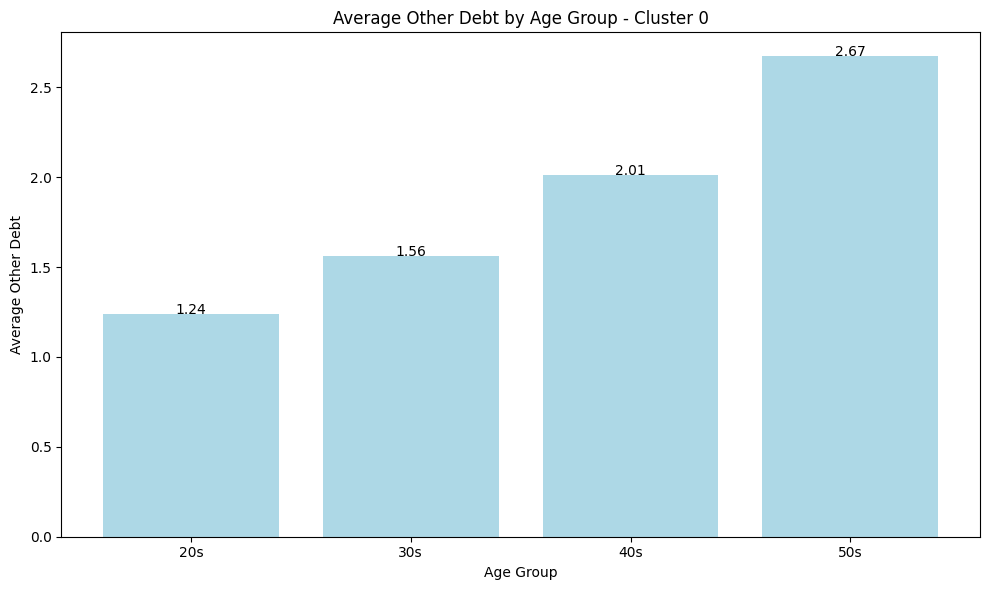

In [300]:
# Define the age groups
age_bins = [20, 29, 39, 49, 100]  # Define the age boundaries
age_labels = ['20s', '30s', '40s', '50s']  # Define labels for age groups

# Group the data by age groups and calculate the average card debt in each group
cluster_0['Age_Group'] = pd.cut(cluster_0['Age'], bins=age_bins, labels=age_labels, right=False)
otherdebt_by_age_group_c0 = cluster_0.groupby('Age_Group')['Other Debt'].mean().reset_index()

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(otherdebt_by_age_group_c0['Age_Group'], otherdebt_by_age_group_c0['Other Debt'], color=colors)
plt.xlabel('Age Group')
plt.ylabel('Average Other Debt')
plt.title('Average Other Debt by Age Group - Cluster 0')

# Add labels above each bar
for bar, otherdebt in zip(bars, otherdebt_by_age_group_c0['Other Debt']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), round(otherdebt, 2), ha='center')

# Display plot
plt.tight_layout()
plt.show()


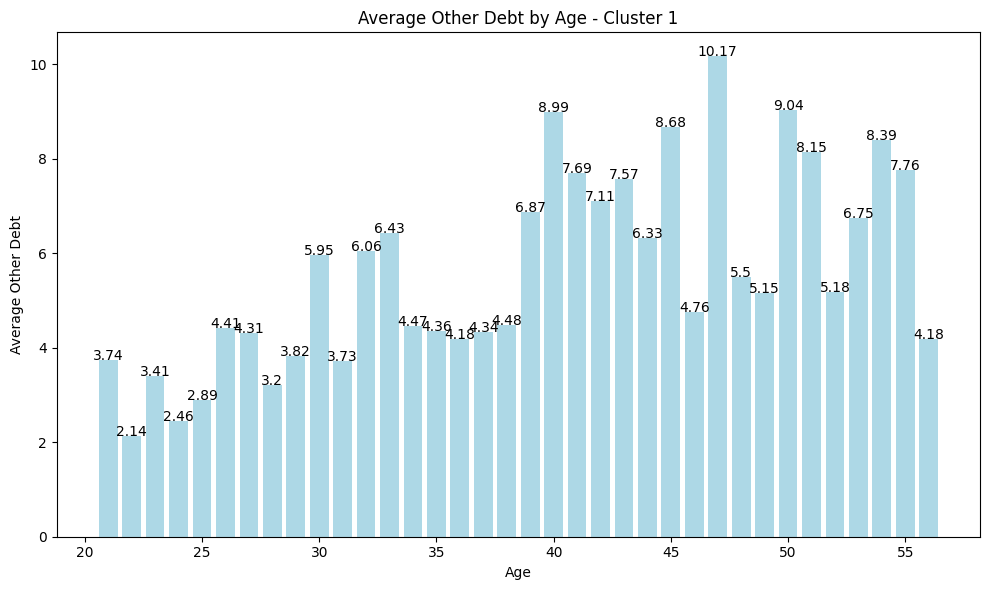

In [301]:
# Group the data by age and calculate the average Other Debt in each group
otherdebt_by_age_c1 = cluster_1.groupby('Age')['Other Debt'].mean().reset_index()

# Sort data based age
otherdebt_by_age_c1 = otherdebt_by_age_c1.sort_values(by='Age')

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(otherdebt_by_age_c1['Age'], otherdebt_by_age_c1['Other Debt'], color=colors)
plt.xlabel('Age')
plt.ylabel('Average Other Debt')
plt.title('Average Other Debt by Age - Cluster 1')

# Add labels above each bar
for bar, otherdebt in zip(bars, otherdebt_by_age_c1['Other Debt']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), round(otherdebt, 2), ha='center')

# Display plot
plt.tight_layout()
plt.show()

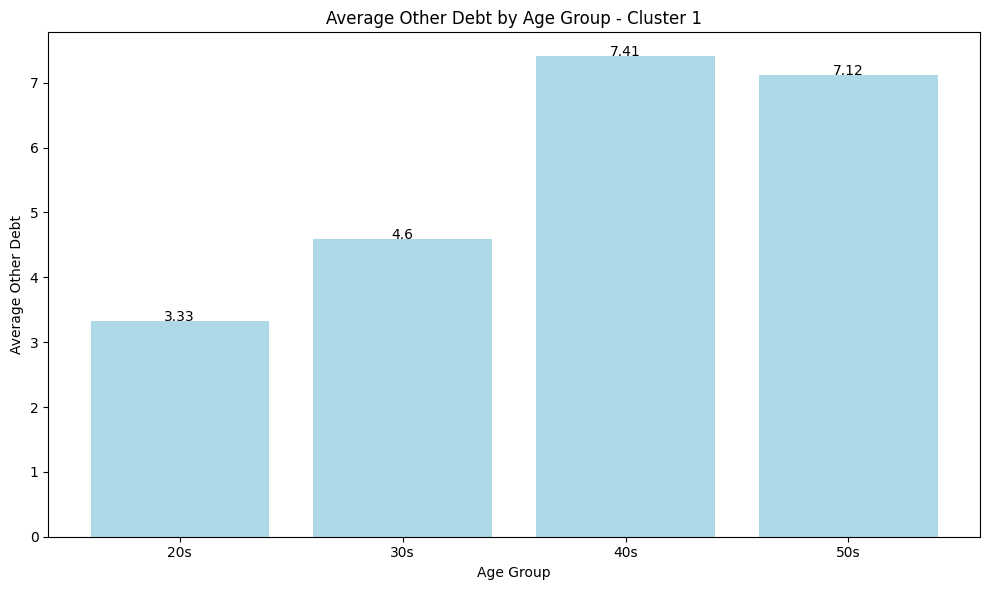

In [302]:
# Define the age groups
age_bins = [20, 29, 39, 49, 100]  # Define the age boundaries
age_labels = ['20s', '30s', '40s', '50s']  # Define labels for age groups

# Group the data by age groups and calculate the average card debt in each group
cluster_1['Age_Group'] = pd.cut(cluster_1['Age'], bins=age_bins, labels=age_labels, right=False)
otherdebt_by_age_group_c1 = cluster_1.groupby('Age_Group')['Other Debt'].mean().reset_index()

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(otherdebt_by_age_group_c1['Age_Group'], otherdebt_by_age_group_c1['Other Debt'], color=colors)
plt.xlabel('Age Group')
plt.ylabel('Average Other Debt')
plt.title('Average Other Debt by Age Group - Cluster 1')

# Add labels above each bar
for bar, otherdebt in zip(bars, otherdebt_by_age_group_c1['Other Debt']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), round(otherdebt, 2), ha='center')

# Display plot
plt.tight_layout()
plt.show()


Berdasarkan data hasil cluster, terlihat bahwa terdapat perbedaan signifikan dalam rata-rata utang lainnya (tidak termasuk utang kartu kredit) antara dua kelompok usia, yaitu Cluster 0 (20s hingga 50s) dan Cluster 1 (20s hingga 50s). Ini menunjukkan bahwa Cluster 1 memiliki rata-rata utang lainnya yang lebih tinggi daripada Cluster 0.

**Insight**:

- **Cluster 0**: Cluster ini memiliki rata-rata utang lainnya yang relatif rendah, dengan peningkatan seiring bertambahnya usia. Ini bisa mengindikasikan bahwa kelompok usia ini lebih berhati-hati dalam mengelola utang mereka atau memiliki kewajiban finansial yang lebih sedikit.

- **Cluster 1**: Cluster ini memiliki rata-rata utang lainnya yang signifikan lebih tinggi dibandingkan dengan Cluster 0, terutama pada kelompok usia 40s dan 50s. Hal ini mungkin menunjukkan bahwa anggota cluster ini memiliki lebih banyak kewajiban finansial atau lebih sering menggunakan utang lainnya untuk pembiayaan.

Rekomendasi Produk Perbankan atau Produk Finansial:

Berdasarkan perbedaan dalam rata-rata utang lainnya antara kedua cluster, berikut adalah beberapa rekomendasi produk perbankan atau produk finansial:

**Cluster 0**:

Karena anggota Cluster 0 memiliki rata-rata utang lainnya yang lebih rendah, rekomendasi produk dapat mencakup:

- **Kredit Pendidikan**: Tawarkan produk kredit pendidikan dengan suku bunga yang kompetitif, terutama untuk kelompok usia 20s yang mungkin sedang mengejar pendidikan tambahan.

- **Rekening Tabungan**: Promosikan rekening tabungan dengan bunga yang menguntungkan dan program tabungan untuk membantu mereka mengelola keuangan mereka dengan baik.

- **Konseling Keuangan**: Sediakan layanan konsultasi keuangan pribadi atau manajemen keuangan untuk membantu mereka merencanakan keuangan mereka lebih efektif.

**Cluster 1**:

Karena anggota Cluster 1 memiliki rata-rata utang lainnya yang lebih tinggi, rekomendasi produk dapat mencakup:

- **Konsolidasi Utang**: Tawarkan produk konsolidasi utang dengan suku bunga yang lebih rendah untuk membantu anggota cluster menggabungkan utang mereka dan mengurangi beban pembayaran utang.

- **Kredit dengan Suku Bunga Rendah**: Tawarkan produk kredit dengan suku bunga yang rendah untuk membantu mereka meminimalkan biaya pembiayaan utang tambahan.

- **Asuransi Perlindungan Utang**: Tawarkan asuransi perlindungan utang yang dapat membantu melindungi mereka dalam situasi yang tidak terduga, seperti kehilangan pekerjaan atau sakit serius.

- **Perencanaan Keuangan Pribadi**: Sediakan layanan perencanaan keuangan pribadi yang membantu mereka mengelola utang mereka dengan lebih baik dan merencanakan masa depan finansial yang lebih stabil.

Penting untuk selalu memahami situasi finansial individu dan menyediakan solusi yang sesuai dengan kebutuhan mereka. Selain itu, edukasi keuangan juga bisa menjadi bagian penting dari strategi produk dan layanan untuk membantu pelanggan mengelola utang mereka dengan bijak.

### XII.VI. EDA for Business Purposed based on Average Debt Income Ratio by Age

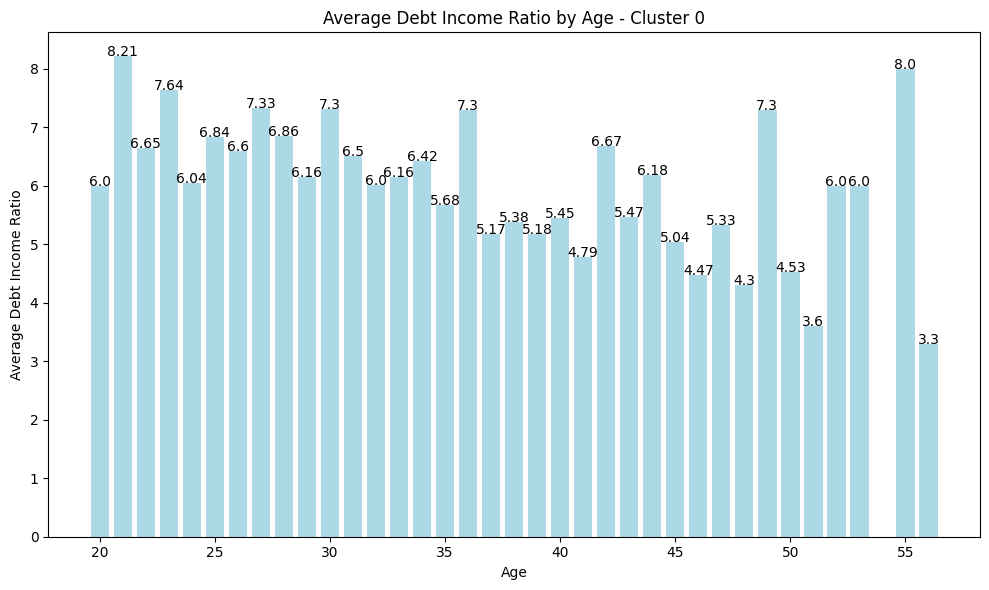

In [304]:
# Group the data by age and calculate the average Debt Income Ratio in each group
debtincomeratio_by_age_c0 = cluster_0.groupby('Age')['DebtIncomeRatio'].mean().reset_index()

# Sort data based age
debtincomeratio_by_age_c0 = debtincomeratio_by_age_c0.sort_values(by='Age')

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(debtincomeratio_by_age_c0['Age'], debtincomeratio_by_age_c0['DebtIncomeRatio'], color=colors)
plt.xlabel('Age')
plt.ylabel('Average Debt Income Ratio')
plt.title('Average Debt Income Ratio by Age - Cluster 0')

# Add labels above each bar
for bar, debtincomeratio in zip(bars, debtincomeratio_by_age_c0['DebtIncomeRatio']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), round(debtincomeratio, 2), ha='center')

# Display plot
plt.tight_layout()
plt.show()

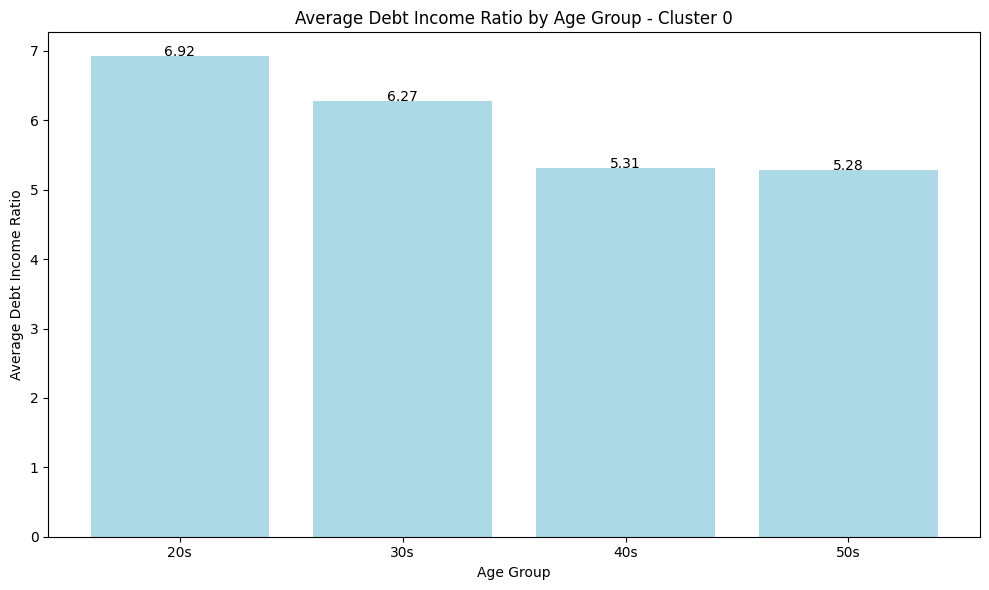

In [306]:
# Define the age groups
age_bins = [20, 29, 39, 49, 100]  # Define the age boundaries
age_labels = ['20s', '30s', '40s', '50s']  # Define labels for age groups

# Group the data by age groups and calculate the average card debt in each group
cluster_0['Age_Group'] = pd.cut(cluster_0['Age'], bins=age_bins, labels=age_labels, right=False)
debtincomeratio_by_age_group_c0 = cluster_0.groupby('Age_Group')['DebtIncomeRatio'].mean().reset_index()

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(debtincomeratio_by_age_group_c0['Age_Group'], debtincomeratio_by_age_group_c0['DebtIncomeRatio'], color=colors)
plt.xlabel('Age Group')
plt.ylabel('Average Debt Income Ratio')
plt.title('Average Debt Income Ratio by Age Group - Cluster 0')

# Add labels above each bar
for bar, debtincomeratio in zip(bars, debtincomeratio_by_age_group_c0['DebtIncomeRatio']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), round(debtincomeratio, 2), ha='center')

# Display plot
plt.tight_layout()
plt.show()


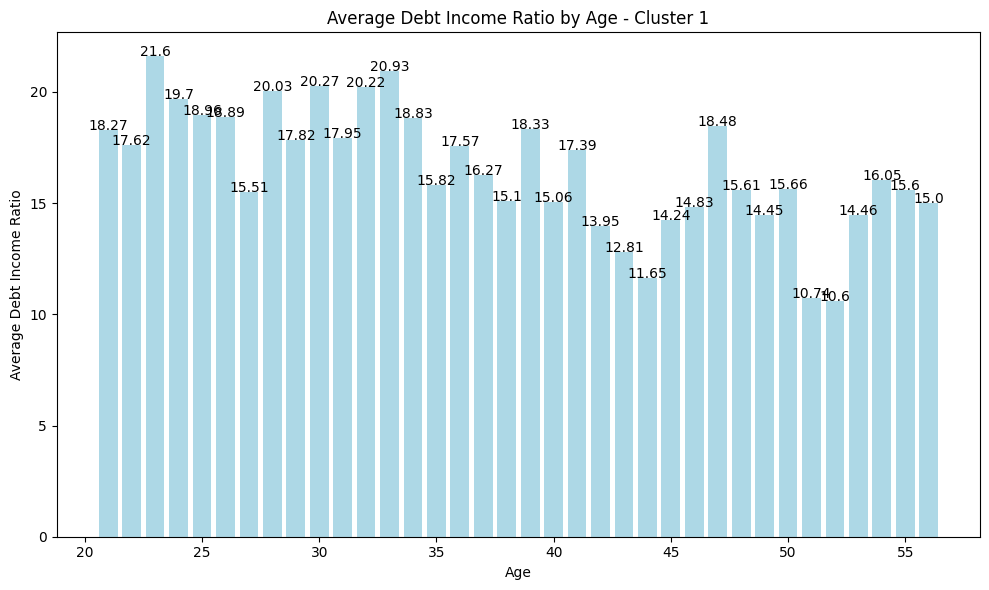

In [307]:
# Group the data by age and calculate the average Debt Income Ratio in each group
debtincomeratio_by_age_c1 = cluster_1.groupby('Age')['DebtIncomeRatio'].mean().reset_index()

# Sort data based age
debtincomeratio_by_age_c1 = debtincomeratio_by_age_c1.sort_values(by='Age')

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(debtincomeratio_by_age_c1['Age'], debtincomeratio_by_age_c1['DebtIncomeRatio'], color=colors)
plt.xlabel('Age')
plt.ylabel('Average Debt Income Ratio')
plt.title('Average Debt Income Ratio by Age - Cluster 1')

# Add labels above each bar
for bar, debtincomeratio in zip(bars, debtincomeratio_by_age_c1['DebtIncomeRatio']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), round(debtincomeratio, 2), ha='center')

# Display plot
plt.tight_layout()
plt.show()

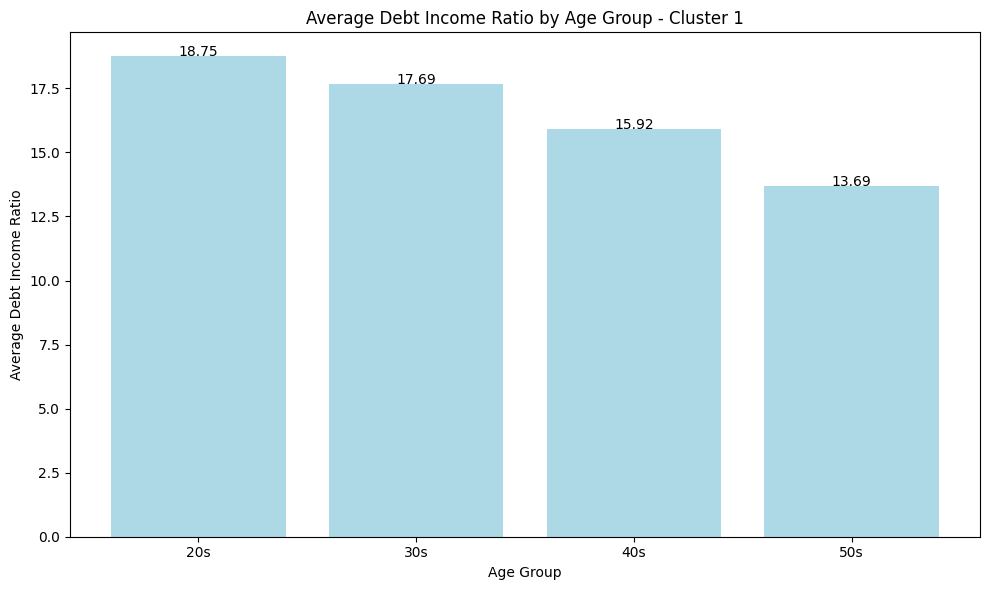

In [308]:
# Define the age groups
age_bins = [20, 29, 39, 49, 100]  # Define the age boundaries
age_labels = ['20s', '30s', '40s', '50s']  # Define labels for age groups

# Group the data by age groups and calculate the average card debt in each group
cluster_1['Age_Group'] = pd.cut(cluster_1['Age'], bins=age_bins, labels=age_labels, right=False)
debtincomeratio_by_age_group_c1 = cluster_1.groupby('Age_Group')['DebtIncomeRatio'].mean().reset_index()

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(debtincomeratio_by_age_group_c1['Age_Group'], debtincomeratio_by_age_group_c1['DebtIncomeRatio'], color=colors)
plt.xlabel('Age Group')
plt.ylabel('Average Debt Income Ratio')
plt.title('Average Debt Income Ratio by Age Group - Cluster 1')

# Add labels above each bar
for bar, debtincomeratio in zip(bars, debtincomeratio_by_age_group_c1['DebtIncomeRatio']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), round(debtincomeratio, 2), ha='center')

# Display plot
plt.tight_layout()
plt.show()


Berdasarkan data hasil cluster, terlihat bahwa ada perbedaan dalam rasio utang terhadap pendapatan (Debt-Income Ratio) antara dua kelompok usia yang berbeda, yaitu Cluster 0 dan Cluster 1. Rasio utang yang lebih tinggi mengindikasikan bahwa anggota Cluster 1 mungkin memiliki beban utang yang lebih besar dibandingkan dengan anggota Cluster 0. Berikut adalah insight dan rekomendasi berdasarkan data tersebut:

**Cluster 0**:

- Anggota dalam Cluster 0 memiliki rasio utang terhadap pendapatan yang lebih rendah, dengan rata-rata di bawah 7. Ini menunjukkan bahwa mereka memiliki beban utang yang lebih ringan dibandingkan dengan Cluster 1.
- Cluster ini terdiri dari berbagai kelompok usia, mulai dari 20-an hingga 50-an.

Rekomendasi produk perbankan atau produk finansial untuk Cluster 0:

- **Konsolidasi Utang**: Meskipun rasio utang mereka rendah, Anda dapat menawarkan produk konsolidasi utang yang membantu mereka menggabungkan utang mereka ke dalam satu pinjaman dengan suku bunga yang lebih rendah, sehingga mereka dapat menghemat uang.

- **Tabungan** dan **Investasi**: Dorong mereka untuk memanfaatkan pendapatan mereka yang lebih tinggi dengan menawarkan produk tabungan atau investasi yang membantu mereka mengembangkan kekayaan mereka.

- **Perencanaan Keuangan**: Sediakan layanan perencanaan keuangan pribadi untuk membantu mereka merencanakan investasi jangka panjang dan pensiun yang lebih baik.

**Cluster 1**:

- Anggota dalam Cluster 1 memiliki rasio utang terhadap pendapatan yang jauh lebih tinggi, dengan rata-rata di atas 13. Ini menunjukkan bahwa mereka memiliki beban utang yang signifikan.
- Cluster ini juga mencakup berbagai kelompok usia, tetapi cenderung memiliki rasio utang yang tinggi di semua kelompok usia.

Rekomendasi produk perbankan atau produk finansial untuk Cluster 1:

- **Manajemen Utang**: Tawarkan produk dan layanan yang membantu mereka mengelola utang mereka dengan lebih efektif, seperti konsultasi keuangan atau program manajemen utang.

- **Konsolidasi Utang**: Rekomendasikan produk konsolidasi utang yang dapat membantu mereka menggabungkan utang mereka dengan suku bunga yang lebih rendah untuk mengurangi beban utang mereka.

- **Asuransi Perlindungan**: Rekomendasikan produk asuransi perlindungan pendapatan atau asuransi kredit yang dapat melindungi mereka dalam situasi darurat dan membantu mereka melunasi utang mereka jika terjadi hal yang tidak terduga.

- **Program Edukasi Keuangan**: Sediakan program edukasi keuangan khusus untuk anggota Cluster 1 agar mereka dapat memahami cara mengelola utang mereka dengan lebih baik dan menghindari penumpukan utang yang lebih besar.

- **Investasi Pemulihan Utang**: Tawarkan produk investasi yang dapat membantu mereka mendapatkan pendapatan tambahan untuk membayar utang mereka lebih cepat.

Penting untuk mengingat bahwa utang adalah tanggungan finansial yang serius, dan rekomendasi produk harus disesuaikan dengan situasi individu dan tingkat keterampilan keuangan mereka. Selalu penting untuk memastikan bahwa pelanggan memiliki pemahaman yang baik tentang implikasi utang dan bagaimana mengelolanya dengan bijak.

## XIII. Conclusion

### XIII.I. EDA Conclusion

Business insights for the banking and financial industry based on the EDA (Exploratory Data Analysis) results that have been presented are:

**The Importance of Education in Financial Management**:

- Data shows that education has a significant effect on income and the likelihood of credit default. Individuals with higher levels of education tend to have higher incomes and are less likely to default.
- The banking business and financial industry can play a role in providing financial education to their customers. This can help customers make better financial decisions and manage their debt better.

**Customer Segmentation Based on Education**:

- Knowledge of the relationship between education and financial behavior can help the banking and financial industry in customer segmentation.
- Banks can design products and services that better suit customer needs and profiles based on their education level.

**Importance of Age Analysis in Product Offerings**:

- Age analysis results show that income and debt tend to vary with age.
Banking companies can use these insights to tailor their product and service offerings to customers' life stages, such as mortgages for young families or retirement products for older customers.

**Age Based Debt Management**:

- Age can be used as a factor in risk management and credit assessment.
- Knowledge of how debt behavior changes with age can help financial companies make better decisions in extending credit or determining interest rates.

**Default Risk Management**:

- Knowledge of the factors that influence default risk, such as education and age, can help financial companies in developing better default risk prediction models.
- It can help in reducing credit risk and managing loan portfolios more effectively.

**Portfolio Management with a Data-Driven Approach**:

- The data that has been analyzed can be used to manage loan portfolios better. This can help financial companies in minimizing credit risk and optimizing profitability.

**Special Product Development**:

- Knowledge of financial behavior based on education and age can help banking companies develop special products and services that meet customer needs at certain life stages.
This could include offers such as student loans, retirement products, or financial education programs.

In order to optimize services, reduce credit risk, and better meet customer needs, the banking and financial industry can utilize this data to inform their business strategies.

### XIII.II. Cluster Conclusion

Based on the results of customer clustering or segmentation, there are two customer clusters that have different characteristics. Let's analyze each cluster:

**Cluster 0**:

- Age: Low
- Years Employed: Low
- Income: Low
- Card Debt: Low
- Other Debt: Low
- Debt Income Ratio: Low
- Insights for Cluster 0: This cluster includes customers with a low financial profile, including young age, low income and low debt. Customers in this cluster may need banking products that focus on initial financial development, such as savings accounts, checking accounts, or savings products with competitive interest rates. They may also need access to basic banking services such as debit cards to facilitate everyday transactions.

**Cluster 1**:

- Age: High
- Years Employed: High
- Income (Income): High
- Card Debt (Credit Card Debt): High
- Other Debt: High
- Debt Income Ratio: High
- Insights for Cluster 1: This cluster consists of customers with a strong financial profile, including higher age, high income, and high debt, especially in the form of credit cards and other debt. Customers in this cluster may be more interested in banking products which tend to be more complex and oriented towards investment or wealth management. Products that suit them may include stock investments, mutual funds, retirement accounts, or portfolio management services.

It is important to note that banking product recommendations can also be further customized based on the financial goals and risk profile of each customer within each cluster. It is always important to conduct further consultations with customers to better understand their needs and goals before providing specific banking product recommendations.

### XIII.III. Business Insight

From the business side, we can draw up conclusions that cover several important aspects related to customer groups in Cluster 0 and Cluster 1, namely age, income, card debt, other debt, and debt to income ratio. The following are conclusions that represent these aspects:

**Cluster 0**:

- This cluster consists of various age groups, with the majority of members in their 20s and 30s.
- The average income of Cluster 0 members increases with age, from 20s to 50s.
- Average credit card debt and other debt also increases with age.
- Although average credit card and other debt is increasing, debt-to-income ratios tend to be low, indicating that they are probably managing their debt well.

**Cluster 1**:

- This cluster also covers a wide range of age groups, with the majority of members in their 20s and 30s.
- The average income of Cluster 1 members increases significantly with age, from 20s to 50s.
- Average credit card debt and other debt also increases with age.
- The debt to income ratio in Cluster 1 tends to be higher compared to Cluster 0, especially in the 20s and 30s.

**General Conclusion**:

- There are significant differences in income levels and debt to income ratios between Cluster 0 and Cluster 1.
- Cluster 1 has higher income, but also has higher debt, so their debt to income ratio is higher.
- Cluster 0 members have lower debt ratios, indicating that they may be more careful in managing their debt.

**Recommendations for Banking Products or Financial Products**:

Based on the conclusions above, here are several recommendations for banking products or financial products that are suitable for both customer groups:

**Cluster 0**:

- **Savings** and **Investments**: Encourage them to take advantage of their higher income as they age by offering savings or investment products that help them grow their wealth.

- **Mutual Fund Products**: Suggest mutual fund products that suit their risk profile to help them invest in a diversified manner.

- **Low Interest Rate Credit**: Offer consumers credit products with low interest rates or credit cards with competitive interest rates to help them manage their daily financial needs.

**Cluster 1++:

- **Debt Management**: Offer debt management and financial consulting services that can help them manage their debt better.

- **Consolidated Credit**: Recommend debt consolidation products that help them consolidate their debts at lower interest rates, so they can reduce their debt burden.

- **Income Protection Insurance**: Provide income protection insurance products or credit insurance that can protect them in emergency situations and help them pay off their debts if the unexpected happens.

- **Financial Education Program**: Provide a special financial education program for Cluster 1 members so they can understand how to better manage their debt and avoid accumulating greater debt.

- **Debt Recovery Investments**: Offer investment products that can help them earn additional income to pay off their debt faster.

It is important to always understand individual customer profiles and their needs in more detail before offering a particular banking or financial product. Additionally, an approach that focuses on financial education can also help.